## Data Preprocessing

In [ ]:
import dask.dataframe as dd

parquet_path = "/Users/lauzhenyi/Library/Mobile Documents/com~apple~CloudDocs/main/vscode/python/computational_sociology/result_df_0614.parquet"

ddf = dd.read_parquet(parquet_path)
ddf.head()

,year,id,in_degree,out_degree,pagerank,betweenness,in_degree_core,in_degree_noncore,doi,title,...,fwci,journal_title,prim_topic,prim_field,prim_domain,prim_score,missing_abstract,is_aging,topic,topic_cleaned
0,2015,https://openalex.org/W1008620800,0,0,8.254617e-09,0.0,0,0,None,Distribution and antibiotic resistance of Kleb...,...,0.0,Chinese Journal of Microecology,Epidemiology and Management of Neonatal Sepsis,Medicine,Health Sciences,0.9955,False,1.0,<NA>,infectious diseases
1,2015,https://openalex.org/W1124505753,0,3,8.254617e-09,0.0,0,0,https://doi.org/10.1016/j.jsurg.2015.05.011,A 19-Year Record of Training Haitian Residents...,...,0.327,Journal of Surgical Education,Global Health and Surgery,Medicine,Health Sciences,0.9990,True,NaN,<NA>,health services research
2,2015,https://openalex.org/W1157292905,0,75,8.254617e-09,0.0,0,0,https://doi.org/10.1016/j.funbio.2015.07.003,A comparison of the community diversity of fol...,...,3.603,Fungal Biology,Plant Pathogens and Fungal Diseases,"Biochemistry, Genetics and Molecular Biology",Life Sciences,0.9999,True,NaN,<NA>,microbiology
3,2015,https://openalex.org/W1197529439,2,26,2.228750e-08,0.0,1,1,https://doi.org/10.4254/wjh.v7.i17.2053,Second line systemic therapies for hepatocellu...,...,1.684,World Journal of Hepatology,Hepatocellular Carcinoma Treatment and Prognosis,Medicine,Health Sciences,1.0000,False,1.0,hepatology,hepatology
4,2015,https://openalex.org/W1228657578,0,5,8.254617e-09,0.0,0,0,https://doi.org/10.5114/pm.2015.52156,Massive peritoneal cavity calcification in the...,...,0.0,Przeglad Menopauzalny,Endometriosis Research and Treatment,Medicine,Health Sciences,0.9913,False,1.0,oncology,oncology


In [113]:
ddf.columns

Index(['year', 'id', 'in_degree', 'out_degree', 'pagerank', 'betweenness',
       'in_degree_core', 'in_degree_noncore', 'doi', 'title',
       'publication_year', 'countries_distinct_count',
       'institutions_distinct_count', 'cited_by_count',
       'cited_by_percentile_year', 'keywords', 'counts_by_year',
       'journal_issn', 'fwci', 'journal_title', 'prim_topic', 'prim_field',
       'prim_domain', 'prim_score', 'missing_abstract', 'is_aging', 'topic',
       'topic_cleaned'],
      dtype='object')

In [114]:

robustness_ddf = dd.read_parquet("robustness_check_papers.parquet")
robustness_ddf.head()

,domain,field,is_retracted,primary_location,referenced_works_count,title,topics
0,Physical Sciences,Computer Science; Mathematics,False,"{""source"": null, ""pdf_url"": null, ""landing_pag...",0,Prediction of population performance based on ...,"[{""id"": ""https://openalex.org/T10968"", ""displa..."
1,Physical Sciences,Computer Science,False,"{""source"": {""id"": ""https://openalex.org/S43064...",0,Persian Sentence-level Sentiment Polarity Clas...,"[{""id"": ""https://openalex.org/T10664"", ""displa..."
2,Health Sciences; Social Sciences,Health Professions; Psychology; Social Sciences,False,"{""source"": {""id"": ""https://openalex.org/S27650...",16,Evidence-Based Counterterrorism or Flying Blin...,"[{""id"": ""https://openalex.org/T11430"", ""displa..."
3,Physical Sciences; Social Sciences,Computer Science; Social Sciences,False,"{""source"": null, ""pdf_url"": null, ""landing_pag...",10,PSYCHOLOGICAL ASPECTS OF ADDING MOBILE LEARNIN...,"[{""id"": ""https://openalex.org/T13978"", ""displa..."
4,Physical Sciences,Computer Science; Mathematics,False,"{""source"": {""id"": ""https://openalex.org/S43064...",0,Real roots of polynomial systems,"[{""id"": ""https://openalex.org/T12396"", ""displa..."


In [115]:
robustness_ddf["primary_location"].head(5).iloc[2]


'{"source": {"id": "https://openalex.org/S2765040170", "issn_l": "2334-3745", "issn": ["2334-3745"], "display_name": "Perspectives on terrorism", "publisher": "University of Massachusetts Lowell", "host_organization": "https://openalex.org/P4310315878", "host_organization_name": "University of Massachusetts Lowell", "host_organization_lineage": ["https://openalex.org/P4310315878"], "host_organization_lineage_names": ["University of Massachusetts Lowell"], "is_oa": true, "is_in_doaj": true, "host_institution_lineage": [], "host_institution_lineage_names": [], "publisher_lineage": ["https://openalex.org/P4310315878"], "publisher_lineage_names": ["University of Massachusetts Lowell"], "publisher_id": "https://openalex.org/P4310315878", "type": "journal"}, "pdf_url": null, "landing_page_url": "https://doaj.org/article/25f73fb5e3fc4231aa5e92baf40eef5b", "is_oa": false, "version": null, "is_accepted": false, "is_published": false, "license": null, "doi": null}'

In [116]:
robustness_ddf["topics"].head(1).iloc[0]


'[{"id": "https://openalex.org/T10968", "display_name": "Skew Distributions and Applications in Statistics", "subfield": {"id": 2613, "display_name": "Statistics and Probability"}, "field": {"id": 26, "display_name": "Mathematics"}, "domain": {"id": 3, "display_name": "Physical Sciences"}, "score": 0.295}, {"id": "https://openalex.org/T12423", "display_name": "Software Reliability Assessment and Prediction", "subfield": {"id": 1712, "display_name": "Software"}, "field": {"id": 17, "display_name": "Computer Science"}, "domain": {"id": 3, "display_name": "Physical Sciences"}, "score": 0.2692}]'

In [117]:
import json
import dask.dataframe as dd

ALLOWED_FIELDS = {
    "Chemistry",
    "Computer Science",
    "Mathematics",
    "Economics, Econometrics and Finance",
    "Psychology",
}

# 1) referenced_works_count > 0
robustness_ddf["referenced_works_count"] = dd.to_numeric(
    robustness_ddf["referenced_works_count"], errors="coerce"
)
robustness_ddf = robustness_ddf[robustness_ddf["referenced_works_count"] > 0]

# 2) pick highest-score field among allowed fields from topics
def best_allowed_field_from_topics(x):
    if isinstance(x, str):
        x = json.loads(x)          # x: list[dict]

    candidates = [
        d for d in x
        if d["field"]["display_name"] in ALLOWED_FIELDS
    ]

    if not candidates:
        return None

    best = max(candidates, key=lambda d: d["score"])
    return best["field"]["display_name"]

robustness_ddf["field"] = robustness_ddf["topics"].map(
    best_allowed_field_from_topics,
    meta=("field", "object"),
)

# 3) journal_title from primary_location.source.display_name
def journal_title_from_primary_location(x):
    if isinstance(x, str):
        x = json.loads(x)
    return x["source"]["display_name"] if x and x.get("source") else None

robustness_ddf["journal_title"] = robustness_ddf["primary_location"].map(
    journal_title_from_primary_location,
    meta=("journal_title", "object"),
)


# sanity check
robustness_ddf.head()

,domain,field,is_retracted,primary_location,referenced_works_count,title,topics,journal_title
2,Health Sciences; Social Sciences,Psychology,False,"{""source"": {""id"": ""https://openalex.org/S27650...",16,Evidence-Based Counterterrorism or Flying Blin...,"[{""id"": ""https://openalex.org/T11430"", ""displa...",Perspectives on terrorism
3,Physical Sciences; Social Sciences,Computer Science,False,"{""source"": null, ""pdf_url"": null, ""landing_pag...",10,PSYCHOLOGICAL ASPECTS OF ADDING MOBILE LEARNIN...,"[{""id"": ""https://openalex.org/T13978"", ""displa...",None
8,Physical Sciences; Social Sciences,Computer Science,False,"{""source"": {""id"": ""https://openalex.org/S43064...",13,Distributed M&S for Product Service System,"[{""id"": ""https://openalex.org/T11114"", ""displa...",HAL (Le Centre pour la Communication Scientifi...
13,Social Sciences,"Economics, Econometrics and Finance",False,"{""source"": {""id"": ""https://openalex.org/S27386...",1,ORGANIZATIONAL STRATEGIC PLANNING OF HUMAN RES...,"[{""id"": ""https://openalex.org/T13407"", ""displa...",Strategii Manageriale
21,Physical Sciences,Computer Science,False,"{""source"": {""id"": ""https://openalex.org/S43064...",8,Fractional path coloring on bounded degree trees,"[{""id"": ""https://openalex.org/T10374"", ""displa...",HAL (Le Centre pour la Communication Scientifi...


In [118]:
robustness_ddf = robustness_ddf[robustness_ddf["journal_title"].notnull()]
# remove retracted works
robustness_ddf = robustness_ddf[robustness_ddf["is_retracted"] != True]

# drop the column afterwards
robustness_ddf = robustness_ddf.drop(columns=["is_retracted"])

robustness_ddf[["field", "journal_title"]].head()


,field,journal_title
2,Psychology,Perspectives on terrorism
8,Computer Science,HAL (Le Centre pour la Communication Scientifi...
13,"Economics, Econometrics and Finance",Strategii Manageriale
21,Computer Science,HAL (Le Centre pour la Communication Scientifi...
22,Computer Science,HAL (Le Centre pour la Communication Scientifi...


## Figure 2: EffJ

In [119]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm


# -----------------------------
# Effective number helpers (multinomial bootstrap on aggregated counts)
# Neff = 1 / HHI = 1 / sum(s^2)
# -----------------------------
def _hhi_from_counts(counts: np.ndarray) -> float:
    n = counts.sum()
    if n == 0:
        return np.nan
    s = counts / n
    return float(np.sum(s * s))

def _neff_from_counts(counts: np.ndarray) -> float:
    hhi = _hhi_from_counts(counts)
    if not np.isfinite(hhi) or hhi <= 0:
        return np.nan
    return float(1.0 / hhi)

def bootstrap_neff_from_counts(counts: np.ndarray, B: int = 1000, seed: int | None = 0) -> dict:
    counts = np.asarray(counts, dtype=np.int64)
    N = int(counts.sum())
    K = int(len(counts))

    if N <= 0:
        return {
            "N": 0, "K": K,
            "neff": np.nan,
            "boot": None,
            "boot_mean": np.nan, "boot_std": np.nan,
            "ci025": np.nan, "ci975": np.nan,
        }

    p = counts / N
    neff_point = _neff_from_counts(counts)

    rng = np.random.default_rng(seed)
    sims = rng.multinomial(N, p, size=B)
    s = sims / N
    hhi_boot = np.sum(s * s, axis=1)
    neff_boot = 1.0 / hhi_boot  # always finite since hhi_boot >= 1/N > 0

    return {
        "N": N,
        "K": K,
        "neff": float(neff_point),
        "boot": neff_boot,  # keep all bootstrap draws
        "boot_mean": float(np.mean(neff_boot)),
        "boot_std": float(np.std(neff_boot, ddof=1)) if B > 1 else 0.0,
        "ci025": float(np.quantile(neff_boot, 0.025)),
        "ci975": float(np.quantile(neff_boot, 0.975)),
    }


def neff_by_group_from_dask_counts(
    counts_series: pd.Series,
    group_level: str | list[str],
    B: int = 1000,
    seed: int | None = 0,
    desc: str = "Bootstrapping",
) -> pd.DataFrame:
    """
    counts_series: pandas Series from dask groupby size(), MultiIndex includes group_level + journal_title
    group_level: name(s) of the group index level(s), e.g. "topic_cleaned" or "field"
    """
    if isinstance(group_level, str):
        group_level = [group_level]

    df = counts_series.rename("n").reset_index()

    idx_cols = [c for c in df.columns if c != "n"]
    journal_cols = [c for c in idx_cols if c not in group_level]
    if len(journal_cols) != 1:
        raise ValueError(f"Cannot uniquely identify journal column. Found: {journal_cols}")

    out_rows = []
    grouped = df.groupby(group_level, sort=False)["n"].apply(lambda x: x.to_numpy(dtype=np.int64))

    pbar = tqdm(total=len(grouped), desc=desc)
    for gkey, counts in grouped.items():
        gseed = None if seed is None else (abs(hash((gkey, seed))) % (2**32))
        stats = bootstrap_neff_from_counts(counts, B=B, seed=gseed)

        if not isinstance(gkey, tuple):
            gkey = (gkey,)
        row = {group_level[i]: gkey[i] for i in range(len(group_level))}
        row.update(stats)
        out_rows.append(row)
        pbar.update(1)
    pbar.close()

    return pd.DataFrame(out_rows)


In [120]:
ddf_2024 = ddf[ddf["year"] == 2024]

# -----------------------------
# 1) ddf: Neff within each topic_cleaned (journal_title concentration)
# -----------------------------
topic_journal_counts = (
    ddf_2024.groupby(["topic_cleaned", "journal_title"])
            .size()
            .compute()
)

topic_neff = neff_by_group_from_dask_counts(
    counts_series=topic_journal_counts,
    group_level="topic_cleaned",
    B=1000,
    seed=0,
    desc="Bootstrapping Neff by topic_cleaned (2025)",
)

# -----------------------------
# 2) ddf overall (biomedical science, ignoring topic_cleaned): Neff across journal_title
# -----------------------------
overall_journal_counts = (
    ddf_2024.groupby(["journal_title"])
            .size()
            .compute()
)

overall_stats = bootstrap_neff_from_counts(
    overall_journal_counts.to_numpy(dtype=np.int64),
    B=1000,
    seed=0,
)

overall_neff = pd.DataFrame([
    {
        "group": "biomedicine_overall_2025",
        **overall_stats
    }
])

# -----------------------------
# 3) robustness_ddf: Neff within each field (journal_title concentration)
# -----------------------------
field_journal_counts = (
    robustness_ddf.groupby(["field", "journal_title"])
                  .size()
                  .compute()
)

field_neff = neff_by_group_from_dask_counts(
    counts_series=field_journal_counts,
    group_level="field",
    B=1000,
    seed=0,
    desc="Bootstrapping Neff by field",
)

# -----------------------------
# Results
# -----------------------------
# topic_neff: one row per topic_cleaned
# overall_neff: single row for overall ddf (biomedical)
# field_neff: one row per field in robustness_ddf
print("topic_neff:", topic_neff.shape)
print(overall_neff)
print("field_neff:", field_neff.shape)

# If you want them sorted (e.g., smallest Neff = most concentrated):
topic_neff_sorted = topic_neff.sort_values("neff", ascending=True)
field_neff_sorted = field_neff.sort_values("neff", ascending=True)


Bootstrapping Neff by topic_cleaned (2025):   0%|          | 0/18 [00:00<?, ?it/s]

Bootstrapping Neff by field:   0%|          | 0/5 [00:00<?, ?it/s]

topic_neff: (18, 9)
                      group        N     K        neff  \
0  biomedicine_overall_2025  1502933  2598  298.618367   

                                                boot   boot_mean  boot_std  \
0  [298.2420452469244, 298.56481389346885, 300.02...  298.591173  0.640577   

        ci025       ci975  
0  297.364607  299.842704  
field_neff: (5, 9)


/var/folders/v7/61m_k7ln6152ynmfwtlz73yc0000gn/T/ipykernel_87590/2009872892.py:376: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


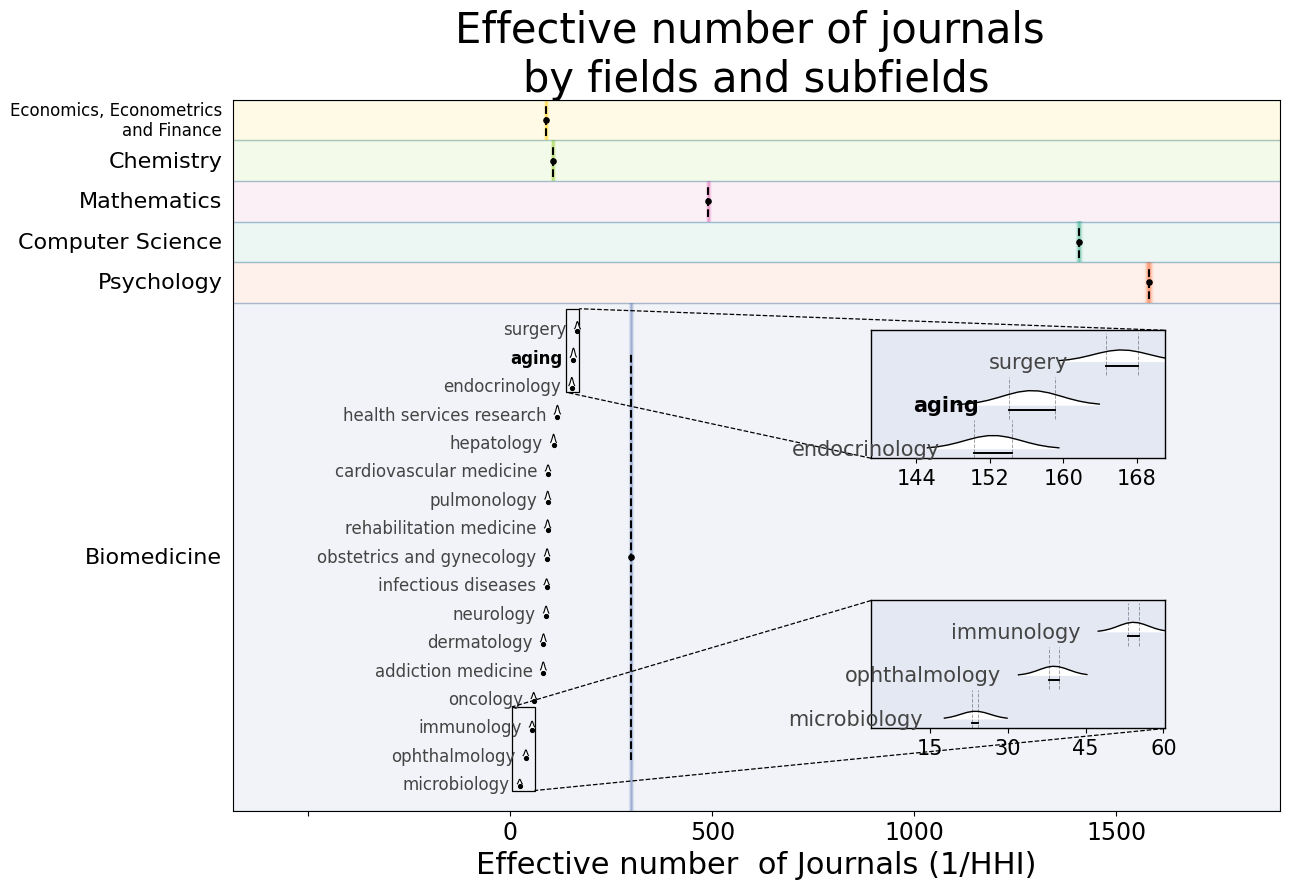

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, FuncFormatter


# =============================
# FONT SCALE (ORIGINAL — DO NOT TOUCH)
# =============================
FS_SCALE = 1.25

TITLE_FS = int(24 * FS_SCALE)
LABEL_FS = int(18 * FS_SCALE)
TICK_FS  = int(14 * FS_SCALE)

TOPIC_LABEL_FS_MAIN  = int(10 * FS_SCALE)
TOPIC_LABEL_FS_INSET = int(12 * FS_SCALE)


# =============================
# CONFIG
# =============================
RIBBON_GAMMA = 0.7
ALPHA_BG   = 0.12
ALPHA_DENS = 0.85
SMOOTH_SIGMA_BINS = 2.5
RIDGE_FLOOR = 0.02

CI_LW_MAIN   = 0.9
MED_MS_MAIN  = 2.2 * FS_SCALE
CI_LW_INSET  = 1.2
MED_MS_INSET = 3.6 * FS_SCALE

INSET_W = "28%"
INSET_H = "18%"
INSET_BORDERPAD = 0.8
INSET_RIDGE_SCALE = 1.0
INSET_DY = 0.2

MAIN_LABEL_PAD_FRAC = 0.012
LEFT_SPACE_FRAC = 0.18
INSET_LABEL_SHIFT = 0.18

SUBFIELD_GRAY = "#444444"

base_colors = [
    "#8DA0CB",  # Biomedicine
    "#FC8D62",
    "#66C2A5",
    "#E78AC3",
    "#A6D854",
    "#FFD92F",
]


# =============================
# HELPERS
# =============================
def hex_to_rgba(h, a):
    h = h.lstrip("#")
    return tuple(int(h[i:i+2], 16) / 255 for i in (0, 2, 4)) + (a,)


def make_cmap(base):
    return LinearSegmentedColormap.from_list(
        "", [hex_to_rgba(base, 0.0), hex_to_rgba(base, 1.0)]
    )


def gaussian_kernel1d(s):
    r = int(np.ceil(4 * s))
    t = np.arange(-r, r + 1, dtype=float)
    k = np.exp(-0.5 * (t / s) ** 2)
    return k / k.sum()


def bootstrap_density(samples, x):
    h, edges = np.histogram(samples, bins=len(x), range=(x[0], x[-1]), density=True)
    centers = 0.5 * (edges[:-1] + edges[1:])
    return np.interp(x, centers, h, left=0.0, right=0.0)


# =============================
# DATA — TOP5 SORTED BY MEDIAN (SMALL → LARGE)
# =============================
TOP5_FIELDS = [
    "Computer Science",
    "Chemistry",
    "Psychology",
    "Economics, Econometrics and Finance",
    "Mathematics",
]

field2boot = dict(zip(field_neff["field"].astype(str), field_neff["boot"]))
field_medians = {f: np.median(field2boot[f]) for f in TOP5_FIELDS}

FIELD_ORDER_TOP_TO_BOTTOM = sorted(TOP5_FIELDS, key=lambda f: field_medians[f])

bio = overall_neff.iloc[0]

topics = topic_neff[topic_neff["topic_cleaned"].str.lower() != "other"].copy()
topics = topics.iloc[np.argsort(topics["boot"].apply(np.median).values)]

topic_samples = topics["boot"].tolist()
topic_names   = topics["topic_cleaned"].astype(str).values


# =============================
# ROW LAYOUT (bottom → top)
# =============================
H_BIO, H_FIELD = 5.0, 0.4

fields_bottom_to_top = FIELD_ORDER_TOP_TO_BOTTOM[::-1]

row_labels  = ["Biomedicine"] + fields_bottom_to_top
row_samples = [bio["boot"]] + [field2boot[f] for f in fields_bottom_to_top]

row_heights = np.r_[H_BIO, np.repeat(H_FIELD, len(fields_bottom_to_top))]
y_edges   = np.r_[0, np.cumsum(row_heights)]
y_centers = 0.5 * (y_edges[:-1] + y_edges[1:])

row_colors = [base_colors[0]] + base_colors[1:1 + len(fields_bottom_to_top)]
row_cmaps  = [make_cmap(c) for c in row_colors]


# =============================
# X GRID
# =============================
all_samples = np.concatenate(row_samples + topic_samples)
xmin, xmax = all_samples.min(), all_samples.max()
pad = 0.2 * (xmax - xmin)

x = np.linspace(xmin - pad, xmax + pad, 2000)
xrange_main = x[-1] - x[0]

X_LEFT  = x[0] - LEFT_SPACE_FRAC * xrange_main
X0      = x[0]
X_RIGHT = x[-1]


# =============================
# FIELD / BIO DENSITIES
# =============================
D_rows = np.vstack([bootstrap_density(s, x) for s in row_samples])
D_rows /= D_rows.max(axis=1, keepdims=True)
D_rows **= RIBBON_GAMMA

k = gaussian_kernel1d(SMOOTH_SIGMA_BINS)
D_rows = np.vstack([np.convolve(d, k, mode="same") for d in D_rows])


# =============================
# TOPIC DENSITIES
# =============================
D_topics = np.vstack([bootstrap_density(s, x) for s in topic_samples])
D_topics /= D_topics.max(axis=1, keepdims=True)
D_topics **= RIBBON_GAMMA
D_topics = np.vstack([np.convolve(d, k, mode="same") for d in D_topics])
D_topics[D_topics < RIDGE_FLOOR] = 0.0


# =============================
# PLOT
# =============================
fig, ax = plt.subplots(figsize=(13, 9))

for i, (y0, y1) in enumerate(zip(y_edges[:-1], y_edges[1:])):
    ax.fill_between([X_LEFT, X_RIGHT], y0, y1,
                    color=row_colors[i], alpha=ALPHA_BG, zorder=0)

    ax.imshow(
        D_rows[i:i+1],
        aspect="auto",
        origin="lower",
        extent=[X0, X_RIGHT, y0, y1],
        cmap=row_cmaps[i],
        alpha=ALPHA_DENS,
        zorder=1,
    )

    mu = np.median(row_samples[i])
    ax.plot([mu, mu], [y0 + 0.1*(y1-y0), y1 - 0.1*(y1-y0)],
            "--", color="black", zorder=3)
    ax.plot(mu, 0.5*(y0+y1), "o", color="black", zorder=4,
            markersize=3 * FS_SCALE)

ax.hlines(y_edges, X_LEFT, X_RIGHT, lw=1, alpha=0.35, zorder=2)


# =============================
# BIOMED TOPIC RIDGELINES
# =============================
bio_center = 0.5 * (y_edges[0] + y_edges[1])

RIDGE_H = H_BIO * 0.035
SPACING = 1.6
offsets = (np.arange(len(D_topics)) - (len(D_topics)-1)/2) * RIDGE_H * SPACING

y_bases = []

for s, d, dy, name in zip(topic_samples, D_topics, offsets, topic_names):
    y_base = bio_center + dy
    y_bases.append(y_base)

    y_top = y_base + d * RIDGE_H
    mask = d > 0

    ax.fill_between(x, y_base, y_top, where=mask,
                    color="white", linewidth=0, zorder=4)
    ax.plot(x, np.where(mask, y_top, np.nan),
            color="black", lw=0.8, zorder=5)

    q025, q50, q975 = np.quantile(s, [0.025, 0.5, 0.975])
    y_mark = y_base - 0.12 * RIDGE_H

    ax.plot([q025, q975], [y_mark, y_mark],
            color="black", lw=CI_LW_MAIN, zorder=6)
    ax.plot(q50, y_mark, "o",
            color="black", markersize=MED_MS_MAIN, zorder=7)

    is_aging = name.strip().lower() == "aging"
    ax.text(
        q50 - MAIN_LABEL_PAD_FRAC * xrange_main, y_base, name,
        ha="right", va="center",
        fontsize=TOPIC_LABEL_FS_MAIN,
        color=("black" if is_aging else SUBFIELD_GRAY),
        fontweight=("bold" if is_aging else "normal"),
        zorder=8,
    )

y_bases = np.array(y_bases)


# =============================
# INSET FUNCTION
# =============================
def add_zoom_inset(ax, idx, bbox_to_anchor, loc1, loc2):
    s_sel = [topic_samples[i] for i in idx]
    d_sel = D_topics[idx]
    y_sel = y_bases[idx]
    n_sel = topic_names[idx]

    s_all = np.concatenate(s_sel)
    zx0, zx1 = np.quantile(s_all, [0.005, 0.995])
    zpad = 0.15 * (zx1 - zx0)
    zx0 -= zpad
    zx1 += zpad

    zx0_g = zx0 - 0.35 * (zx1 - zx0)

    zy0 = y_sel.min() - 0.35 * RIDGE_H
    zy1 = y_sel.max() + 1.15 * RIDGE_H

    axins = inset_axes(
        ax,
        width=INSET_W,
        height=INSET_H,
        loc="lower right",
        borderpad=INSET_BORDERPAD,
        bbox_to_anchor=bbox_to_anchor,
        bbox_transform=ax.transAxes,
    )

    axins.set_facecolor(hex_to_rgba(base_colors[0], ALPHA_BG))

    for s, d, y, name in zip(s_sel, d_sel, y_sel, n_sel):
        y_top = y + d * RIDGE_H
        mask = d > 0

        axins.fill_between(x, y, y_top, where=mask,
                           color="white", linewidth=0)
        axins.plot(x, np.where(mask, y_top, np.nan),
                   color="black", lw=1.0)

        q025, q50, q975 = np.quantile(s, [0.025, 0.5, 0.975])
        y_mark = y - 0.16 * RIDGE_H

        axins.plot([q025, q975], [y_mark, y_mark],
           color="black", lw=CI_LW_INSET)

        axins.plot([q025, q975], [y_mark, y_mark],
                color="black", lw=CI_LW_INSET)

        # Short dashed CI guides limited to local ridge region
        y_lo = y_mark - 0.35 * RIDGE_H
        y_hi = y + 1.05 * RIDGE_H

        axins.vlines([q025, q975], y_lo, y_hi,
                    colors="black", linestyles="dashed",
                    linewidth=0.7, alpha=0.35)


        is_aging = name.strip().lower() == "aging"
        axins.text(
            q50 - INSET_LABEL_SHIFT * (zx1 - zx0_g), y, name,
            ha="right", va="center",
            fontsize=TOPIC_LABEL_FS_INSET,
            color=("black" if is_aging else SUBFIELD_GRAY),
            fontweight=("bold" if is_aging else "normal"),
        )

    axins.set_xlim(zx0_g, zx1)
    axins.set_ylim(zy0, zy1)
    axins.set_yticks([])

    axins.xaxis.set_major_locator(MaxNLocator(4))
    axins.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:g}"))
    axins.tick_params(axis="x", labelsize=int(12 * FS_SCALE))

    for s in axins.spines.values():
        s.set_linewidth(1.0)

    _, p1, p2 = mark_inset(ax, axins, loc1=loc1, loc2=loc2,
                           fc="none", ec="black", lw=0.9)
    p1.set_linestyle("--")
    p2.set_linestyle("--")


# =============================
# INSETS
# =============================
add_zoom_inset(ax, np.arange(len(topic_samples)-3, len(topic_samples)),
               bbox_to_anchor=(-0.1, INSET_DY + 0.28, 1, 1),
               loc1=1, loc2=3)

add_zoom_inset(ax, np.arange(3),
               bbox_to_anchor=(-0.1, INSET_DY - 0.10, 1, 1),
               loc1=2, loc2=4)


# =============================
# AXES
# =============================
ax.set_yticks(y_centers)

# Manual y labels: wrap + smaller for the long one
ax.set_yticklabels([])
ax.tick_params(axis="y", length=0)

y_tick_fs_default = int(13 * FS_SCALE)
y_tick_fs_small = int(10 * FS_SCALE)

TARGET = "Economics, Econometrics and Finance"
TARGET_WRAPPED = "Economics, Econometrics\nand Finance"

for yc, lab in zip(y_centers, row_labels):
    if lab == TARGET:
        lab_disp = TARGET_WRAPPED
        fs = y_tick_fs_small
    else:
        lab_disp = lab
        fs = y_tick_fs_default

    ax.text(
        -0.01, yc, lab_disp,
        transform=ax.get_yaxis_transform(),  # x in axes coords, y in data coords
        ha="right", va="center",
        fontsize=fs,
        color="black",
        clip_on=False,
    )

ax.set_xlim(X_LEFT, X_RIGHT)
ax.set_ylim(y_edges[0], y_edges[-1])

ax.xaxis.set_major_locator(MaxNLocator(6))
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: "" if v < 0 else f"{v:.0f}"))
ax.tick_params(axis="x", labelsize=TICK_FS)

ax.set_xlabel("Effective number  of Journals (1/HHI)", fontsize=LABEL_FS)
ax.set_title("Effective number of journals \nby fields and subfields",
             fontsize=TITLE_FS)

ax.grid(False)
plt.tight_layout()
plt.savefig("eff_num_journals.pdf")
plt.show()


## Load Data

In [1]:
import pandas as pd
df = pd.read_parquet("[20251224]main_data.parquet")
df.head()

,citation_year,id,in_degree,out_degree,pagerank,betweenness,component_id,component_n_nodes,total_nodes,total_edges,...,journal_title,prim_topic,missing_abstract,is_aging,topic_cleaned,Rank,SJR,SJR Best Quartile,H index,sjr_year
0,2015,https://openalex.org/W1064794603,0.0,25.0,8.254617e-09,0.0,8292414.0,1245608.0,1266361.0,1919668.0,...,Journal of Applied Pharmaceutical Science,Nigella sativa pharmacological applications,False,1.0,immunology,14807.0,0.257,Q2,60.0,NaN
1,2015,https://openalex.org/W1049551937,0.0,25.0,8.254617e-09,0.0,8292414.0,1245608.0,1266361.0,1919668.0,...,Journal of Applied Pharmaceutical Science,Viral gastroenteritis research and epidemiology,False,1.0,infectious diseases,14807.0,0.257,Q2,60.0,NaN
2,2015,https://openalex.org/W1053124634,0.0,17.0,8.254617e-09,0.0,8292414.0,1245608.0,1266361.0,1919668.0,...,Clinical Psychopharmacology and Neuroscience,Electroconvulsive Therapy Studies,False,1.0,addiction medicine,5358.0,0.864,Q2,47.0,NaN
3,2015,https://openalex.org/W1021818739,0.0,9.0,8.254617e-09,0.0,8292414.0,1245608.0,1266361.0,1919668.0,...,Respiratory Medicine Case Reports,Burkholderia infections and melioidosis,False,1.0,infectious diseases,22560.0,0.135,Q4,26.0,NaN
4,2015,https://openalex.org/W1015602098,3.0,82.0,2.930394e-08,0.0,8292414.0,1245608.0,1266361.0,1919668.0,...,Research in Autism Spectrum Disorders,Autism Spectrum Disorder Research,True,NaN,neurology,4050.0,1.063,Q1,100.0,NaN


In [2]:
# drop rows with missing id (due to merging artifacts)
before = len(df)
df = df[df["id"].notna()].copy()

In [3]:
df.shape

(5514404, 27)

In [4]:
df['is_Q1'] = (df['SJR Best Quartile'] == 'Q1').astype(int)

In [5]:
df.columns

Index(['citation_year', 'id', 'in_degree', 'out_degree', 'pagerank',
       'betweenness', 'component_id', 'component_n_nodes', 'total_nodes',
       'total_edges', 'n_components', 'title', 'publication_year',
       'countries_distinct_count', 'institutions_distinct_count',
       'journal_issn', 'fwci', 'journal_title', 'prim_topic',
       'missing_abstract', 'is_aging', 'topic_cleaned', 'Rank', 'SJR',
       'SJR Best Quartile', 'H index', 'sjr_year', 'is_Q1'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt


# Filter data for 2024
df_2024 = df[df["citation_year"] == 2024]
df_2024.shape



(1266596, 28)

In [7]:
# save df_2024 to CSV
df_2024.to_csv("[20260102]df_2024.csv", index=False)

In [8]:
before = len(df_2024)
df_temp = df_2024[~((df_2024["out_degree"] == 0))].copy()
after = len(df_temp)
print(f"{(before - after) / before * 100}% of papers have out_degree = 0")


1.7872312876402576% of papers have out_degree = 0


In [9]:
# create binary indicator for missing references (out_degree == 0)
df["missing_ref"] = (df["out_degree"] == 0).astype(int)

# Filter data for 2024
df_2024 = df[df["citation_year"] == 2024]


## Figure 1A: Descriptive Statistics

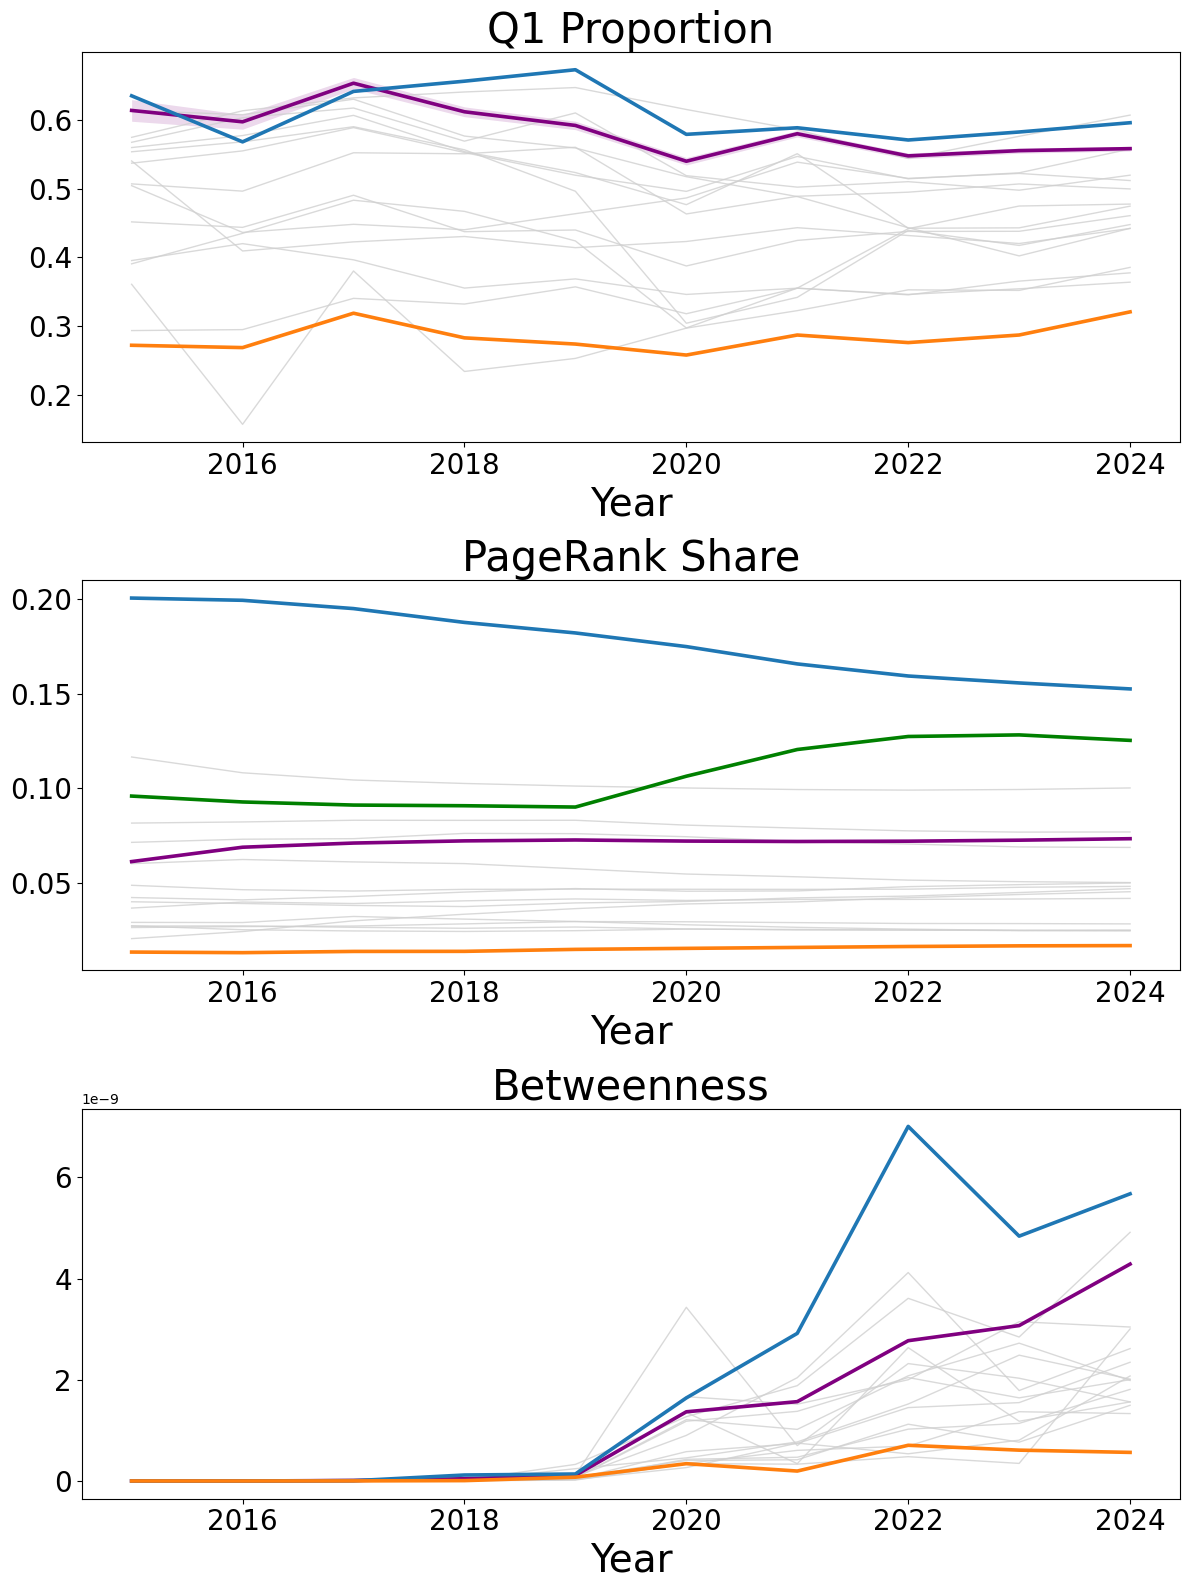


=== Top / Second / Bottom topics by overall mean (across years) ===
Q1 Proportion (is_Q1)
  TOP     : microbiology     value=0.6097841456461754
  SECOND  : infectious diseases  value=0.6042714481409114
  BOTTOM  : surgery     value=0.2843110683264737

PageRank Share (pagerank)
  TOP     : oncology     value=0.17725375294685364
  SECOND  : infectious diseases  value=0.10686437785625458
  BOTTOM  : ophthalmology     value=0.015108080580830574

Betweenness (betweenness)
  TOP     : infectious diseases     value=2.2348671188134356e-09
  SECOND  : oncology  value=1.489611017793746e-09
  BOTTOM  : surgery     value=2.5043412930429895e-10



In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# ---------- Copy data (DO NOT TOUCH ORIGINAL df) ----------
df_plot = df.copy()

# ---------- Config ----------
metrics = [
    ("is_Q1",        "Q1 Proportion"),
    ("pagerank",     "PageRank Share"),
    ("betweenness",  "Betweenness"),
]

# Colors and style
CLR_BG   = "#D0D0D0"
CLR_AGE  = "purple"
CLR_TOP  = "tab:blue"
CLR_BOT  = "tab:orange"
LW_BG    = 1.0
LW_HL    = 2.6
ALPHA_BG = 0.8

# ---------- Prep ----------
req_cols = {"citation_year", "topic_cleaned", "is_Q1", "pagerank", "betweenness"}
missing = [c for c in req_cols if c not in df_plot.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

years_sorted = sorted(df_plot["citation_year"].dropna().unique())

# Remove tiny negative numerical noise in PageRank (only for plotting copy)
df_plot["pagerank"] = df_plot["pagerank"].clip(lower=0)

# ---------- Figure ----------
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 16))
if len(metrics) == 1:
    axes = [axes]

summary_overall = {}

for ax, (metric, title_txt) in zip(axes, metrics):

    # ----- Build topic-year series -----
    if metric == "pagerank":
        pr_topic_year = (
            df_plot.groupby(["topic_cleaned", "citation_year"], as_index=False)["pagerank"]
                   .sum()
        )
        pr_total_year = (
            df_plot.groupby("citation_year")["pagerank"]
                   .sum()
                   .rename("total")
                   .reset_index()
        )
        g = pr_topic_year.merge(pr_total_year, on="citation_year")
        g["pagerank"] = g["pagerank"] / g["total"]
        g = g.drop(columns="total")

    else:
        g = (
            df_plot.groupby(["topic_cleaned", "citation_year"], as_index=False)[metric]
                   .mean()
        )

    # ----- Rank topics -----
    overall = g.groupby("topic_cleaned")[metric].mean().sort_values()
    summary_overall[metric] = overall

    topics_all = overall.index.tolist()
    topics_ex_aging = [t for t in topics_all if t != "aging"]

    top_topic = topics_ex_aging[-1] if len(topics_ex_aging) >= 1 else None
    second_topic = topics_ex_aging[-2] if len(topics_ex_aging) >= 2 else None
    bot_topic = topics_ex_aging[0] if len(topics_ex_aging) else None


    # ----- Background -----
    for topic in topics_all:
        tmp = g[g["topic_cleaned"] == topic].sort_values("citation_year")
        ax.plot(tmp["citation_year"], tmp[metric],
                color=CLR_BG, linewidth=LW_BG, alpha=ALPHA_BG)

    # ----- Aging -----
    if "aging" in topics_all:
        aging_mean = g[g["topic_cleaned"] == "aging"].sort_values("citation_year")
        ax.plot(aging_mean["citation_year"], aging_mean[metric],
                color=CLR_AGE, linewidth=LW_HL)

        if metric == "is_Q1":
            aging_stats = (
                df_plot[df_plot["topic_cleaned"] == "aging"]
                .groupby("citation_year")[metric]
                .agg(mean="mean", sd="std", n="count")
                .reindex(years_sorted)
                .dropna(subset=["mean"])
            )
            se = aging_stats["sd"] / np.sqrt(aging_stats["n"])
            ci = 1.96 * se
            ax.fill_between(
                aging_stats.index,
                aging_stats["mean"] - ci,
                aging_stats["mean"] + ci,
                color=CLR_AGE, alpha=0.15, linewidth=0
            )

    # ----- Top / Second / Bottom (special for PageRank) -----
    if metric == "pagerank":

        if top_topic is not None:
            tmp = g[g["topic_cleaned"] == top_topic].sort_values("citation_year")
            ax.plot(tmp["citation_year"], tmp[metric], color=CLR_TOP, linewidth=LW_HL)

        if second_topic is not None:
            tmp = g[g["topic_cleaned"] == second_topic].sort_values("citation_year")
            ax.plot(tmp["citation_year"], tmp[metric], color="green", linewidth=LW_HL)

        if bot_topic is not None:
            tmp = g[g["topic_cleaned"] == bot_topic].sort_values("citation_year")
            ax.plot(tmp["citation_year"], tmp[metric], color=CLR_BOT, linewidth=LW_HL)

    else:
        # Original behavior for other metrics
        if top_topic is not None:
            tmp = g[g["topic_cleaned"] == top_topic].sort_values("citation_year")
            ax.plot(tmp["citation_year"], tmp[metric], color=CLR_TOP, linewidth=LW_HL)

        if bot_topic is not None:
            tmp = g[g["topic_cleaned"] == bot_topic].sort_values("citation_year")
            ax.plot(tmp["citation_year"], tmp[metric], color=CLR_BOT, linewidth=LW_HL)


    # ----- Cosmetics -----
    ax.set_title(title_txt, fontsize=30)
    ax.set_xlabel("Year", fontsize=28)
    #ax.set_ylabel("Mean", fontsize=26)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)

plt.tight_layout()
plt.savefig("time_trend.pdf")
plt.show()


# ---------- Print top / second / bottom topics ----------
print("\n=== Top / Second / Bottom topics by overall mean (across years) ===")

for metric, title_txt in metrics:
    overall = summary_overall[metric].sort_values()

    bot = overall.index[0]
    top = overall.index[-1]
    second = overall.index[-2] if len(overall) >= 2 else None

    print(f"{title_txt} ({metric})")
    print(f"  TOP     : {top}     value={overall.loc[top]}")
    if second is not None:
        print(f"  SECOND  : {second}  value={overall.loc[second]}")
    print(f"  BOTTOM  : {bot}     value={overall.loc[bot]}")
    print()



Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


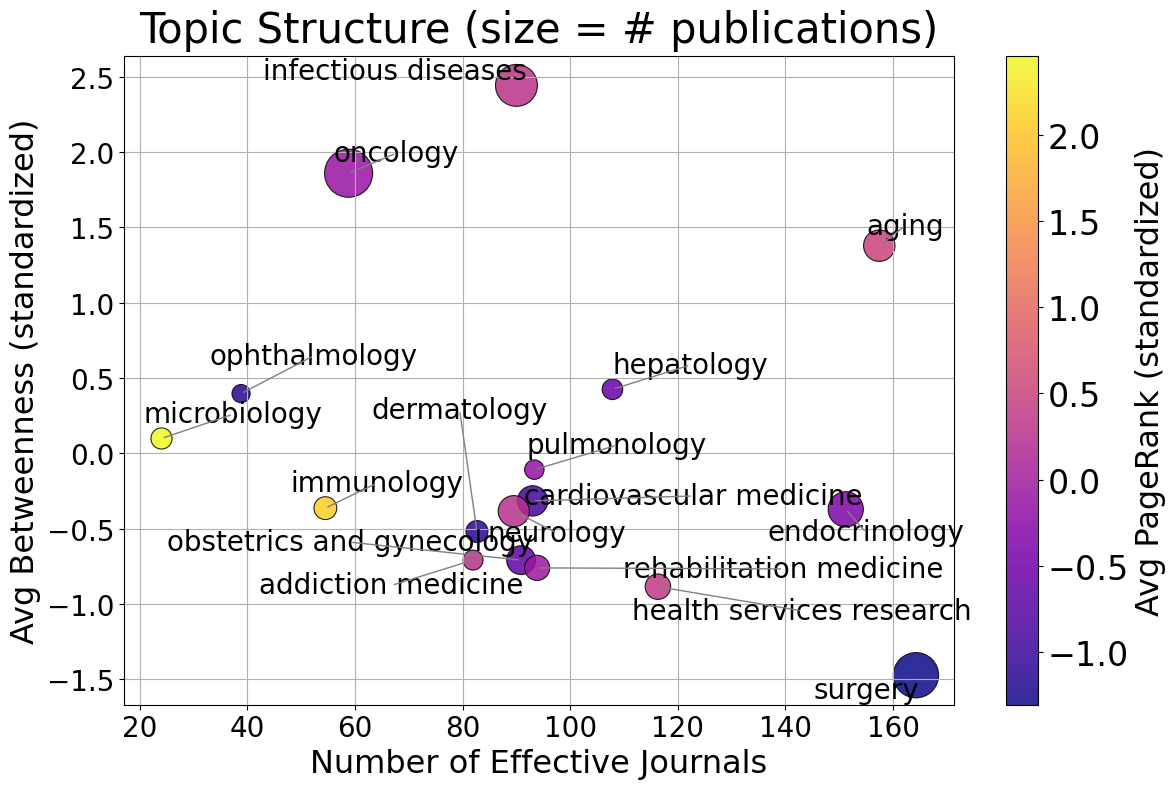

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
import numpy as np


# ---- HHI per topic (given) ----
hhi_map = {
    'addiction medicine': 0.012203335231057606, 'aging': 0.006351494430157707,
    'cardiovascular medicine': 0.010750106826066114, 'dermatology': 0.012095999781103142,
    'endocrinology': 0.006613172199588503, 'health services research': 0.008598184146710871,
    'hepatology': 0.009272071996417696, 'immunology': 0.018350795285226117,
    'infectious diseases': 0.011109801421852684, 'microbiology': 0.041592752227423875,
    'neurology': 0.011171311885243429, 'obstetrics and gynecology': 0.011004216750888904,
    'oncology': 0.017001675518771388, 'ophthalmology': 0.025756740048208982,
    'pulmonology': 0.010713844755617465, 'rehabilitation medicine': 0.010654636644631017,
    'surgery': 0.006087762390067659
}

# Keep topics present in HHI list
df_2024 = df_2024[df_2024['topic_cleaned'].isin(hhi_map.keys())].copy()

# ---- (2) Aggregate first (topic means), then standardize across topics ----
topic_means = df_2024.groupby('topic_cleaned').agg(
    betweenness_mean=('betweenness', 'mean'),
    pagerank_mean=('pagerank', 'mean'),
    size=('pagerank', 'size')        # publication count
).reset_index()

# Z-score across topics (within 2024) on the TOPIC MEANS
b_mu, b_sd = topic_means['betweenness_mean'].mean(), topic_means['betweenness_mean'].std(ddof=0)
p_mu, p_sd = topic_means['pagerank_mean'].mean(),    topic_means['pagerank_mean'].std(ddof=0)
if b_sd == 0: b_sd = 1.0
if p_sd == 0: p_sd = 1.0

topic_means['y']     = (topic_means['betweenness_mean'] - b_mu) / b_sd      # y-axis
topic_means['color'] = (topic_means['pagerank_mean']    - p_mu) / p_sd      # color

# ---- Add HHI (x)  ->  convert to inverse HHI ----
topic_means['x'] = topic_means['topic_cleaned'].map(hhi_map)
topic_means['x'] = 1.0 / topic_means['x']
agg = topic_means.dropna(subset=['x']).copy()

# ---- Node size scaling ----
size_scaled = (agg['size'] / agg['size'].max()) * 1200

# ---- Plot (single figure/axis) ----
fig, ax = plt.subplots(figsize=(12, 8))

sc = ax.scatter(
    x=agg['x'], y=agg['y'],
    s=size_scaled,
    c=agg['color'], cmap='plasma',
    alpha=0.85, edgecolor='k', linewidth=0.8
)

# Labels
texts = []
for _, r in agg.iterrows():
    texts.append(ax.text(r['x'], r['y'], r['topic_cleaned'],
                         fontsize=20, ha='right', va='bottom'))

adjust_text(
    texts, ax=ax,
    arrowprops=dict(arrowstyle='-', color='gray', lw=1.0),
    force_text=50, force_points=50,
    expand_text=(10, 10), expand_points=(10, 10)
)

# ---- RETAIN CURRENT FONTS ----
plt.xlabel("Number of Effective Journals", fontsize=23)
plt.ylabel("Avg Betweenness (standardized)", fontsize=23)
plt.title("Topic Structure (size = # publications)", fontsize=30, pad=10)
plt.tick_params(axis='both', labelsize=20)

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label("Avg PageRank (standardized)", fontsize=23)
cbar.ax.tick_params(labelsize=24)

ax.grid(True)
fig.tight_layout()
plt.show()


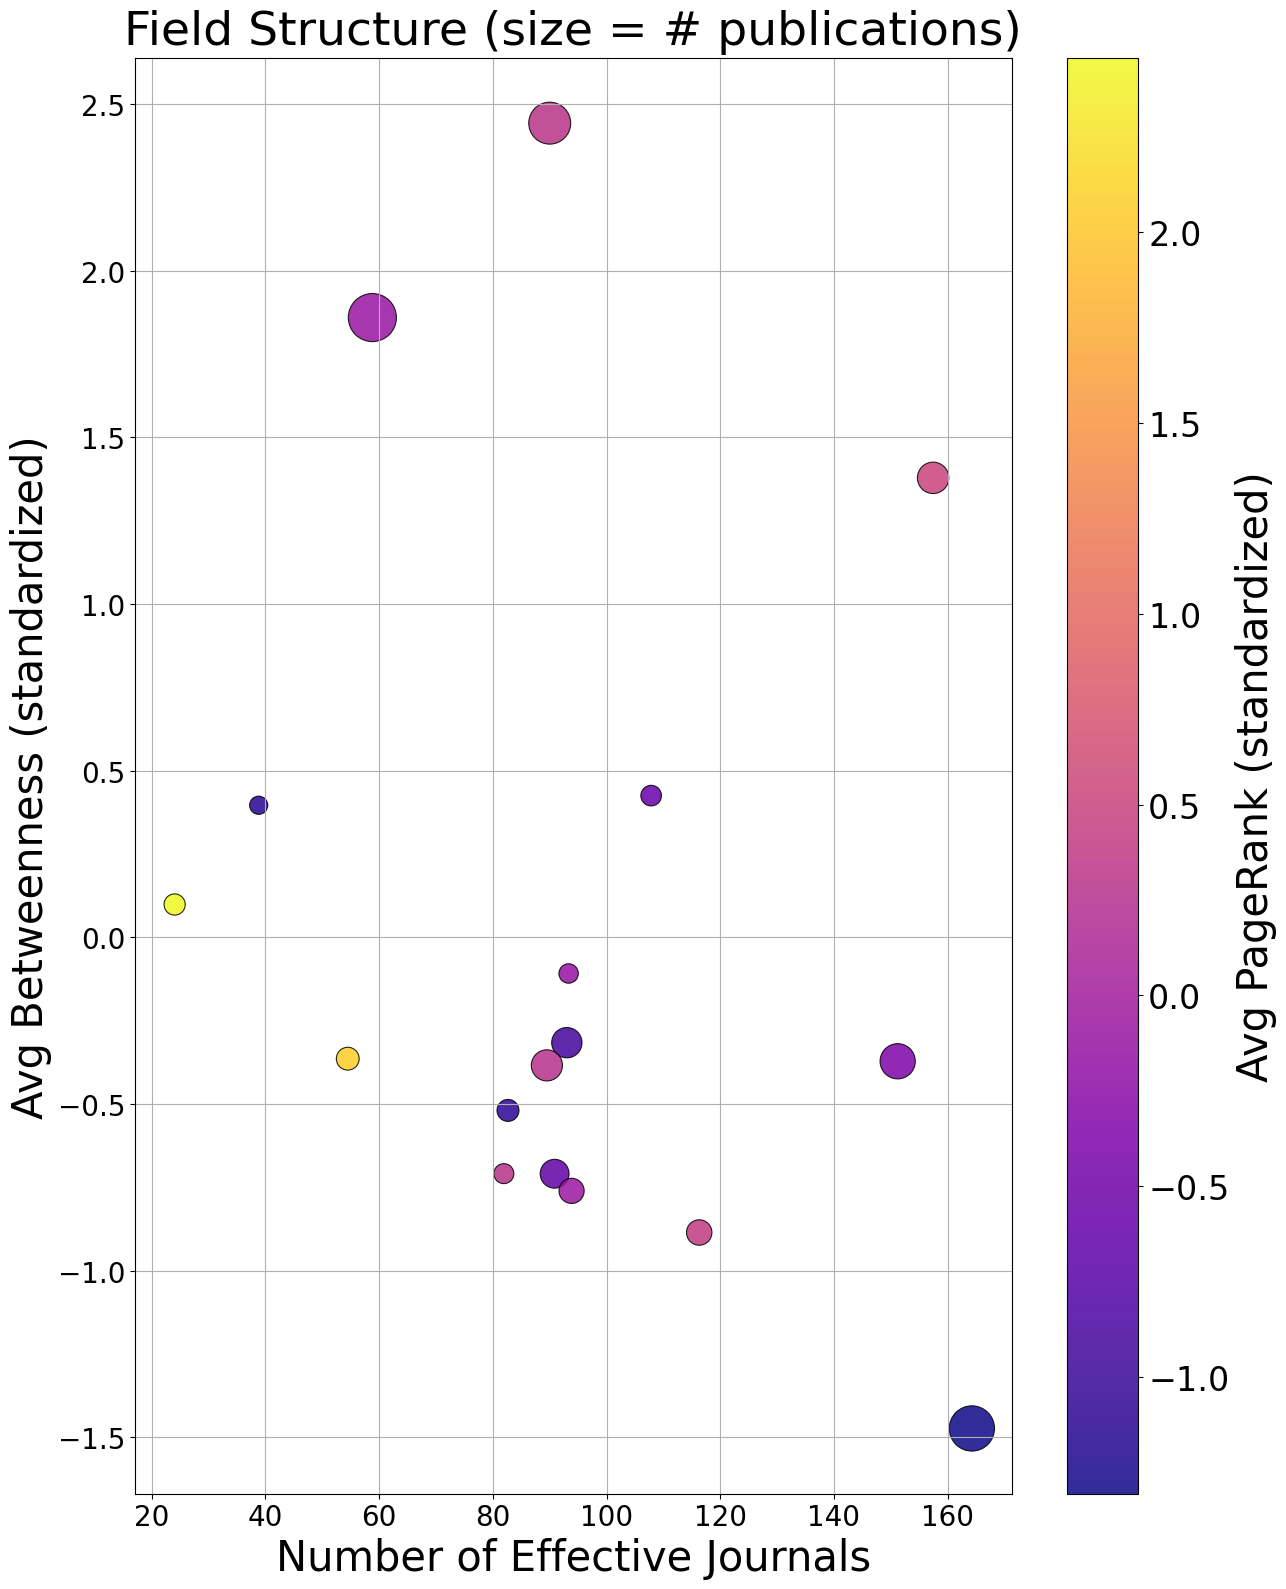

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
import numpy as np


# ---- HHI per topic (given) ----
hhi_map = {
    'addiction medicine': 0.012203335231057606, 'aging': 0.006351494430157707,
    'cardiovascular medicine': 0.010750106826066114, 'dermatology': 0.012095999781103142,
    'endocrinology': 0.006613172199588503, 'health services research': 0.008598184146710871,
    'hepatology': 0.009272071996417696, 'immunology': 0.018350795285226117,
    'infectious diseases': 0.011109801421852684, 'microbiology': 0.041592752227423875,
    'neurology': 0.011171311885243429, 'obstetrics and gynecology': 0.011004216750888904,
    'oncology': 0.017001675518771388, 'ophthalmology': 0.025756740048208982,
    'pulmonology': 0.010713844755617465, 'rehabilitation medicine': 0.010654636644631017,
    'surgery': 0.006087762390067659
}

# Keep topics present in HHI list
df_2024 = df_2024[df_2024['topic_cleaned'].isin(hhi_map.keys())].copy()

# ---- (2) Aggregate first (topic means), then standardize across topics ----
topic_means = df_2024.groupby('topic_cleaned').agg(
    betweenness_mean=('betweenness', 'mean'),
    pagerank_mean=('pagerank', 'mean'),
    size=('pagerank', 'size')        # publication count
).reset_index()

# Z-score across topics (within 2024) on the TOPIC MEANS
b_mu, b_sd = topic_means['betweenness_mean'].mean(), topic_means['betweenness_mean'].std(ddof=0)
p_mu, p_sd = topic_means['pagerank_mean'].mean(),    topic_means['pagerank_mean'].std(ddof=0)
if b_sd == 0: b_sd = 1.0
if p_sd == 0: p_sd = 1.0

topic_means['y']     = (topic_means['betweenness_mean'] - b_mu) / b_sd      # y-axis
topic_means['color'] = (topic_means['pagerank_mean']    - p_mu) / p_sd      # color

# ---- Add HHI (x)  ->  convert to inverse HHI ----
topic_means['x'] = topic_means['topic_cleaned'].map(hhi_map)
topic_means['x'] = 1.0 / topic_means['x']
agg = topic_means.dropna(subset=['x']).copy()

# ---- Node size scaling ----
size_scaled = (agg['size'] / agg['size'].max()) * 1200

# ---- Plot (single figure/axis) ----
fig, ax = plt.subplots(figsize=(13,16))

sc = ax.scatter(
    x=agg['x'], y=agg['y'],
    s=size_scaled,
    c=agg['color'], cmap='plasma',
    alpha=0.85, edgecolor='k', linewidth=0.8
)



# ---- RETAIN CURRENT FONTS ----
plt.xlabel("Number of Effective Journals", fontsize=30)
plt.ylabel("Avg Betweenness (standardized)", fontsize=30)
plt.title("Field Structure (size = # publications)", fontsize=34, pad=10)
plt.tick_params(axis='both', labelsize=20)

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label("Avg PageRank (standardized)", fontsize=30)
cbar.ax.tick_params(labelsize=24)

ax.grid(True)
fig.tight_layout()
plt.savefig("topic_structure.pdf")
plt.show()


## Fig 2A


Top 5 topics by PRE mean (Adjusted PageRank):
           topic_cleaned  pre_mean
            microbiology  0.058886
              immunology  0.035054
      addiction medicine  0.026744
 rehabilitation medicine  0.026586
health services research  0.025148

Bottom 5 topics by PRE mean (Adjusted PageRank):
            topic_cleaned  pre_mean
                  surgery -0.012996
            ophthalmology -0.013068
obstetrics and gynecology -0.013977
              dermatology -0.017845
      infectious diseases -0.039580


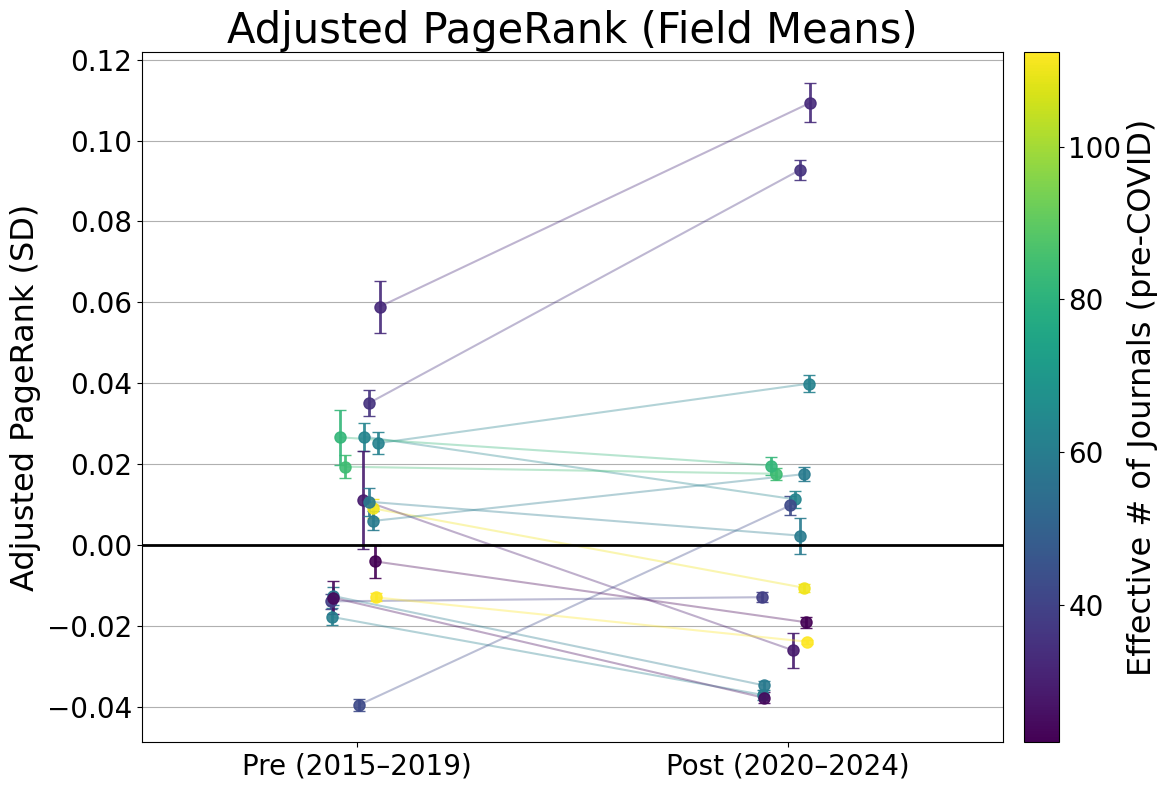

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


# ----------------------------
# 1) Topic-year within-topic journal HHI -> eff_journals = 1/HHI
# ----------------------------
def add_topic_year_eff_journals(df, weight="in_degree"):
    d = df.copy()
    d["journal_key"] = d["journal_issn"].fillna(d["journal_title"])

    if weight == "in_degree":
        d["_w"] = pd.to_numeric(d["in_degree"], errors="coerce").fillna(0).clip(lower=0)
    elif weight == "count":
        d["_w"] = 1.0
    else:
        raise ValueError("weight must be 'in_degree' or 'count'")

    g = (d.groupby(["topic_cleaned", "citation_year", "journal_key"], as_index=False)["_w"]
           .sum()
           .rename(columns={"_w": "w_j"}))
    tot = (g.groupby(["topic_cleaned", "citation_year"], as_index=False)["w_j"]
             .sum()
             .rename(columns={"w_j": "w_total"}))
    g = g.merge(tot, on=["topic_cleaned", "citation_year"], how="left")
    g["share"] = g["w_j"] / g["w_total"]

    hhi = (g.groupby(["topic_cleaned", "citation_year"], as_index=False)["share"]
             .apply(lambda s: float(np.sum(np.asarray(s) ** 2)))
             .rename(columns={"share": "HHI"}))
    hhi["eff_journals"] = 1.0 / hhi["HHI"]

    d = d.merge(
        hhi[["topic_cleaned", "citation_year", "eff_journals"]],
        on=["topic_cleaned", "citation_year"],
        how="left"
    )
    d.drop(columns=["_w"], inplace=True, errors="ignore")
    return d


# ----------------------------
# 2) Residualize within each year:
#    y_std = z(log1p(pagerank)) within year
#    resid = y_std - (controls fitted within year)
# ----------------------------
def residualize_within_year(df):
    d = df[[
        "citation_year", "topic_cleaned", "pagerank", "SJR",
        "in_degree", "missing_abstract", "eff_journals", "missing_ref"
    ]].dropna().copy()

    d["citation_year"] = pd.to_numeric(d["citation_year"], errors="coerce").astype(int)
    d["missing_abstract"] = pd.to_numeric(d["missing_abstract"], errors="coerce").fillna(0).astype(int)
    d["missing_ref"] = pd.to_numeric(d["missing_ref"], errors="coerce").fillna(0).astype(int)
    d["in_degree"] = pd.to_numeric(d["in_degree"], errors="coerce").fillna(0).clip(lower=0)
    d["pagerank"] = pd.to_numeric(d["pagerank"], errors="coerce")
    d["SJR"] = pd.to_numeric(d["SJR"], errors="coerce")

    d = d.dropna(subset=["pagerank", "SJR"]).copy()

    d["log_pagerank"] = np.log1p(d["pagerank"])
    d["log_in_degree"] = np.log1p(d["in_degree"])

    year_sd = d.groupby("citation_year")["log_pagerank"].transform(lambda s: s.std(ddof=0))
    d = d[year_sd > 0].copy()

    d["y_std"] = d.groupby("citation_year")["log_pagerank"].transform(lambda s: (s - s.mean()) / s.std(ddof=0))

    sjr_sd = d.groupby("citation_year")["SJR"].transform(lambda s: s.std(ddof=0))
    d = d[sjr_sd > 0].copy()
    d["SJR_std"] = d.groupby("citation_year")["SJR"].transform(lambda s: (s - s.mean()) / s.std(ddof=0))

    resids = []
    for y in sorted(d["citation_year"].unique()):
        dy = d[d["citation_year"] == y].copy()
        fit = smf.ols("y_std ~ SJR_std + missing_abstract + missing_ref", data=dy).fit()
        dy["y_adj"] = fit.resid
        resids.append(dy)

    return pd.concat(resids, ignore_index=True)


# ----------------------------
# 3) Plot: pre vs post means with error bars, colored by pre eff_journals
#    PLUS: print top5 + bottom5 topics by PRE mean (for manual labeling)
# ----------------------------
def plot_pre_post_bars_colored(
    d_adj,
    pre_years=range(2015, 2020),
    post_years=range(2020, 2025),
    min_papers_each=30,
    err="se",  # "se" or "sd"
    outfile="panelB_pre_post_two_columns_by_eff.pdf"
):
    d = d_adj[["topic_cleaned", "citation_year", "y_adj", "eff_journals"]].dropna().copy()
    d["citation_year"] = pd.to_numeric(d["citation_year"], errors="coerce").astype(int)

    d["period"] = None
    d.loc[d["citation_year"].isin(list(pre_years)), "period"] = "Pre (2015–2019)"
    d.loc[d["citation_year"].isin(list(post_years)), "period"] = "Post (2020–2024)"
    d = d.dropna(subset=["period"]).copy()

    eff_pre = (d[d["period"] == "Pre (2015–2019)"]
               .groupby("topic_cleaned", as_index=False)["eff_journals"]
               .mean()
               .rename(columns={"eff_journals": "eff_pre"}))

    g = (d.groupby(["topic_cleaned", "period"], as_index=False)
           .agg(mean=("y_adj", "mean"),
                sd=("y_adj", "std"),
                n=("y_adj", "size")))

    g = g.merge(eff_pre, on="topic_cleaned", how="left").dropna(subset=["eff_pre"])

    ok = (g.groupby("topic_cleaned")["n"].min() >= min_papers_each)
    keep_topics = ok[ok].index
    g = g[g["topic_cleaned"].isin(keep_topics)].copy()

    if err == "se":
        g["err"] = g["sd"] / np.sqrt(g["n"])
    elif err == "sd":
        g["err"] = g["sd"]
    else:
        raise ValueError("err must be 'se' or 'sd'")

    pre_label = "Pre (2015–2019)"
    post_label = "Post (2020–2024)"

    pre = g[g["period"] == pre_label].set_index("topic_cleaned")
    post = g[g["period"] == post_label].set_index("topic_cleaned")

    topics = sorted(set(pre.index).intersection(post.index))
    pre_mean = pre.loc[topics, "mean"].values
    pre_err  = pre.loc[topics, "err"].values
    post_mean = post.loc[topics, "mean"].values
    post_err  = post.loc[topics, "err"].values
    eff = pre.loc[topics, "eff_pre"].values

    # ---- print top 5 / bottom 5 by PRE mean ----
    rank_df = pd.DataFrame({"topic_cleaned": topics, "pre_mean": pre_mean})
    rank_df = rank_df.sort_values("pre_mean", ascending=False)

    top5 = rank_df.head(5).copy()
    bot5 = rank_df.tail(5).copy()

    print("\nTop 5 topics by PRE mean (Adjusted PageRank):")
    print(top5.to_string(index=False))

    print("\nBottom 5 topics by PRE mean (Adjusted PageRank):")
    print(bot5.to_string(index=False))

    # ---- plot (reverted, no labels) ----
    vmin = np.nanpercentile(eff, 5)
    vmax = np.nanpercentile(eff, 95)
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=vmin, vmax=vmax)

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    x_pre, x_post = 0, 1
    jitter = 0.06
    rng = np.random.default_rng(0)
    j = rng.uniform(-jitter, jitter, size=len(topics))

    for i in range(len(topics)):
        c = cmap(norm(eff[i]))
        ax.errorbar(x_pre + j[i], pre_mean[i], yerr=pre_err[i],
                    fmt="o", ms=8, lw=2, capsize=4, color=c, alpha=0.9)
        ax.errorbar(x_post + j[i], post_mean[i], yerr=post_err[i],
                    fmt="o", ms=8, lw=2, capsize=4, color=c, alpha=0.9)
        ax.plot([x_pre + j[i], x_post + j[i]],
                [pre_mean[i], post_mean[i]],
                lw=1.5, alpha=0.35, color=c)

    ax.axhline(0, color="black", lw=2)
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks([x_pre, x_post])
    ax.set_xticklabels([pre_label, post_label], fontsize=20)

    ax.set_title("Adjusted PageRank (Field Means)", fontsize=30)
    ax.set_ylabel("Adjusted PageRank (SD)", fontsize=23)
    ax.tick_params(axis="y", labelsize=20)
    ax.grid(True, axis="y")

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, pad=0.02)
    cbar.set_label("Effective # of Journals (pre-COVID)", fontsize=23)
    cbar.ax.tick_params(labelsize=20)

    plt.tight_layout()
    plt.savefig(outfile)
    plt.show()


# ----------------------------
# Run end-to-end (assumes df exists)
# ----------------------------
df2 = add_topic_year_eff_journals(df, weight="count")
d_adj = residualize_within_year(df2)

plot_pre_post_bars_colored(
    d_adj,
    pre_years=range(2015, 2020),
    post_years=range(2020, 2025),
    min_papers_each=30,
    err="se",
    outfile="panelB_pre_post_two_columns_by_eff.pdf"
)


## Figure 2B: Bayesian

In [53]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf


def add_topic_year_eff_journals(df, weight="count"):
    d = df.copy()
    d["journal_key"] = d["journal_issn"].fillna(d["journal_title"])

    if weight == "in_degree":
        d["_w"] = pd.to_numeric(d["in_degree"], errors="coerce").fillna(0).clip(lower=0)
    elif weight == "count":
        d["_w"] = 1.0
    else:
        raise ValueError("weight must be 'in_degree' or 'count'")

    g = (d.groupby(["topic_cleaned", "citation_year", "journal_key"], as_index=False)["_w"]
           .sum()
           .rename(columns={"_w": "w_j"}))

    tot = (g.groupby(["topic_cleaned", "citation_year"], as_index=False)["w_j"]
             .sum()
             .rename(columns={"w_j": "w_total"}))

    g = g.merge(tot, on=["topic_cleaned", "citation_year"], how="left")
    g["share"] = g["w_j"] / g["w_total"]

    hhi = (g.groupby(["topic_cleaned", "citation_year"])["share"]
             .apply(lambda s: float(np.sum(np.asarray(s) ** 2)))
             .reset_index(name="HHI"))

    hhi["eff_journals"] = 1.0 / hhi["HHI"]

    d = d.merge(hhi[["topic_cleaned", "citation_year", "eff_journals"]],
                on=["topic_cleaned", "citation_year"], how="left")
    return d.drop(columns=["_w"], errors="ignore")


def _missing_abs_to_int(s: pd.Series) -> pd.Series:
    """
    Robust conversion for missing_abstract that may be boolean[pyarrow], bool, 0/1, or strings.
    """
    # If it's boolean-like (including pandas BooleanDtype / Arrow boolean), fill with False.
    if pd.api.types.is_bool_dtype(s) or str(s.dtype).startswith("boolean"):
        return s.fillna(False).astype(int)
    # Otherwise coerce to numeric 0/1 and fill with 0.
    return pd.to_numeric(s, errors="coerce").fillna(0).astype(int)


def residualize_within_year(df):
    """
    Within-year residualization:
      y_std = z_t(log1p(pagerank))
      regress y_std on SJR_std + (log1p)in_degree + missing_abstract (within each year)
      return residual y_adj
    """
    d = df.copy()

    d["citation_year"] = pd.to_numeric(d["citation_year"], errors="coerce").astype(int)
    d["pagerank"] = pd.to_numeric(d["pagerank"], errors="coerce")
    d["SJR"] = pd.to_numeric(d["SJR"], errors="coerce")
    d["in_degree"] = pd.to_numeric(d["in_degree"], errors="coerce").fillna(0).clip(lower=0)

    d["missing_abstract"] = _missing_abs_to_int(d["missing_abstract"])
    d["missing_ref"] = _missing_abs_to_int(d["missing_ref"])

    d = d.dropna(subset=["topic_cleaned", "citation_year", "pagerank", "SJR", "eff_journals"]).copy()

    d["log_pagerank"] = np.log1p(d["pagerank"])
    year_sd = d.groupby("citation_year")["log_pagerank"].transform(lambda s: s.std(ddof=0))
    d = d[year_sd > 0].copy()

    d["y_std"] = d.groupby("citation_year")["log_pagerank"].transform(
        lambda s: (s - s.mean()) / s.std(ddof=0)
    )
    d["SJR_std"] = d.groupby("citation_year")["SJR"].transform(
        lambda s: (s - s.mean()) / s.std(ddof=0)
    )

    d["in_degree_ctl"] = np.log1p(d["in_degree"])

    out = []
    for y in sorted(d["citation_year"].unique()):
        dy = d[d["citation_year"] == y].copy()
        fit = smf.ols("y_std ~ SJR_std + missing_abstract + missing_ref", data=dy).fit()
        dy["y_adj"] = fit.resid
        out.append(dy)

    return pd.concat(out, ignore_index=True)


def build_binned_cells(
    df,
    weight="count",
    pre_years=range(2015, 2020),
    post_years=range(2020, 2025),
    q=3
):
    d0 = add_topic_year_eff_journals(df, weight=weight)

    keep_years = set(pre_years) | set(post_years)
    d0 = d0[pd.to_numeric(d0["citation_year"], errors="coerce").isin(list(keep_years))].copy()

    d = residualize_within_year(d0)

    eff_pre = (d[d["citation_year"].isin(list(pre_years))]
               .groupby("topic_cleaned", as_index=False)["eff_journals"]
               .mean()
               .rename(columns={"eff_journals": "eff_pre"}))
    d = d.merge(eff_pre, on="topic_cleaned", how="left").dropna(subset=["eff_pre", "y_adj"]).copy()

    cell = (d.groupby(["topic_cleaned", "citation_year"], as_index=False)
              .agg(y_mean=("y_adj", "mean"),
                   y_sd=("y_adj", "std"),
                   n=("y_adj", "size"),
                   eff_pre=("eff_pre", "first")))

    cell["se"] = cell["y_sd"] / np.sqrt(cell["n"])
    cell["se"] = cell["se"].fillna(0.0)
    cell["se"] = np.maximum(cell["se"].to_numpy(), 1e-8)

    cell["is_pre"] = cell["citation_year"].isin(list(pre_years))
    pre = cell[cell["is_pre"]].copy()

    pre_bar = (pre.groupby("topic_cleaned", as_index=False)["y_mean"]
               .mean()
               .rename(columns={"y_mean": "y_prebar"}))

    pre_se2 = (pre.groupby("topic_cleaned")["se"]
               .apply(lambda s: float(np.sum((s.to_numpy())**2) / (len(s)**2)))
               .rename("se_pre2")
               .reset_index())

    cell2 = (cell.merge(pre_bar, on="topic_cleaned", how="left")
                 .merge(pre_se2, on="topic_cleaned", how="left"))

    cell2["y_tilde"] = cell2["y_mean"] - cell2["y_prebar"]
    cell2["se_pre2"] = cell2["se_pre2"].fillna(0.0)
    cell2["se_tilde"] = np.sqrt(cell2["se"]**2 + cell2["se_pre2"])
    cell2["se_tilde"] = np.maximum(cell2["se_tilde"].to_numpy(), 1e-6)

    cell2["post"] = cell2["citation_year"].isin(list(post_years)).astype(int)

    topic_eff = (cell2.groupby("topic_cleaned", as_index=False)["eff_pre"].first()
                 .sort_values("eff_pre")
                 .reset_index(drop=True))
    topic_eff["eff_rank"] = topic_eff["eff_pre"].rank(method="average")
    labels = ["low", "mid", "high"] if q == 3 else [f"q{i+1}" for i in range(q)]
    topic_eff["eff_grp"] = pd.qcut(topic_eff["eff_rank"], q=q, labels=labels)

    cell2 = cell2.merge(topic_eff[["topic_cleaned", "eff_grp"]], on="topic_cleaned", how="left")
    cell2 = cell2.dropna(subset=["eff_grp"]).copy()

    topics = pd.Index(sorted(cell2["topic_cleaned"].unique()))
    years = pd.Index(sorted(cell2["citation_year"].unique()))
    cell2["topic_id"] = topics.get_indexer(cell2["topic_cleaned"]) + 1
    cell2["year_id"] = years.get_indexer(cell2["citation_year"]) + 1

    gmap = {lab: i + 1 for i, lab in enumerate(labels)}
    cell2["g"] = cell2["eff_grp"].map(gmap).astype(int)

    return d, cell2, topic_eff, topics, years, labels


# RUN
d, cell2, topic_eff, topics, years, labels = build_binned_cells(
    df,
    weight="count",
    pre_years=range(2015, 2020),
    post_years=range(2020, 2025),
    q=3
)

print(topic_eff[["eff_pre", "eff_grp"]].value_counts(dropna=False))
print(cell2[["topic_cleaned", "citation_year", "eff_grp", "y_tilde", "se_tilde", "post", "g"]].head())


eff_pre     eff_grp
13.553260   low        1
59.318720   mid        1
110.418782  high       1
84.295205   high       1
81.829086   high       1
63.029709   high       1
61.904873   high       1
60.389170   mid        1
59.124671   mid        1
24.145617   low        1
58.874831   mid        1
42.185057   mid        1
38.855327   low        1
35.416139   low        1
32.845471   low        1
28.984170   low        1
120.264455  high       1
Name: count, dtype: int64
        topic_cleaned  citation_year eff_grp   y_tilde  se_tilde  post  g
0  addiction medicine           2015    high -0.018205  0.005202     0  3
1  addiction medicine           2016    high -0.010199  0.006464     0  3
2  addiction medicine           2017    high  0.007326  0.006864     0  3
3  addiction medicine           2018    high  0.010806  0.007704     0  3
4  addiction medicine           2019    high  0.010271  0.007165     0  3


In [54]:
import pandas as pd

# topic-level table
topic_tbl = (cell2.groupby("topic_cleaned", as_index=False)
             .agg(eff_pre=("eff_pre","first"),
                  eff_grp=("eff_grp","first")))

print(topic_tbl.sort_values("eff_pre")[["topic_cleaned","eff_pre","eff_grp"]])

print("\n# topics per bin:")
print(topic_tbl["eff_grp"].value_counts())

print("\n# topic-years per bin (estimation rows):")
print(cell2["eff_grp"].value_counts())


                topic_cleaned     eff_pre eff_grp
12                   oncology   13.553260     low
13              ophthalmology   24.145617     low
6                  hepatology   28.984170     low
9                microbiology   32.845471     low
7                  immunology   35.416139     low
11  obstetrics and gynecology   38.855327     low
8         infectious diseases   42.185057     mid
2     cardiovascular medicine   58.874831     mid
10                  neurology   59.124671     mid
14                pulmonology   59.318720     mid
3                 dermatology   60.389170     mid
5    health services research   61.904873    high
0          addiction medicine   63.029709    high
15    rehabilitation medicine   81.829086    high
1                       aging   84.295205    high
4               endocrinology  110.418782    high
16                    surgery  120.264455    high

# topics per bin:
eff_grp
low     6
high    6
mid     5
Name: count, dtype: int64

# topic-years pe

In [55]:
from cmdstanpy import CmdStanModel

years_idx = pd.Index(sorted(cell2["citation_year"].unique()))
cell2["year_id"] = years_idx.get_indexer(cell2["citation_year"]) + 1

stan_data = {
  "N": int(cell2.shape[0]),
  "y_hat": cell2["y_tilde"].to_numpy(dtype=float),
  "se": cell2["se_tilde"].to_numpy(dtype=float),
  "T": int(len(years_idx)),
  "year": cell2["year_id"].to_numpy(dtype=int),
  "post": cell2["post"].to_numpy(dtype=int),
  "G": int(len(labels)),
  "g": cell2["g"].to_numpy(dtype=int),
}

m = CmdStanModel(stan_file="meta_model.stan")
fit = m.sample(
    data=stan_data,
    chains=4,
    iter_warmup=2000,
    iter_sampling=2000,
    adapt_delta=0.99,
    max_treedepth=15
)

draws = fit.draws_pd()

for j, name in enumerate(labels, start=1):
    s = draws[f"b_post[{j}]"]
    print(name, "mean", float(s.mean()),
          "CrI", s.quantile([0.025,0.975]).to_numpy(),
          "P<0", float((s<0).mean()))


dh = draws["diff_high_low"]
dm = draws["diff_mid_low"]
dl = draws["diff_high_mid"]
print("\ndiff_high_low mean", float(dh.mean()), "CrI", dh.quantile([0.025,0.975]).to_numpy(), "P<0", float((dh<0).mean()))
print("diff_mid_low  mean", float(dm.mean()), "CrI", dm.quantile([0.025,0.975]).to_numpy(), "P<0", float((dm<0).mean()))
print("diff_high_mid mean", float(dl.mean()), "CrI", dl.quantile([0.025,0.975]).to_numpy(), "P<0", float((dl<0).mean()))

16:29:15 - cmdstanpy - INFO - CmdStan start processing


chain 1:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

chain 2:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

chain 3:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

chain 4:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

16:29:33 - cmdstanpy - INFO - CmdStan done processing.
16:29:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model.stan', line 37, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model.stan', line 37, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model.stan', line 37, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model.stan', line 37, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model.stan', line 37, column 4 to column 33)
Consider re-running with show_console=True if the above output is unclear!
16:29:33 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 9 divergent transitions (0.4%)
	Chain 2 had 2 divergent transitions (0.1%)
	Ch


low mean 0.00592825276011375 CrI [-0.03594249  0.04855041] P<0 0.396625
mid mean -0.006649706263603875 CrI [-0.04800622  0.03576722] P<0 0.616875
high mean -0.007606050313756249 CrI [-0.04916577  0.03488156] P<0 0.633875

diff_high_low mean -0.013534302946250002 CrI [-0.0159558  -0.01111776] P<0 1.0
diff_mid_low  mean -0.01257795961875 CrI [-0.01523911 -0.00991972] P<0 1.0


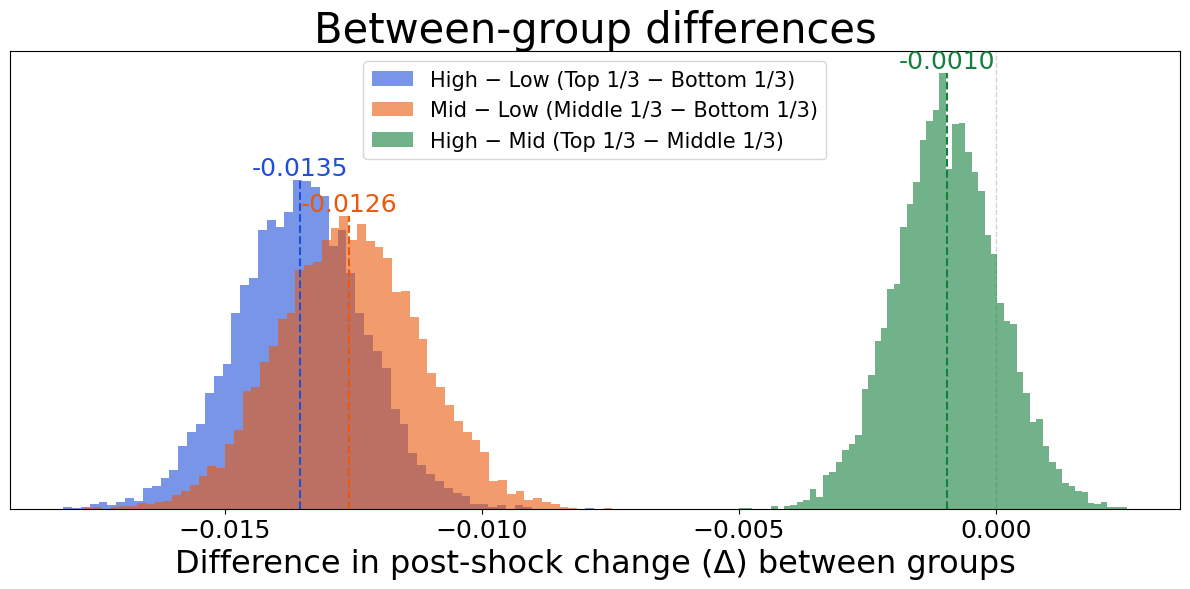

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Assumes you already have: fit (CmdStan fit) and labels (e.g., ["low","mid","high"])
draws = fit.draws_pd()

def draw_mean_line(ax, x, samples, color):
    hist, _ = np.histogram(samples, bins=60, density=True)
    y_max = hist.max()
    ax.plot([x, x], [0, y_max], linestyle="--", linewidth=1.5, color=color)

def peak_height(samples):
    hist, _ = np.histogram(samples, bins=60, density=True)
    return hist.max()

# New color palette (high-contrast, paper-friendly)
colors = ["#1f4ed8", "#ea580c", "#15803d"]  # blue, orange, green

# ---- Differences (posterior samples) ----
# If you used generated quantities diff_high_low / diff_mid_low, prefer them:
if "diff_high_low" in draws.columns:
    d_hl = draws["diff_high_low"].to_numpy()
else:
    d_hl = (draws["b_post[3]"] - draws["b_post[1]"]).to_numpy()

if "diff_mid_low" in draws.columns:
    d_ml = draws["diff_mid_low"].to_numpy()
else:
    d_ml = (draws["b_post[2]"] - draws["b_post[1]"]).to_numpy()

# Optional third contrast for completeness
d_hm = (draws["b_post[3]"] - draws["b_post[2]"]).to_numpy()

# Means
m_hl = d_hl.mean()
m_ml = d_ml.mean()
m_hm = d_hm.mean()

fig, ax = plt.subplots(figsize=(12, 6))

# Histograms
ax.hist(d_hl, bins=60, density=True, alpha=0.6, color=colors[0],
        label="High − Low (Top 1/3 − Bottom 1/3)")
ax.hist(d_ml, bins=60, density=True, alpha=0.6, color=colors[1],
        label="Mid − Low (Middle 1/3 − Bottom 1/3)")
ax.hist(d_hm, bins=60, density=True, alpha=0.6, color=colors[2],
        label="High − Mid (Top 1/3 − Middle 1/3)")

# Zero reference
ax.axvline(0, linestyle="--", color="lightgray", linewidth=1, zorder=0)

# Mean lines
draw_mean_line(ax, m_hl, d_hl, color=colors[0])
draw_mean_line(ax, m_ml, d_ml, color=colors[1])
draw_mean_line(ax, m_hm, d_hm, color=colors[2])

# Mean value annotations at histogram peaks
h_hl = peak_height(d_hl)
h_ml = peak_height(d_ml)
h_hm = peak_height(d_hm)

ax.text(m_hl, h_hl, f"{m_hl:.4f}", color=colors[0], fontsize=18, ha="center", va="bottom")
ax.text(m_ml, h_ml, f"{m_ml:.4f}", color=colors[1], fontsize=18, ha="center", va="bottom")
ax.text(m_hm, h_hm, f"{m_hm:.4f}", color=colors[2], fontsize=18, ha="center", va="bottom")

# Labels
ax.set_xlabel("Difference in post-shock change (Δ) between groups", fontsize=23)
ax.set_title("Between-group differences", fontsize=30)

ax.tick_params(axis="x", labelsize=18)
ax.set_yticks([])


ax.legend(fontsize=15, loc="upper center")

plt.tight_layout()
plt.savefig("posterior_differences.pdf")
plt.show()


In [57]:
import numpy as np

draws = fit.draws_pd()

def cv(samples):
    m = float(np.mean(samples))
    s = float(np.std(samples, ddof=0))
    return m, s, (np.inf if abs(m) < 1e-12 else s / abs(m))

# --- group post effects ---
for j in [1, 2, 3]:
    x = draws[f"b_post[{j}]"].to_numpy()
    m, s, c = cv(x)
    print(f"b_post[{j}] mean={m:.6g} sd={s:.6g} CV={c:.3g}")

# --- between-group differences (prefer generated quantities if present) ---
if "diff_high_low" in draws.columns:
    d_hl = draws["diff_high_low"].to_numpy()
else:
    d_hl = (draws["b_post[3]"] - draws["b_post[1]"]).to_numpy()

if "diff_mid_low" in draws.columns:
    d_ml = draws["diff_mid_low"].to_numpy()
else:
    d_ml = (draws["b_post[2]"] - draws["b_post[1]"]).to_numpy()

d_hm = (draws["b_post[3]"] - draws["b_post[2]"]).to_numpy()

for name, x in [("diff_high_low", d_hl), ("diff_mid_low", d_ml), ("diff_high_mid", d_hm)]:
    m, s, c = cv(x)
    print(f"{name} mean={m:.6g} sd={s:.6g} CV={c:.3g}")


b_post[1] mean=0.00592825 sd=0.021812 CV=3.68
b_post[2] mean=-0.00664971 sd=0.0217927 CV=3.28
b_post[3] mean=-0.00760605 sd=0.0218011 CV=2.87
diff_high_low mean=-0.0135343 sd=0.00123876 CV=0.0915
diff_mid_low mean=-0.012578 sd=0.00136955 CV=0.109
diff_high_mid mean=-0.000956344 sd=0.00100338 CV=1.05


### Effect size

In [58]:
import numpy as np
import pandas as pd

pre_years = range(2015, 2020)

# cell2 already has: topic_cleaned (field), citation_year, y_mean, y_tilde, eff_pre, eff_grp, ...
# Build a field-level pre_score using PRE y_mean (not y_tilde)
pre_mask = cell2["citation_year"].isin(list(pre_years))

field_tbl = (cell2.loc[pre_mask]
             .groupby("topic_cleaned", as_index=False)
             .agg(
                 pre_score=("y_mean", "mean"),      # baseline level for ranking
                 eff_pre=("eff_pre", "first"),
                 eff_grp=("eff_grp", "first")
             )
             .rename(columns={"topic_cleaned": "field"}))

# Sanity checks
print("#fields:", field_tbl.shape[0])
print(field_tbl["eff_grp"].value_counts())

# Optional: show ranking (1 = best)
field_tbl = field_tbl.sort_values("pre_score", ascending=False).reset_index(drop=True)
field_tbl["pre_rank"] = np.arange(1, field_tbl.shape[0] + 1)

print(field_tbl[["field", "pre_score", "pre_rank", "eff_grp", "eff_pre"]])


#fields: 17
eff_grp
low     6
high    6
mid     5
Name: count, dtype: int64
                        field  pre_score  pre_rank eff_grp     eff_pre
0                microbiology   0.043511         1     low   32.845471
1                  immunology   0.023239         2     low   35.416139
2          addiction medicine   0.020898         3    high   63.029709
3     rehabilitation medicine   0.020826         4    high   81.829086
4    health services research   0.018097         5    high   61.904873
5                       aging   0.014097         6    high   84.295205
6                 pulmonology   0.012143         7     mid   59.318720
7               endocrinology   0.008678         8    high  110.418782
8                  hepatology   0.008265         9     low   28.984170
9                   neurology   0.002248        10     mid   59.124671
10                   oncology   0.000092        11     low   13.553260
11              ophthalmology  -0.006339        12     low   24.145617
1

In [59]:
import numpy as np
import pandas as pd


gmap = {"low": 1, "mid": 2, "high": 3}
g = field_tbl["eff_grp"].map(gmap).to_numpy(dtype=int)
pre = field_tbl["pre_score"].to_numpy(dtype=float)

# Pre ranks: 1 = best (highest score)
pre_rank = (-pre).argsort().argsort() + 1

# Posterior draws of group post effects
B = np.column_stack([
    draws["b_post[1]"].to_numpy(),
    draws["b_post[2]"].to_numpy(),
    draws["b_post[3]"].to_numpy(),
])  # shape: (S, 3)

S = B.shape[0]
rank_change = np.empty((S, pre.shape[0]), dtype=int)

for s in range(S):
    post = pre + B[s, g - 1]
    post_rank = (-post).argsort().argsort() + 1
    rank_change[s, :] = post_rank - pre_rank

# Summaries per field
out = pd.DataFrame({
    "field": field_tbl["field"].to_numpy(),
    "eff_grp": field_tbl["eff_grp"].to_numpy(),
    "pre_rank": pre_rank,
    "E_rank_change": rank_change.mean(axis=0),
    "p_down_>=1": (rank_change >= 1).mean(axis=0),
    "p_up_>=1": (rank_change <= -1).mean(axis=0),
    "rank_change_q025": np.quantile(rank_change, 0.025, axis=0),
    "rank_change_q50": np.quantile(rank_change, 0.50, axis=0),
    "rank_change_q975": np.quantile(rank_change, 0.975, axis=0),
}).sort_values(["eff_grp", "pre_rank"])

print(out)


                        field eff_grp  pre_rank  E_rank_change  p_down_>=1  \
2          addiction medicine    high         3       0.769875    0.769875   
3     rehabilitation medicine    high         4       0.785875    0.785875   
4    health services research    high         5       0.998125    0.997875   
5                       aging    high         6       1.510125    1.000000   
7               endocrinology    high         8       2.114875    1.000000   
13                    surgery    high        14       1.091000    0.909250   
0                microbiology     low         1       0.000000    0.000000   
1                  immunology     low         2       0.000000    0.000000   
8                  hepatology     low         9      -5.553625    0.000000   
10                   oncology     low        11      -2.997625    0.000000   
11              ophthalmology     low        12      -1.114000    0.000000   
14  obstetrics and gynecology     low        15      -2.070750  

In [60]:
import numpy as np
import pandas as pd

groups = np.array(["low", "mid", "high"])
mask = {grp: (field_tbl["eff_grp"].to_numpy() == grp) for grp in groups}

grp_mean_change = np.column_stack([
    rank_change[:, mask[grp]].mean(axis=1) for grp in groups
])  # (S, 3)

summary = pd.DataFrame({
    "eff_grp": groups,
    "E_mean_rank_change": grp_mean_change.mean(axis=0),
    "p_mean_down": (grp_mean_change > 0).mean(axis=0),
    "p_mean_up": (grp_mean_change < 0).mean(axis=0),
    "q025": np.quantile(grp_mean_change, 0.025, axis=0),
    "q50": np.quantile(grp_mean_change, 0.50, axis=0),
    "q975": np.quantile(grp_mean_change, 0.975, axis=0),
})

print(summary)


  eff_grp  E_mean_rank_change  p_mean_down  p_mean_up      q025       q50  \
0     low           -1.956000          0.0        1.0 -2.500000 -2.000000   
1     mid            0.893225          1.0        0.0  0.400000  1.000000   
2    high            1.211646          1.0        0.0  0.666667  1.166667   

       q975  
0 -1.500000  
1  1.200000  
2  1.833333  


### pre-trend

In [61]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

pre_years = range(2015, 2020)
pre = cell2[cell2["citation_year"].isin(list(pre_years))].copy()

pre["eff_grp"] = pd.Categorical(pre["eff_grp"], categories=["low", "mid", "high"], ordered=True)
pre["w"] = 1.0 / (pre["se_tilde"] ** 2)

fit2 = smf.wls(
    "y_tilde ~ C(citation_year) + C(eff_grp) + C(citation_year):C(eff_grp)",
    data=pre,
    weights=pre["w"]
).fit()

terms = fit2.wald_test_terms()
print(terms)

# Find the interaction row automatically
row = [i for i in terms.table.index if "C(citation_year):C(eff_grp)" in str(i)][0]

p_int = float(terms.table.loc[row].iloc[-1])
print("Interaction block p-value:", p_int)




                                                 F                    P>F  df constraint  df denom
Intercept                    [[23.89595777491076]]  6.231583986496013e-06              1      70.0
C(citation_year)             [[4.479425612977162]]   0.002792622318762657              4      70.0
C(eff_grp)                   [[8.309039805439241]]  0.0005782719416731841              2      70.0
C(citation_year):C(eff_grp)  [[3.815853939643777]]  0.0009055315040579967              8      70.0
Interaction block p-value: 70.0


/Users/lauzhenyi/Library/Python/3.11/lib/python/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [62]:
pre_years = range(2015, 2020)
pre = cell2[cell2["citation_year"].isin(list(pre_years))].copy()

sub = pre[pre["eff_grp"].isin(["low", "high"])].copy()
sub["eff_grp"] = pd.Categorical(sub["eff_grp"], categories=["low", "high"], ordered=True)
sub["w"] = 1.0 / (sub["se_tilde"] ** 2)

fit_hl = smf.wls(
    "y_tilde ~ C(citation_year) + C(eff_grp) + C(citation_year):C(eff_grp)",
    data=sub, weights=sub["w"]
).fit()

terms_hl = fit_hl.wald_test_terms()
print(terms_hl)


                                                  F                    P>F  df constraint  df denom
Intercept                      [[34.0046412405743]]  3.997538427850513e-07              1      50.0
C(citation_year)              [[6.374352615112814]]  0.0003170043179377096              4      50.0
C(eff_grp)                    [[4.531287614225317]]    0.03823049759107764              1      50.0
C(citation_year):C(eff_grp)  [[0.7252385417944587]]     0.5788718272678748              4      50.0


/Users/lauzhenyi/Library/Python/3.11/lib/python/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [63]:
pre_years = range(2015, 2020)
pre = cell2[cell2["citation_year"].isin(list(pre_years))].copy()

sub = pre[pre["eff_grp"].isin(["low", "mid"])].copy()
sub["eff_grp"] = pd.Categorical(sub["eff_grp"], categories=["low", "mid"], ordered=True)
sub["w"] = 1.0 / (sub["se_tilde"] ** 2)

fit_hl = smf.wls(
    "y_tilde ~ C(citation_year) + C(eff_grp) + C(citation_year):C(eff_grp)",
    data=sub, weights=sub["w"]
).fit()

terms_hl = fit_hl.wald_test_terms()
print(terms_hl)


                                                  F                    P>F  df constraint  df denom
Intercept                    [[18.761209222491953]]  8.191804433746498e-05              1      45.0
C(citation_year)             [[3.5168894217703173]]   0.013973042515023872              4      45.0
C(eff_grp)                   [[12.299744904492728]]   0.001039525896540848              1      45.0
C(citation_year):C(eff_grp)   [[4.496487865957748]]  0.0038458658198152287              4      45.0


/Users/lauzhenyi/Library/Python/3.11/lib/python/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [64]:
pre_years = range(2015, 2020)
pre = cell2[cell2["citation_year"].isin(list(pre_years))].copy()

sub = pre[pre["eff_grp"].isin(["mid", "high"])].copy()
sub["eff_grp"] = pd.Categorical(sub["eff_grp"], categories=["mid", "high"], ordered=True)
sub["w"] = 1.0 / (sub["se_tilde"] ** 2)

fit_hl = smf.wls(
    "y_tilde ~ C(citation_year) + C(eff_grp) + C(citation_year):C(eff_grp)",
    data=sub, weights=sub["w"]
).fit()

terms_hl = fit_hl.wald_test_terms()
print(terms_hl)


                                                     F                    P>F  df constraint  df denom
Intercept                    [[0.0011507819940240283]]     0.9730884382518008              1      45.0
C(citation_year)                 [[3.098575702996097]]    0.02457809545238396              4      45.0
C(eff_grp)                        [[5.66161153984572]]    0.02164083362184927              1      45.0
C(citation_year):C(eff_grp)      [[4.587348621642148]]  0.0034208400869144497              4      45.0


/Users/lauzhenyi/Library/Python/3.11/lib/python/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


## Figure 4: Inequality

In [70]:
import numpy as np
import pandas as pd

panel_src = df  # df is full panel; do NOT overwrite

cols = ["citation_year", "pagerank", "SJR", "missing_abstract", "missing_ref"]
panel_work = panel_src[cols].copy()

panel_work["citation_year"] = pd.to_numeric(panel_work["citation_year"], errors="coerce")
panel_work["pagerank"] = pd.to_numeric(panel_work["pagerank"], errors="coerce")
panel_work["SJR"] = pd.to_numeric(panel_work["SJR"], errors="coerce")
panel_work["missing_abstract"] = pd.to_numeric(panel_work["missing_abstract"], errors="coerce")

panel_work = panel_work.loc[panel_work.notna().all(axis=1)].copy()
panel_work["citation_year"] = panel_work["citation_year"].astype(int)

# y and within-year z-score
panel_work["y"] = np.log1p(panel_work["pagerank"].to_numpy(dtype=float))
y_mean = panel_work.groupby("citation_year")["y"].transform("mean")
y_std  = panel_work.groupby("citation_year")["y"].transform(lambda s: s.std(ddof=0))
panel_work["y_z"] = (panel_work["y"] - y_mean) / y_std

# SJR within-year z-score
sjr_mean = panel_work.groupby("citation_year")["SJR"].transform("mean")
sjr_std  = panel_work.groupby("citation_year")["SJR"].transform(lambda s: s.std(ddof=0))
panel_work["sjr_z"] = (panel_work["SJR"] - sjr_mean) / sjr_std

# drop years where std=0 caused nan/inf
panel_work = panel_work.replace([np.inf, -np.inf], np.nan)
panel_work = panel_work.loc[panel_work[["y_z", "sjr_z"]].notna().all(axis=1)].copy()

# ---------------------------
# Per-year OLS via lstsq
# y_z ~ 1 + sjr_z + missing_abstract
# ---------------------------
resid = pd.Series(index=panel_work.index, dtype=float)

for yr, g in panel_work.groupby("citation_year", sort=False):
    y = g["y_z"].to_numpy(dtype=float)
    X = np.column_stack([
        np.ones(len(g), dtype=float),
        g["sjr_z"].to_numpy(dtype=float),
        g["missing_abstract"].to_numpy(dtype=float),
        g["missing_ref"].to_numpy(dtype=float),
    ])

    beta, *_ = np.linalg.lstsq(X, y, rcond=None)
    resid.loc[g.index] = y - X @ beta

panel_work["r"] = resid

# zscore residual within year
r_mean = panel_work.groupby("citation_year")["r"].transform("mean")
r_std  = panel_work.groupby("citation_year")["r"].transform(lambda s: s.std(ddof=0))
panel_work["residual_netpos"] = (panel_work["r"] - r_mean) / r_std

residual_netpos_series = panel_work["residual_netpos"]
print("done. residual_netpos computed for rows:", residual_netpos_series.notna().sum())
print(residual_netpos_series.describe())


done. residual_netpos computed for rows: 5514404
count    5.514404e+06
mean    -2.638892e-18
std      1.000000e+00
min     -3.888801e+00
25%     -1.930735e-01
50%     -1.112436e-01
75%      1.732557e-02
max      3.664365e+02
Name: residual_netpos, dtype: float64


In [71]:
df_panel = df.copy()
df_panel["residual_netpos"] = residual_netpos_series.reindex(df_panel.index)


In [72]:
import numpy as np
import pandas as pd

# ---------------------------
# Use df_panel only
# ---------------------------
src = df_panel

need = ["citation_year", "topic_cleaned", "prim_topic", "journal_title", "residual_netpos"]
src2 = src.loc[src[need].notna().all(axis=1), need].copy()

src2["citation_year"] = src2["citation_year"].astype(int)
src2["subfield_id"] = src2["topic_cleaned"].astype(str) + "||" + src2["prim_topic"].astype(str)
keys = ["subfield_id", "citation_year"]

# ---------------------------
# Inequality within cell (MAD / IQR / SD / q90(|r-median|))
# ---------------------------
med = src2.groupby(keys, sort=False)["residual_netpos"].median().rename("med")
src2 = src2.join(med, on=keys)
src2["abs_dev"] = (src2["residual_netpos"] - src2["med"]).abs()

cell_ineq = (
    src2.groupby(keys, sort=False)
        .agg(
            n=("abs_dev", "size"),
            mad=("abs_dev", "median"),
            sd=("residual_netpos", "std"),
            q25=("residual_netpos", lambda x: np.quantile(x.to_numpy(), 0.25)),
            q75=("residual_netpos", lambda x: np.quantile(x.to_numpy(), 0.75)),
            q90_abs=("abs_dev", lambda x: np.quantile(x.to_numpy(), 0.90)),
        )
        .reset_index()
)
cell_ineq["iqr"] = cell_ineq["q75"] - cell_ineq["q25"]

eps = 1e-12
cell_ineq["log_mad"] = np.log(cell_ineq["mad"] + eps)
cell_ineq["log_iqr"] = np.log(cell_ineq["iqr"] + eps)
cell_ineq["log_sd"]  = np.log(cell_ineq["sd"] + eps)
cell_ineq["log_q90"] = np.log(cell_ineq["q90_abs"] + eps)

# ---------------------------
# EffJ within cell = 1/HHI over journal shares
# ---------------------------
cnt = (
    src2.groupby(keys + ["journal_title"], sort=False)
        .size()
        .rename("n_j")
        .reset_index()
)

tot = cnt.groupby(keys, sort=False)["n_j"].sum().rename("N").reset_index()
cnt = cnt.merge(tot, on=keys, how="left")
cnt["share"] = cnt["n_j"] / cnt["N"]

cell_effj = (
    cnt.groupby(keys, sort=False)["share"]
       .apply(lambda s: 1.0 / np.sum(np.square(s.to_numpy())))
       .rename("EffJ")
       .reset_index()
)
cell_effj["log_EffJ"] = np.log(cell_effj["EffJ"])

# ---------------------------
# Final panel for regression
# ---------------------------
cell_panel = cell_ineq.merge(cell_effj, on=keys, how="inner")
cell_panel = cell_panel.loc[cell_panel["n"] >= 10].copy()

print("cell_panel rows =", len(cell_panel))
print("unique subfields =", cell_panel["subfield_id"].nunique())
print("years =", cell_panel["citation_year"].nunique())
print(cell_panel[["n", "EffJ", "log_EffJ", "log_mad", "log_iqr", "log_sd", "log_q90"]].describe())


cell_panel rows = 38099
unique subfields = 6485
years = 10
                  n          EffJ      log_EffJ       log_mad       log_iqr  \
count  38099.000000  38099.000000  38099.000000  38099.000000  38099.000000   
mean     138.741227     14.143492      2.447346     -2.513089     -1.704803   
std      367.273801      9.570510      0.650708      0.977613      0.788748   
min       10.000000      1.000000      0.000000    -27.631021    -27.631021   
25%       16.000000      8.000000      2.079442     -2.801754     -2.054386   
50%       31.000000     11.636364      2.454135     -2.412315     -1.631997   
75%       93.000000     17.789474      2.878607     -2.092712     -1.273382   
max     8770.000000    105.488633      4.658603      0.842533      1.652650   

             log_sd       log_q90  
count  38099.000000  38099.000000  
mean      -1.198975     -1.007013  
std        0.719276      0.616357  
min       -6.886103     -7.127111  
25%       -1.637138     -1.376558  
50%       -1.

In [73]:
print(cell_panel.groupby("subfield_id")["log_EffJ"].std().describe())


count    5958.000000
mean        0.280922
std         0.160833
min         0.000000
25%         0.160261
50%         0.262013
75%         0.379851
max         1.130821
Name: log_EffJ, dtype: float64


In [74]:
import numpy as np
import pandas as pd

papers = df_panel[["citation_year", "topic_cleaned", "prim_topic", "journal_title"]].copy()

papers = papers.loc[papers[["citation_year", "topic_cleaned", "prim_topic", "journal_title"]].notna().all(axis=1)].copy()
papers["citation_year"] = pd.to_numeric(papers["citation_year"], errors="coerce").astype(int)

papers["subfield_id"] = (
    papers["topic_cleaned"].astype(str) + "||" + papers["prim_topic"].astype(str)
)


In [75]:
jcount = (
    papers.groupby(["subfield_id", "citation_year"])["journal_title"]
          .nunique()
          .rename("J_count")
          .reset_index()
)


In [76]:
panel2 = cell_panel.copy()

panel2["log_n"] = np.log(panel2["n"])

panel2 = panel2.merge(jcount, on=["subfield_id", "citation_year"], how="left")

panel2["log_J"] = np.log(panel2["J_count"])


In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def two_way_weighted_demean(d, col, wcol, entity, time):
    w = d[wcol]
    mu = (d[col] * w).sum() / w.sum()

    sw_i = d.groupby(entity)[wcol].transform("sum")
    mu_i = (d[col] * w).groupby(d[entity]).transform("sum") / sw_i

    sw_t = d.groupby(time)[wcol].transform("sum")
    mu_t = (d[col] * w).groupby(d[time]).transform("sum") / sw_t

    return d[col] - mu_i - mu_t + mu

def fit_twfe(panel, ycol, xcols, weight_mode="n", c=10.0):
    use = panel[["subfield_id", "citation_year", "n", ycol] + xcols].copy()

    for col in [ycol] + xcols + ["n"]:
        use[col] = pd.to_numeric(use[col], errors="coerce")

    use["citation_year"] = pd.to_numeric(use["citation_year"], errors="coerce").astype(int)
    use = use.loc[use.notna().all(axis=1)].copy()

    # Choose weights
    if weight_mode == "n":
        use["w"] = use["n"].to_numpy(float)
    elif weight_mode == "smooth":
        n = use["n"].to_numpy(float)
        use["w"] = n * (n / (n + float(c)))
    else:
        raise ValueError("weight_mode must be 'n' or 'smooth'")

    # TW demean using the SAME weights
    y = two_way_weighted_demean(use, ycol, "w", "subfield_id", "citation_year").to_numpy(float)

    X_list = []
    for xc in xcols:
        X_list.append(two_way_weighted_demean(use, xc, "w", "subfield_id", "citation_year").to_numpy(float))
    X = np.column_stack(X_list).astype(float)

    w = use["w"].to_numpy(float)
    g = use["subfield_id"].to_numpy()

    model = sm.WLS(y, X, weights=w)
    res = model.fit(cov_type="cluster", cov_kwds={"groups": g})
    return res


for y in ["log_mad", "log_iqr", "log_sd", "log_q90"]:
    r = fit_twfe(panel2, y, ["log_EffJ", "log_n", "log_J"], weight_mode="smooth")
    print("\n", y)
    print("beta(log_EffJ) =", r.params[0], "p =", r.pvalues[0])
    print("beta(log_n)    =", r.params[1], "p =", r.pvalues[1])
    print("beta(log_J)    =", r.params[2], "p =", r.pvalues[2])



 log_mad
beta(log_EffJ) = -0.1243192139381276 p = 4.531666772297502e-09
beta(log_n)    = -0.3746153267695232 p = 3.3816817797896256e-09
beta(log_J)    = 0.4996850537896948 p = 1.863285450000536e-06

 log_iqr
beta(log_EffJ) = -0.12025922721138597 p = 5.998113644409513e-13
beta(log_n)    = -0.3015433564756388 p = 9.537546281791489e-08
beta(log_J)    = 0.3877661661899081 p = 1.6392850601944936e-05

 log_sd
beta(log_EffJ) = -0.023110628480825995 p = 0.423032441074803
beta(log_n)    = -0.13030181309759906 p = 0.00046542017421306284
beta(log_J)    = 0.31153695143905763 p = 1.8500079888525701e-07

 log_q90
beta(log_EffJ) = -0.02478638269424953 p = 0.12269181666587177
beta(log_n)    = -0.23259226591007218 p = 7.731036793195812e-20
beta(log_J)    = 0.3225264364326442 p = 1.557554105128432e-21


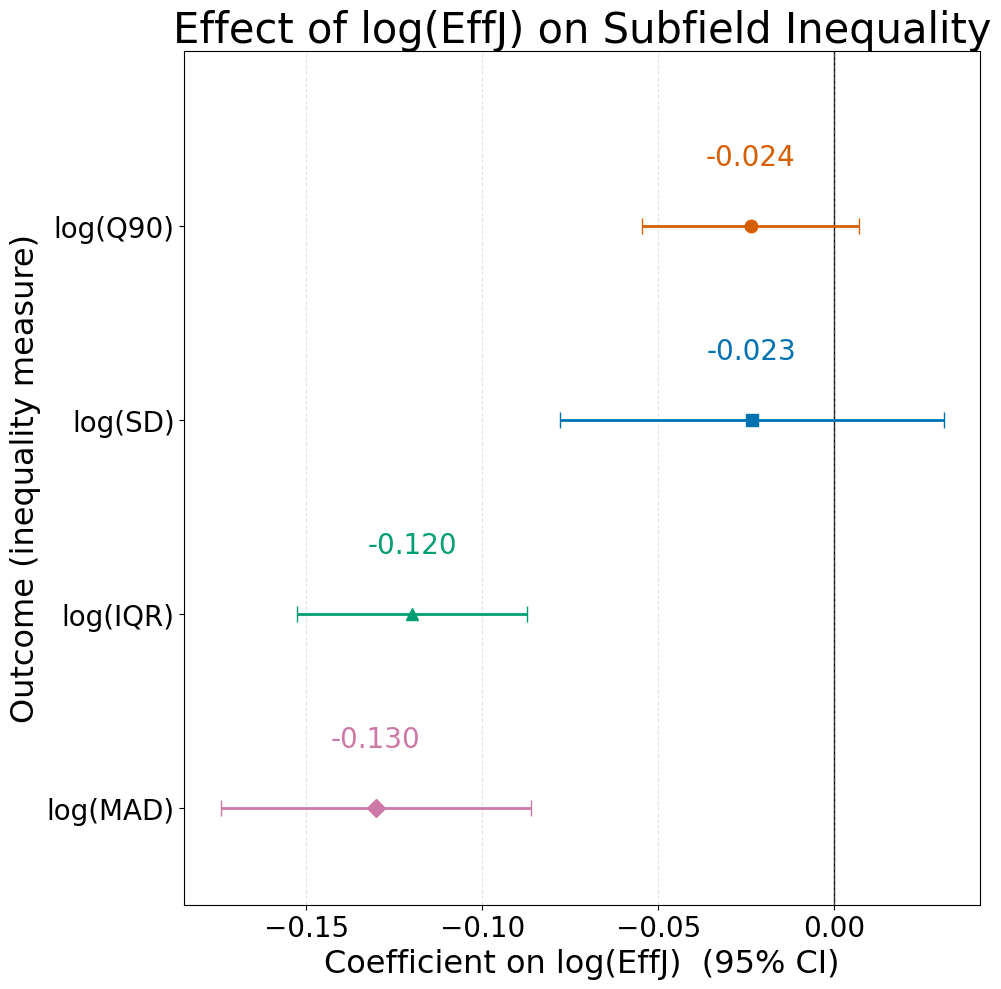

In [78]:

xcols = ["log_EffJ", "log_n", "log_J"]
outcomes = ["log_mad", "log_iqr", "log_sd", "log_q90"]

rows = []
res_store = {}

for y in outcomes:
    r = fit_twfe(panel2, y, xcols)
    res_store[y] = r

    for j, x in enumerate(xcols):
        beta = r.params[j]
        se = r.bse[j]
        ci_lo = beta - 1.96 * se
        ci_hi = beta + 1.96 * se
        rows.append([y, x, beta, se, ci_lo, ci_hi, r.pvalues[j]])

coef_table = pd.DataFrame(rows, columns=["outcome", "x", "beta", "se", "ci_lo", "ci_hi", "p"])


# ---- Publication-quality coefficient plot ----

sub = coef_table.loc[coef_table["x"] == "log_EffJ"].copy()
sub = sub.set_index("outcome").loc[outcomes].reset_index()

label_map = {
    "log_q90": "log(Q90)",
    "log_sd": "log(SD)",
    "log_iqr": "log(IQR)",
    "log_mad": "log(MAD)"
}
sub["label"] = sub["outcome"].map(label_map)

# Color-blind friendly palette (Okabe–Ito)
palette = {
    "log_q90": "#D55E00",   # vermillion
    "log_sd":  "#0072B2",   # blue
    "log_iqr": "#009E73",   # green
    "log_mad": "#CC79A7",   # purple
}

# Marker shapes
markers = {
    "log_q90": "o",
    "log_sd":  "s",
    "log_iqr": "^",
    "log_mad": "D",
}

ypos = np.arange(len(sub))

plt.figure(figsize=(10,10))

# Plot each outcome separately for styling control
for i, row in sub.iterrows():
    y = ypos[i]
    b = row["beta"]
    lo = row["ci_lo"]
    hi = row["ci_hi"]
    key = row["outcome"]

    plt.errorbar(
        b, y,
        xerr=[[b - lo], [hi - b]],
        fmt=markers[key],
        color=palette[key],
        markersize=9,
        capsize=6,
        linewidth=2,
        zorder=3
    )

    # Place estimand above the point with safe vertical offset
    plt.text(
        b, y + 0.28,
        f"{b:.3f}",
        fontsize=20,
        ha="center",
        va="bottom",
        color=palette[key]
    )

plt.axvline(0, linewidth=1, color="black", zorder=1)

# Axes & labels
plt.yticks(ypos, sub["label"].to_list(), fontsize=20)
plt.xticks(fontsize=20)

plt.xlabel("Coefficient on log(EffJ)  (95% CI)", fontsize=23)
plt.ylabel("Outcome (inequality measure)", fontsize=23)
plt.title("Effect of log(EffJ) on Subfield Inequality", fontsize=30)

# Light grid for readability
plt.grid(axis="x", linestyle="--", alpha=0.35, zorder=0)

# Extra top margin so labels never collide with title
plt.ylim(-0.5, len(sub) - 0.1)

plt.tight_layout()
plt.savefig("coef_plot_effj_inequality.pdf")
plt.show()


In [ ]:
sub = coef_table.loc[coef_table["x"] == "log_EffJ"].copy()
sub = sub.set_index("outcome").loc[outcomes].reset_index()

print("\nEffect of log(EffJ) on inequality outcomes (95% CI)\n")

for _, row in sub.iterrows():
    y = row["outcome"]
    beta = row["beta"]
    lo = row["ci_lo"]
    hi = row["ci_hi"]
    p = row["p"]

    print(f"{y:10s}  beta = {beta: .4f}   96% CI = [{lo: .4f}, {hi: .4f}]   p = {p: .4g}")



Effect of log(EffJ) on inequality outcomes (96% CI)

log_mad     beta = -0.1303   96% CI = [-0.1744, -0.0861]   p =  7.308e-09
log_iqr     beta = -0.1199   96% CI = [-0.1526, -0.0872]   p =  6.198e-13
log_sd      beta = -0.0235   96% CI = [-0.0781,  0.0311]   p =  0.3991
log_q90     beta = -0.0238   96% CI = [-0.0546,  0.0070]   p =  0.1299


## Appendix: DID Alternative Test

### Alternative: 2021

In [66]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from cmdstanpy import CmdStanModel

def add_topic_year_eff_journals(df, weight="count"):
    d = df.copy()
    d["journal_key"] = d["journal_issn"].fillna(d["journal_title"])

    if weight == "in_degree":
        d["_w"] = pd.to_numeric(d["in_degree"], errors="coerce").fillna(0).clip(lower=0)
    elif weight == "count":
        d["_w"] = 1.0
    else:
        raise ValueError("weight must be 'in_degree' or 'count'")

    g = (d.groupby(["topic_cleaned", "citation_year", "journal_key"], as_index=False)["_w"]
           .sum()
           .rename(columns={"_w": "w_j"}))

    tot = (g.groupby(["topic_cleaned", "citation_year"], as_index=False)["w_j"]
             .sum()
             .rename(columns={"w_j": "w_total"}))

    g = g.merge(tot, on=["topic_cleaned", "citation_year"], how="left")
    g["share"] = g["w_j"] / g["w_total"]

    hhi = (g.groupby(["topic_cleaned", "citation_year"])["share"]
             .apply(lambda s: float(np.sum(np.asarray(s) ** 2)))
             .reset_index(name="HHI"))

    hhi["eff_journals"] = 1.0 / hhi["HHI"]

    d = d.merge(hhi[["topic_cleaned", "citation_year", "eff_journals"]],
                on=["topic_cleaned", "citation_year"], how="left")
    return d.drop(columns=["_w"], errors="ignore")


def _missing_abs_to_int(s: pd.Series) -> pd.Series:
    if pd.api.types.is_bool_dtype(s) or str(s.dtype).startswith("boolean"):
        return s.fillna(False).astype(int)
    return pd.to_numeric(s, errors="coerce").fillna(0).astype(int)


def residualize_within_year(df):
    d = df.copy()

    d["citation_year"] = pd.to_numeric(d["citation_year"], errors="coerce").astype(int)
    d["pagerank"] = pd.to_numeric(d["pagerank"], errors="coerce")
    d["SJR"] = pd.to_numeric(d["SJR"], errors="coerce")
    d["in_degree"] = pd.to_numeric(d["in_degree"], errors="coerce").fillna(0).clip(lower=0)

    d["missing_abstract"] = _missing_abs_to_int(d["missing_abstract"])
    d["missing_ref"] = _missing_abs_to_int(d["missing_ref"])

    d = d.dropna(subset=["topic_cleaned", "citation_year", "pagerank", "SJR", "eff_journals"]).copy()

    d["log_pagerank"] = np.log1p(d["pagerank"])
    year_sd = d.groupby("citation_year")["log_pagerank"].transform(lambda s: s.std(ddof=0))
    d = d[year_sd > 0].copy()

    d["y_std"] = d.groupby("citation_year")["log_pagerank"].transform(
        lambda s: (s - s.mean()) / s.std(ddof=0)
    )
    d["SJR_std"] = d.groupby("citation_year")["SJR"].transform(
        lambda s: (s - s.mean()) / s.std(ddof=0)
    )

    out = []
    for y in sorted(d["citation_year"].unique()):
        dy = d[d["citation_year"] == y].copy()
        fit = smf.ols("y_std ~ SJR_std + missing_abstract + missing_ref", data=dy).fit()
        dy["y_adj"] = fit.resid
        out.append(dy)

    return pd.concat(out, ignore_index=True)


def build_binned_cells(
    df,
    weight="count",
    pre_years=range(2015, 2021),
    post_years=range(2021, 2025),
    q=3
):
    d0 = add_topic_year_eff_journals(df, weight=weight)

    keep_years = set(pre_years) | set(post_years)
    d0 = d0[pd.to_numeric(d0["citation_year"], errors="coerce").isin(list(keep_years))].copy()

    d = residualize_within_year(d0)

    eff_pre = (d[d["citation_year"].isin(list(pre_years))]
               .groupby("topic_cleaned", as_index=False)["eff_journals"]
               .mean()
               .rename(columns={"eff_journals": "eff_pre"}))
    d = d.merge(eff_pre, on="topic_cleaned", how="left").dropna(subset=["eff_pre", "y_adj"]).copy()

    cell = (d.groupby(["topic_cleaned", "citation_year"], as_index=False)
              .agg(y_mean=("y_adj", "mean"),
                   y_sd=("y_adj", "std"),
                   n=("y_adj", "size"),
                   eff_pre=("eff_pre", "first")))

    cell["se"] = cell["y_sd"] / np.sqrt(cell["n"])
    cell["se"] = cell["se"].fillna(0.0)
    cell["se"] = np.maximum(cell["se"].to_numpy(), 1e-8)

    cell["is_pre"] = cell["citation_year"].isin(list(pre_years))
    pre = cell[cell["is_pre"]].copy()

    pre_bar = (pre.groupby("topic_cleaned", as_index=False)["y_mean"]
               .mean()
               .rename(columns={"y_mean": "y_prebar"}))

    pre_se2 = (pre.groupby("topic_cleaned")["se"]
               .apply(lambda s: float(np.sum((s.to_numpy())**2) / (len(s)**2)))
               .rename("se_pre2")
               .reset_index())

    cell2 = (cell.merge(pre_bar, on="topic_cleaned", how="left")
                 .merge(pre_se2, on="topic_cleaned", how="left"))

    cell2["y_tilde"] = cell2["y_mean"] - cell2["y_prebar"]
    cell2["se_pre2"] = cell2["se_pre2"].fillna(0.0)
    cell2["se_tilde"] = np.sqrt(cell2["se"]**2 + cell2["se_pre2"])
    cell2["se_tilde"] = np.maximum(cell2["se_tilde"].to_numpy(), 1e-6)

    cell2["post"] = cell2["citation_year"].isin(list(post_years)).astype(int)

    topic_eff = (cell2.groupby("topic_cleaned", as_index=False)["eff_pre"].first()
                 .sort_values("eff_pre")
                 .reset_index(drop=True))
    topic_eff["eff_rank"] = topic_eff["eff_pre"].rank(method="average")
    labels = ["low", "mid", "high"] if q == 3 else [f"q{i+1}" for i in range(q)]
    topic_eff["eff_grp"] = pd.qcut(topic_eff["eff_rank"], q=q, labels=labels)

    cell2 = cell2.merge(topic_eff[["topic_cleaned", "eff_grp"]], on="topic_cleaned", how="left")
    cell2 = cell2.dropna(subset=["eff_grp"]).copy()

    years = pd.Index(sorted(cell2["citation_year"].unique()))
    cell2["year_id"] = years.get_indexer(cell2["citation_year"]) + 1

    gmap = {lab: i + 1 for i, lab in enumerate(labels)}
    cell2["g"] = cell2["eff_grp"].map(gmap).astype(int)

    return cell2, topic_eff, years, labels


stan_code = r"""
data {
  int<lower=1> N;
  vector[N] y_hat;
  vector<lower=0>[N] se;

  int<lower=1> T;
  array[N] int<lower=1,upper=T> year;

  array[N] int<lower=0,upper=1> post;

  int<lower=2> G;
  array[N] int<lower=1,upper=G> g;
}

parameters {
  vector[T] year_fe;
  real b_post0;
  real<lower=0> sigma_b;
  vector[G] b_z;
}

transformed parameters {
  vector[G] b_post = b_post0 + sigma_b * b_z;
}

model {
  year_fe ~ normal(0, 0.05);
  b_post0 ~ normal(0, 0.1);
  sigma_b ~ normal(0, 0.3);
  b_z ~ normal(0, 1);

  for (n in 1:N) {
    real mu = year_fe[year[n]];
    if (post[n] == 1) {
      mu += b_post[g[n]];
    }
    y_hat[n] ~ normal(mu, se[n]);
  }
}

generated quantities {
  real diff_high_low;
  real diff_mid_low;

  if (G == 3) {
    diff_high_low = b_post[3] - b_post[1];
    diff_mid_low  = b_post[2] - b_post[1];
  } else {
    diff_high_low = b_post[G] - b_post[1];
    diff_mid_low  = b_post[2] - b_post[1];
  }
}
"""
with open("meta_model_ref2021.stan", "w", encoding="utf-8") as f:
    f.write(stan_code)


# ----------------------------
# RUN: Post starts 2021
# ----------------------------
pre_years = range(2015, 2021)   # 2015-2020
post_years = range(2021, 2025)  # 2021-2024

cell2, topic_eff, years_idx, labels = build_binned_cells(
    df,
    weight="count",
    pre_years=pre_years,
    post_years=post_years,
    q=3
)

stan_data = {
    "N": int(cell2.shape[0]),
    "y_hat": cell2["y_tilde"].to_numpy(dtype=float),
    "se": cell2["se_tilde"].to_numpy(dtype=float),
    "T": int(len(years_idx)),
    "year": cell2["year_id"].to_numpy(dtype=int),
    "post": cell2["post"].to_numpy(dtype=int),
    "G": int(len(labels)),
    "g": cell2["g"].to_numpy(dtype=int),
}

m = CmdStanModel(stan_file="meta_model_ref2021.stan")
fit = m.sample(
    data=stan_data,
    chains=4,
    iter_warmup=2000,
    iter_sampling=2000,
    adapt_delta=0.995,
    max_treedepth=18
)


draws = fit.draws_pd()

def summarize(x):
    x = np.asarray(x, dtype=float)
    return float(x.mean()), np.quantile(x, [0.025, 0.975]).astype(float), float((x < 0).mean())

for j, name in enumerate(labels, start=1):
    m0, ci, p0 = summarize(draws[f"b_post[{j}]"])
    print(f"{name}: mean {m0:.6g} CrI {ci} P<0 {p0:.4g}")

dh = draws["diff_high_low"].to_numpy()
dm = draws["diff_mid_low"].to_numpy()
m0, ci, p0 = summarize(dh)
print(f"diff_high_low: mean {m0:.6g} CrI {ci} P<0 {p0:.4g}")
m0, ci, p0 = summarize(dm)
print(f"diff_mid_low:  mean {m0:.6g} CrI {ci} P<0 {p0:.4g}")

# Posterior rank-change (field = topic_cleaned)
field_tbl = (cell2[cell2["citation_year"].isin(list(pre_years))]
             .groupby("topic_cleaned", as_index=False)
             .agg(pre_score=("y_mean", "mean"),
                  eff_grp=("eff_grp", "first"))
             .rename(columns={"topic_cleaned": "field"}))

gmap = {"low": 1, "mid": 2, "high": 3}
g = field_tbl["eff_grp"].map(gmap).to_numpy(dtype=int)
pre = field_tbl["pre_score"].to_numpy(dtype=float)

pre_rank = (-pre).argsort().argsort() + 1

B = np.column_stack([
    draws["b_post[1]"].to_numpy(),
    draws["b_post[2]"].to_numpy(),
    draws["b_post[3]"].to_numpy(),
])

S = B.shape[0]
rank_change = np.empty((S, pre.shape[0]), dtype=int)

for s in range(S):
    post = pre + B[s, g - 1]
    post_rank = (-post).argsort().argsort() + 1
    rank_change[s, :] = post_rank - pre_rank

out = pd.DataFrame({
    "field": field_tbl["field"].to_numpy(),
    "eff_grp": field_tbl["eff_grp"].to_numpy(),
    "pre_rank": pre_rank,
    "E_rank_change": rank_change.mean(axis=0),
    "p_down_>=1": (rank_change >= 1).mean(axis=0),
    "p_up_>=1": (rank_change <= -1).mean(axis=0),
    "rank_change_q025": np.quantile(rank_change, 0.025, axis=0),
    "rank_change_q50": np.quantile(rank_change, 0.50, axis=0),
    "rank_change_q975": np.quantile(rank_change, 0.975, axis=0),
}).sort_values(["eff_grp", "pre_rank"])

print(out)


16:28:53 - cmdstanpy - INFO - compiling stan file /var/folders/v7/61m_k7ln6152ynmfwtlz73yc0000gn/T/tmp4r_l6fnr/tmpzmhts2r1.stan to exe file /Users/lauzhenyi/Library/Mobile Documents/com~apple~CloudDocs/main/vscode/python/RA/aging_robustness_check_SJR/meta_model_ref2021
16:28:56 - cmdstanpy - INFO - compiled model executable: /Users/lauzhenyi/Library/Mobile Documents/com~apple~CloudDocs/main/vscode/python/RA/aging_robustness_check_SJR/meta_model_ref2021
16:28:56 - cmdstanpy - INFO - CmdStan start processing


chain 1:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

chain 2:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

chain 3:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

chain 4:   0%|          | 0/4000 [00:00<?, ?it/s, (Warmup)]

16:29:21 - cmdstanpy - INFO - CmdStan done processing.
16:29:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'meta_model_ref2021.stan', line 38, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'meta_model_ref2021.stan', line 38, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'meta_model_ref2021.stan', line 38, column 4 to column 33)
Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model_ref2021.stan', line 38, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model_ref2021.stan', line 38, column 4 to column 33)
	Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in 'meta_model_ref2021.stan', line 38, column 4 to column 33)
Consider re-running with show_console=True if the above output is un


low: mean 0.00347453 CrI [-0.04596488  0.05317013] P<0 0.4467
mid: mean -0.00974772 CrI [-0.05950321  0.03974273] P<0 0.6491
high: mean -0.00997061 CrI [-0.05998655  0.03923333] P<0 0.6525
diff_high_low: mean -0.0134451 CrI [-0.01593006 -0.01092879] P<0 1
diff_mid_low:  mean -0.0132223 CrI [-0.01590922 -0.01049126] P<0 1
                        field eff_grp  pre_rank  E_rank_change  p_down_>=1  \
15    rehabilitation medicine    high         3       0.016375    0.016375   
5    health services research    high         4       0.043875    0.043875   
0          addiction medicine    high         5       0.100625    0.100625   
1                       aging    high         6       1.006375    0.997625   
4               endocrinology    high         8       1.980500    1.000000   
16                    surgery    high        15      -0.150375    0.006500   
9                microbiology     low         1       0.000000    0.000000   
7                  immunology     low         2     

### visualize: parallel trend test

/var/folders/v7/61m_k7ln6152ynmfwtlz73yc0000gn/T/ipykernel_20063/1422395706.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gg = (cell2.groupby(["citation_year", "eff_grp"], as_index=False)


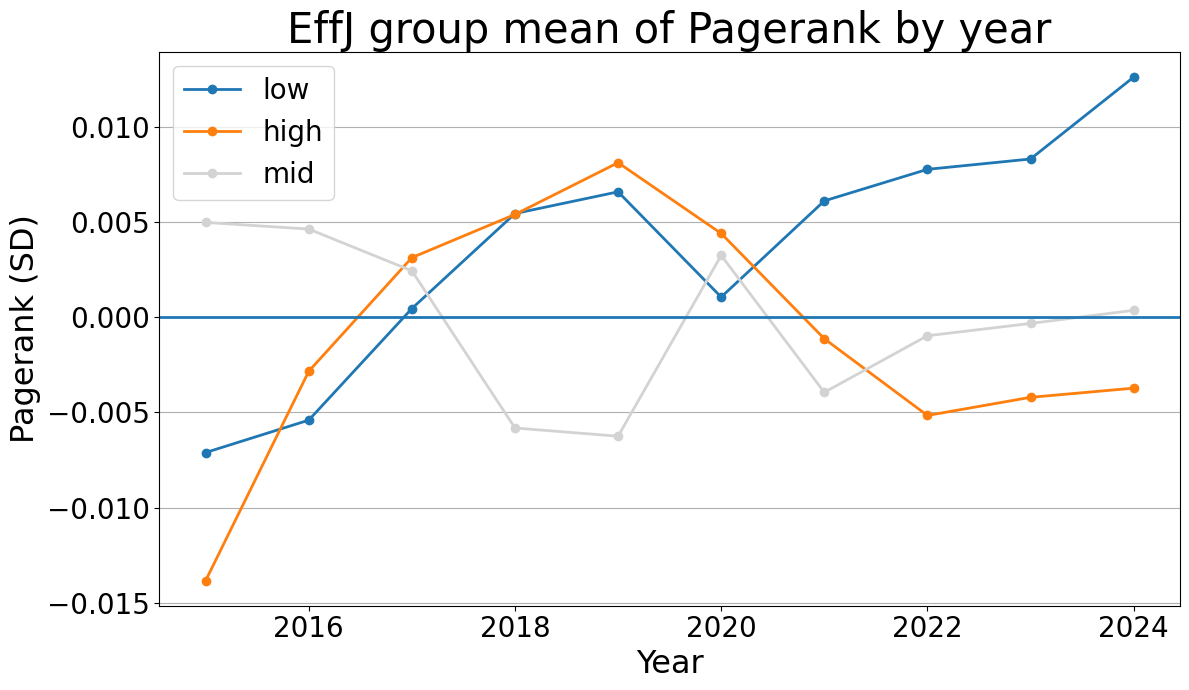

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use cell2 from your pipeline
gg = (cell2.groupby(["citation_year", "eff_grp"], as_index=False)
      .agg(y=("y_tilde", "mean")))

fig, ax = plt.subplots(figsize=(12, 7))
for grp in ["low", "high", "mid"]:
    s = gg[gg["eff_grp"] == grp].sort_values("citation_year")
    if grp in ["low", "high"]:
        ax.plot(s["citation_year"], s["y"], marker="o", linewidth=2, label=grp)
    else:
        ax.plot(s["citation_year"], s["y"], marker="o", linewidth=2, label=grp, color="lightgray")

ax.axhline(0, linewidth=2)
ax.set_title("EffJ group mean of Pagerank by year", fontsize=30)
ax.set_xlabel("Year", fontsize=23)
ax.set_ylabel("Pagerank (SD)", fontsize=23)
ax.tick_params(axis="both", labelsize=20)
ax.legend(fontsize=20)
ax.grid(True, axis="y")
plt.tight_layout()
plt.savefig("effj_group_means_y_tilde.pdf")
plt.show()


## Appendix: Construct Validity

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
# SJR_z within citation_year (snapshot-year standardization)
df["SJR_z"] = df.groupby("citation_year")["SJR"].transform(lambda s: (s - s.mean()) / s.std())

# Unique-article table for publication-side constructs (journal dispersion etc.)
df_unique = df.sort_values("citation_year").drop_duplicates("id", keep="first")

In [23]:

# 1) Convergent + partial correlation (Pagerank vs in_degree, controlling SJR_z)

# Raw correlation (overall)
raw_corr = df[[ "pagerank", "in_degree"]].corr().iloc[0, 1]
print("Raw corr(pagerank, in_degree):", raw_corr)

# Partial correlation via residualization (overall): corr(resid(PR~SJR_z), resid(in_degree~SJR_z))
m_pr = smf.ols("pagerank ~ SJR_z", data=df).fit()
m_deg = smf.ols("in_degree ~ SJR_z", data=df).fit()
partial_corr = stats.pearsonr(m_pr.resid, m_deg.resid)[0]
print("Partial corr(pagerank, in_degree | SJR_z):", partial_corr)

# By-year raw vs partial
rows = []
for y, d in df.groupby("citation_year", sort=True):
    r_raw = d[["pagerank", "in_degree"]].corr().iloc[0, 1]
    m1 = smf.ols("pagerank ~ SJR_z", data=d).fit()
    m2 = smf.ols("in_degree ~ SJR_z", data=d).fit()
    r_partial = stats.pearsonr(m1.resid, m2.resid)[0]
    rows.append((y, len(d), r_raw, r_partial, r_partial - r_raw))
validity_by_year = pd.DataFrame(rows, columns=["citation_year", "n", "raw_corr", "partial_corr", "partial_minus_raw"])
validity_by_year.head(10)


Raw corr(pagerank, in_degree): 0.8885354776531816
Partial corr(pagerank, in_degree | SJR_z): 0.8873358786242442


,citation_year,n,raw_corr,partial_corr,partial_minus_raw
0,2015,60671,0.991653,0.991687,0.000034
1,2016,128468,0.987217,0.987491,0.000274
2,2017,202227,0.975393,0.976065,0.000672
3,2018,286299,0.962810,0.963432,0.000622
4,2019,392584,0.947761,0.948194,0.000434
5,2020,520732,0.923084,0.922712,-0.000371
6,2021,699978,0.908521,0.907743,-0.000778
7,2022,889308,0.895074,0.893929,-0.001145
8,2023,1067541,0.884006,0.883007,-0.000999
9,2024,1266596,0.875263,0.874419,-0.000844


In [24]:

# 1) Discriminant-style checks

# (a) R^2: how much PR is explained by in_degree alone vs + SJR_z
m_a = smf.ols("pagerank ~ in_degree", data=df).fit()
m_b = smf.ols("pagerank ~ in_degree + SJR_z", data=df).fit()
pd.DataFrame({"model": ["PR ~ in_degree", "PR ~ in_degree + SJR_z"], "R2": [m_a.rsquared, m_b.rsquared]})


,model,R2
0,PR ~ in_degree,0.789495
1,PR ~ in_degree + SJR_z,0.791489


In [25]:
# (b) Within in-degree deciles (within citation_year), pagerank dispersion
df["in_degree_decile"] = df.groupby("citation_year")["in_degree"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)

within_decile_disp = (
    df.groupby(["citation_year", "in_degree_decile"])["pagerank"]
      .agg(n="count", mean="mean", std="std", median="median")
      .reset_index()
)

within_decile_disp.head(20)

,citation_year,in_degree_decile,n,mean,std,median
0,2015,0,52917,9.266078e-09,2.419981e-09,8.254617e-09
1,2015,1,3789,1.833576e-08,4.286439e-09,1.877928e-08
2,2015,2,3965,4.258656e-08,2.290304e-07,2.930394e-08
3,2016,0,90680,9.439335e-09,2.534189e-09,8.235068e-09
4,2016,1,12416,1.734525e-08,4.299302e-09,1.756814e-08
5,2016,2,15538,2.519942e-08,7.447318e-09,2.506065e-08
6,2016,3,9834,6.203165e-08,2.172317e-07,4.673401e-08
7,2017,0,119023,9.464971e-09,2.526253e-09,8.201656e-09
8,2017,1,20506,1.659506e-08,4.251538e-09,1.656737e-08
9,2017,2,13926,2.058223e-08,5.586441e-09,2.040165e-08


In [26]:
# 3) EffJ (1/HHI) by (topic_cleaned, publication_year) using df_unique

# Journal counts within (field, pub_year)
vc = (
    df_unique.groupby(["topic_cleaned", "publication_year"])["journal_issn"]
    .value_counts(dropna=False)
    .rename("n")
    .reset_index()
)

# Convert to shares and compute HHI, EffJ
vc["total"] = vc.groupby(["topic_cleaned", "publication_year"])["n"].transform("sum")
vc["p"] = vc["n"] / vc["total"]
effj = (
    vc.groupby(["topic_cleaned", "publication_year"])["p"]
      .apply(lambda s: np.sum(np.square(s.values)))
      .rename("HHI")
      .reset_index()
)
effj["EffJ"] = 1.0 / effj["HHI"]

# Add group sizes
n_papers = df_unique.groupby(["topic_cleaned", "publication_year"]).size().rename("n_papers").reset_index()
n_journals = vc.groupby(["topic_cleaned", "publication_year"]).size().rename("n_journals_observed").reset_index()
effj = effj.merge(n_papers, on=["topic_cleaned", "publication_year"], how="left").merge(n_journals, on=["topic_cleaned", "publication_year"], how="left")
effj.head(10)

,topic_cleaned,publication_year,HHI,EffJ,n_papers,n_journals_observed
0,addiction medicine,2015.0,0.013786,72.539438,1897,375
1,addiction medicine,2016.0,0.013811,72.404667,2023,399
2,addiction medicine,2017.0,0.012839,77.890675,2150,422
3,addiction medicine,2018.0,0.014183,70.506999,2682,465
4,addiction medicine,2019.0,0.016174,61.827675,3121,504
5,addiction medicine,2020.0,0.017589,56.855281,3762,579
6,addiction medicine,2021.0,0.020203,49.497329,4389,592
7,addiction medicine,2022.0,0.022543,44.358696,4634,608
8,addiction medicine,2023.0,0.016042,62.336145,4555,655
9,addiction medicine,2024.0,0.014560,68.680913,4229,595


In [27]:
# 3) Rarefaction (size-adjusted EffJ): fixed N, repeat R times, compare ranking stability

N = 200   # sample size per (field, pub_year)
R = 200   # repeats
rng = np.random.default_rng(0)

# Eligible groups
grp_sizes = df_unique.groupby(["topic_cleaned", "publication_year"]).size().rename("n").reset_index()
eligible = grp_sizes[grp_sizes["n"] >= N].copy()

# Pre-index row indices for each eligible group
idx_map = {}
for (f, y), d in df_unique.groupby(["topic_cleaned", "publication_year"]):
    if len(d) >= N:
        idx_map[(f, y)] = d.index.to_numpy()

# Rarefaction draws
draws = []
for r in range(R):
    rows = []
    for (f, y), idx in idx_map.items():
        samp = rng.choice(idx, size=N, replace=False)
        c = df_unique.loc[samp, "journal_issn"].value_counts(dropna=False).values.astype(float)
        p = c / c.sum()
        hhi = np.sum(p * p)
        rows.append((f, y, 1.0 / hhi))
    draws.append(pd.DataFrame(rows, columns=["topic_cleaned", "publication_year", "EffJ_rarefied"]))
rarefied = pd.concat(draws, ignore_index=True)

# Rarefied summary
rare_sum = (
    rarefied.groupby(["topic_cleaned", "publication_year"])["EffJ_rarefied"]
    .agg(
        mean="mean",
        std="std",
        p2_5=lambda s: np.quantile(s, 0.025),
        p97_5=lambda s: np.quantile(s, 0.975),
    )
    .reset_index()
)

# Compare to full EffJ
rare_cmp = effj.merge(rare_sum, on=["topic_cleaned", "publication_year"], how="inner")
rare_cmp = rare_cmp[rare_cmp["n_papers"] >= N].copy()
rare_cmp["full_in_CI"] = (rare_cmp["EffJ"] >= rare_cmp["p2_5"]) & (rare_cmp["EffJ"] <= rare_cmp["p97_5"])
rare_cmp["delta_full_minus_rarefied_mean"] = rare_cmp["EffJ"] - rare_cmp["mean"]

# Rank stability per publication_year (Spearman rank corr: full vs rarefied mean)
st_rows = []
for y, d in rare_cmp.groupby("publication_year", sort=True):
    if len(d) < 5:
        continue
    rho = stats.spearmanr(d["EffJ"].rank(), d["mean"].rank()).correlation
    st_rows.append((y, rho, len(d)))
rank_stability = pd.DataFrame(st_rows, columns=["publication_year", "spearman_rank_corr", "n_fields"])

rank_stability.head(10)

,publication_year,spearman_rank_corr,n_fields
0,2015.0,1.000000,17
1,2016.0,0.990196,17
2,2017.0,0.997549,17
3,2018.0,1.000000,17
4,2019.0,0.997549,17
5,2020.0,0.995098,17
6,2021.0,0.995098,17
7,2022.0,0.997549,17
8,2023.0,0.997549,17
9,2024.0,0.990196,17


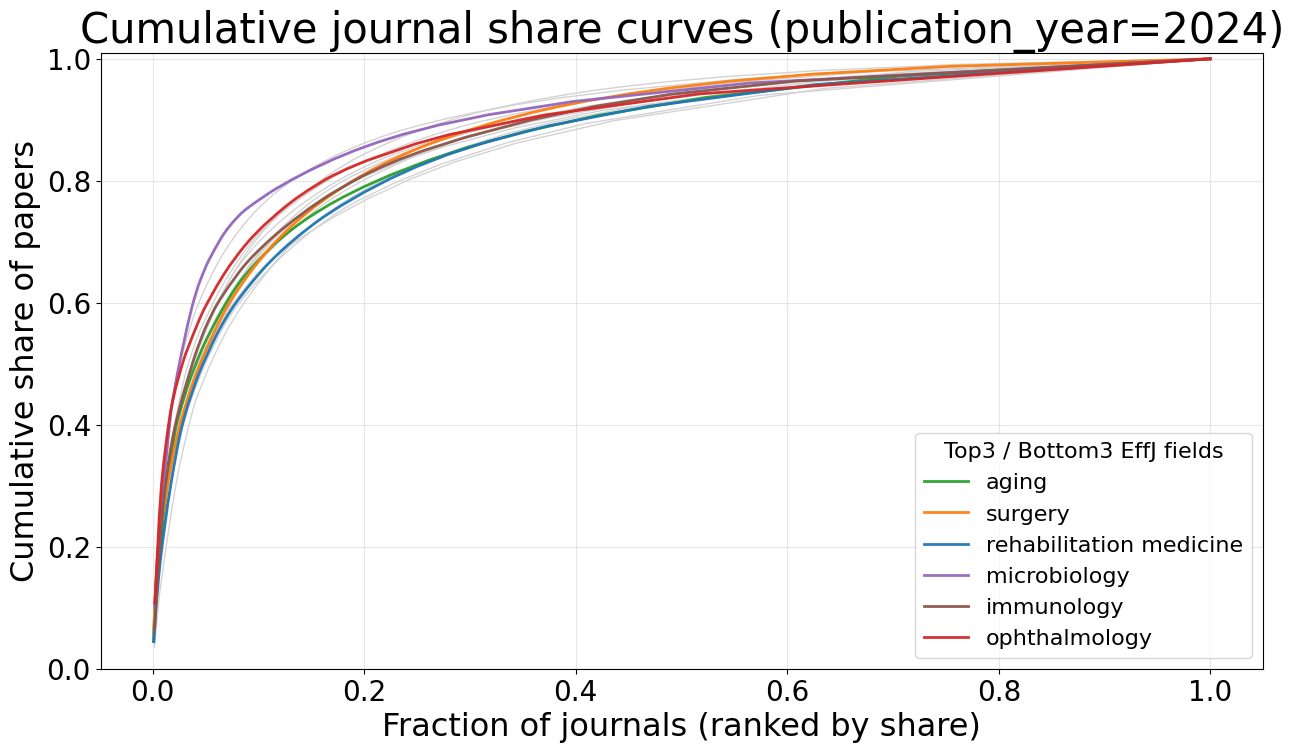

Num topics plotted: 17
Top 3 EffJ fields: ['rehabilitation medicine', 'surgery', 'aging']
Bottom 3 EffJ fields: ['ophthalmology', 'microbiology', 'immunology']


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Latest year
year_value = int(df_unique["publication_year"].max())

# Top/Bottom 3 by EffJ (for that year)
effj_y = effj.loc[effj["publication_year"] == year_value].dropna(subset=["EffJ"]).sort_values("EffJ")
bottom3 = effj_y.head(3)["topic_cleaned"].tolist()
top3 = effj_y.tail(3)["topic_cleaned"].tolist()

# Precompute curves for ALL topics in that year
curves = []
df_y = df_unique.loc[df_unique["publication_year"] == year_value]
for f, d in df_y.groupby("topic_cleaned", sort=False):
    vc = d["journal_issn"].value_counts(dropna=False)
    shares = (vc / vc.sum()).to_numpy()
    shares = np.sort(shares)[::-1]
    cum = np.cumsum(shares)
    x = np.arange(1, len(cum) + 1) / len(cum)
    curves.append((f, x, cum))

plt.figure(figsize=(15, 8))

# Background: ALL topics in light gray
for f, x, cum in curves:
    plt.plot(x, cum, linewidth=1, color="lightgray")

# Highlight colors (pick any you like)
highlight_order = top3 + bottom3
highlight_colors = {
    highlight_order[0]: "C0",
    highlight_order[1]: "C1",
    highlight_order[2]: "C2",
    highlight_order[3]: "C3",
    highlight_order[4]: "C4",
    highlight_order[5]: "C5",
}

# Draw highlights and collect REAL handles for legend
highlight_handles = []
highlight_labels = []

for f, x, cum in curves:
    if f in highlight_colors:
        (line,) = plt.plot(x, cum, linewidth=2, color=highlight_colors[f], alpha=0.95)
        highlight_handles.append(line)
        highlight_labels.append(f)

plt.title(f"Cumulative journal share curves (publication_year={year_value})", fontsize=30)
plt.xlabel("Fraction of journals (ranked by share)", fontsize=23)
plt.ylabel("Cumulative share of papers", fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1.01)
plt.grid(True, alpha=0.3)

plt.legend(
    highlight_handles,
    highlight_labels,
    fontsize=16,
    title="Top3 / Bottom3 EffJ fields",
    title_fontsize=16,
    loc="lower right",
)

plt.show()

print("Num topics plotted:", len(curves))
print("Top 3 EffJ fields:", top3)
print("Bottom 3 EffJ fields:", bottom3)


In [44]:
import numpy as np
import pandas as pd
import itertools

# -----------------------------
# 1) Setup: year, top5/bottom5 by EffJ
# -----------------------------
year_value = int(df_unique["publication_year"].max())

effj_y = effj.loc[effj["publication_year"] == year_value].copy()
effj_y = effj_y.loc[effj_y["EffJ"].notna()].sort_values("EffJ")

k = 5
bottomk = effj_y.head(k)["topic_cleaned"].tolist()
topk = effj_y.tail(k)["topic_cleaned"].tolist()

# -----------------------------
# 2) Gini from probability vector p (sum=1)
# -----------------------------
def gini_from_probs(p: np.ndarray) -> float:
    p = np.asarray(p, dtype=float)
    p = p[np.isfinite(p) & (p > 0)]
    if p.size == 0:
        return np.nan
    p = p / p.sum()
    p = np.sort(p)  # ascending
    cum = np.cumsum(p)
    B = cum.mean()
    n = p.size
    return 1.0 + 1.0 / n - 2.0 * B

# -----------------------------
# 3) Compute topic-level Gini for that year
# -----------------------------
df_y = df_unique.loc[df_unique["publication_year"] == year_value]

gini_rows = []
for topic, d in df_y.groupby("topic_cleaned", sort=False):
    vc = d["journal_issn"].value_counts(dropna=False)
    p = (vc / vc.sum()).to_numpy()
    g = gini_from_probs(p)
    gini_rows.append((topic, g))

gini_df = pd.DataFrame(gini_rows, columns=["topic_cleaned", "gini"]).set_index("topic_cleaned")

g_top = gini_df.loc[topk, "gini"].to_numpy()
g_bot = gini_df.loc[bottomk, "gini"].to_numpy()

print("Top5 topics:", topk)
print("Bottom5 topics:", bottomk)
print("Top5 Gini:", g_top)
print("Bottom5 Gini:", g_bot)

# -----------------------------
# 4) Exact permutation test on mean difference
# -----------------------------
all_vals = np.concatenate([g_top, g_bot])
obs = g_top.mean() - g_bot.mean()

idx = np.arange(all_vals.size)
diffs = []
for comb in itertools.combinations(idx, k):
    comb = np.array(comb)
    mask = np.zeros_like(idx, dtype=bool)
    mask[comb] = True
    diffs.append(all_vals[mask].mean() - all_vals[~mask].mean())
diffs = np.array(diffs)

p_two_sided = (np.abs(diffs) >= abs(obs)).mean()

# -----------------------------
# 5) Effect sizes: mean diff, Hedges' g, Cliff's delta
# -----------------------------
mean_diff = obs

n1, n2 = g_top.size, g_bot.size
s1, s2 = g_top.std(ddof=1), g_bot.std(ddof=1)
sp = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
cohen_d = mean_diff / sp
J = 1.0 - (3.0 / (4.0 * (n1 + n2) - 9.0))
hedges_g = J * cohen_d

gt = 0
lt = 0
for x in g_top:
    for y in g_bot:
        if x > y:
            gt += 1
        elif x < y:
            lt += 1
cliffs_delta = (gt - lt) / (n1 * n2)

diff_lo, diff_hi = np.quantile(diffs, [0.025, 0.975])

print("\n=== Test (Top5 vs Bottom5, Gini) ===")
print(f"Observed mean diff (Top - Bottom) = {mean_diff:.6f}")
print(f"Exact permutation p (two-sided)   = {p_two_sided:.6f}")
print(f"Permutation diffs 2.5%..97.5%     = [{diff_lo:.6f}, {diff_hi:.6f}]")

print("\n=== Effect size ===")
print(f"Hedges' g (Top - Bottom)         = {hedges_g:.6f}")
print(f"Cliff's delta                    = {cliffs_delta:.6f}")


Top5 topics: ['hepatology', 'endocrinology', 'rehabilitation medicine', 'surgery', 'aging']
Bottom5 topics: ['ophthalmology', 'microbiology', 'immunology', 'cardiovascular medicine', 'dermatology']
Top5 Gini: [0.72680877 0.75447256 0.73011237 0.76983388 0.74192983]
Bottom5 Gini: [0.77407938 0.80548662 0.76228166 0.78550505 0.74906438]

=== Test (Top5 vs Bottom5, Gini) ===
Observed mean diff (Top - Bottom) = -0.030652
Exact permutation p (two-sided)   = 0.055556
Permutation diffs 2.5%..97.5%     = [-0.030185, 0.030185]

=== Effect size ===
Hedges' g (Top - Bottom)         = -1.396908
Cliff's delta                    = -0.760000


In [42]:
# 5) Subfield (prim_topic) concentration of mass within (citation_year, topic_cleaned)
# Do it for pagerank mass and betweenness mass.

# Pagerank mass across prim_topic
g_pr = (
    df.groupby(["citation_year", "topic_cleaned", "prim_topic"])["pagerank"]
      .sum()
      .rename("mass_sub")
      .reset_index()
)
g_pr["mass_field"] = g_pr.groupby(["citation_year", "topic_cleaned"])["mass_sub"].transform("sum")
g_pr["share"] = g_pr["mass_sub"] / g_pr["mass_field"]
sub_pr = (
    g_pr.groupby(["citation_year", "topic_cleaned"])["share"]
        .apply(lambda s: np.sum(np.square(s.values)))
        .rename("HHI_subfield_pagerank_mass")
        .reset_index()
)
sub_pr["EffSub_pagerank_mass"] = 1.0 / sub_pr["HHI_subfield_pagerank_mass"]

# Betweenness mass across prim_topic
g_bw = (
    df.groupby(["citation_year", "topic_cleaned", "prim_topic"])["betweenness"]
      .sum()
      .rename("mass_sub")
      .reset_index()
)
g_bw["mass_field"] = g_bw.groupby(["citation_year", "topic_cleaned"])["mass_sub"].transform("sum")
g_bw["share"] = g_bw["mass_sub"] / g_bw["mass_field"]
sub_bw = (
    g_bw.groupby(["citation_year", "topic_cleaned"])["share"]
        .apply(lambda s: np.sum(np.square(s.values)))
        .rename("HHI_subfield_betweenness_mass")
        .reset_index()
)
sub_bw["EffSub_betweenness_mass"] = 1.0 / sub_bw["HHI_subfield_betweenness_mass"]

sub_pr.head(10), sub_bw.head(10)

(   citation_year             topic_cleaned  HHI_subfield_pagerank_mass  \
 0           2015        addiction medicine                    0.066576   
 1           2015                     aging                    0.010851   
 2           2015   cardiovascular medicine                    0.031713   
 3           2015               dermatology                    0.019664   
 4           2015             endocrinology                    0.017388   
 5           2015  health services research                    0.031074   
 6           2015                hepatology                    0.047982   
 7           2015                immunology                    0.009519   
 8           2015       infectious diseases                    0.030886   
 9           2015              microbiology                    0.023861   
 
    EffSub_pagerank_mass  
 0             15.020509  
 1             92.157738  
 2             31.533009  
 3             50.854755  
 4             57.509727  
 5         

Corr(sum_pagerank, mean_pagerank) across (citation_year, field): 0.5669705021122926


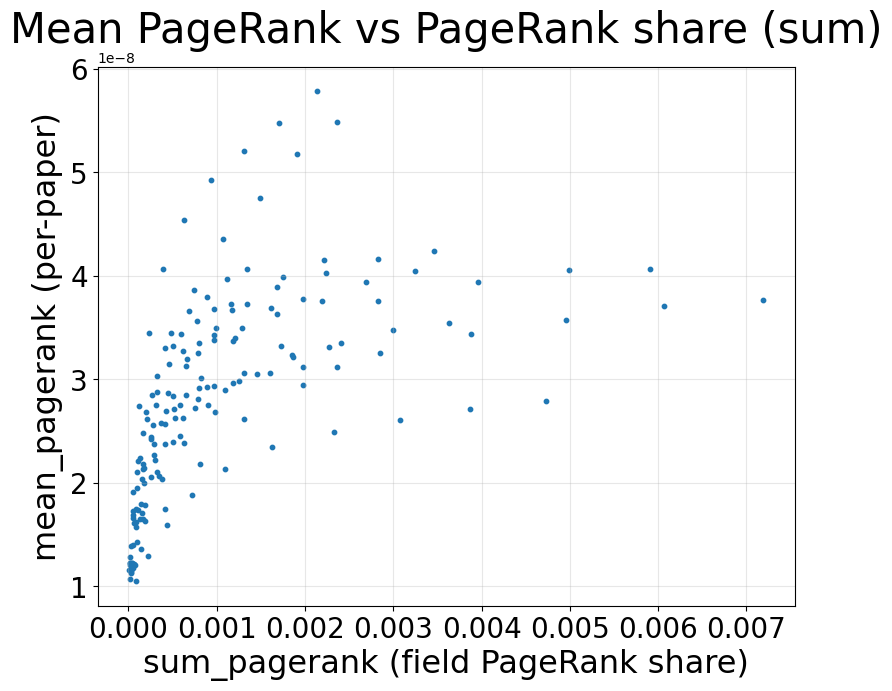

In [30]:
# 6) Mean pagerank vs pagerank share (sum) similarity at (citation_year, topic_cleaned)

agg = (
    df.groupby(["citation_year", "topic_cleaned"])["pagerank"]
      .agg(sum_pagerank="sum", mean_pagerank="mean", n="count")
      .reset_index()
)

corr_mean_vs_sum = agg[["sum_pagerank", "mean_pagerank"]].corr().iloc[0, 1]
print("Corr(sum_pagerank, mean_pagerank) across (citation_year, field):", corr_mean_vs_sum)

# Optional: scatter (big fonts)
plt.figure(figsize=(9, 7))
plt.scatter(agg["sum_pagerank"], agg["mean_pagerank"], s=10)
plt.title("Mean PageRank vs PageRank share (sum)", fontsize=30)
plt.xlabel("sum_pagerank (field PageRank share)", fontsize=23)
plt.ylabel("mean_pagerank (per-paper)", fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.3)
plt.show()

Observed beta(EffJ) on standardized DV: -0.0006921024433139992
Permutation p (two-sided): 1.0


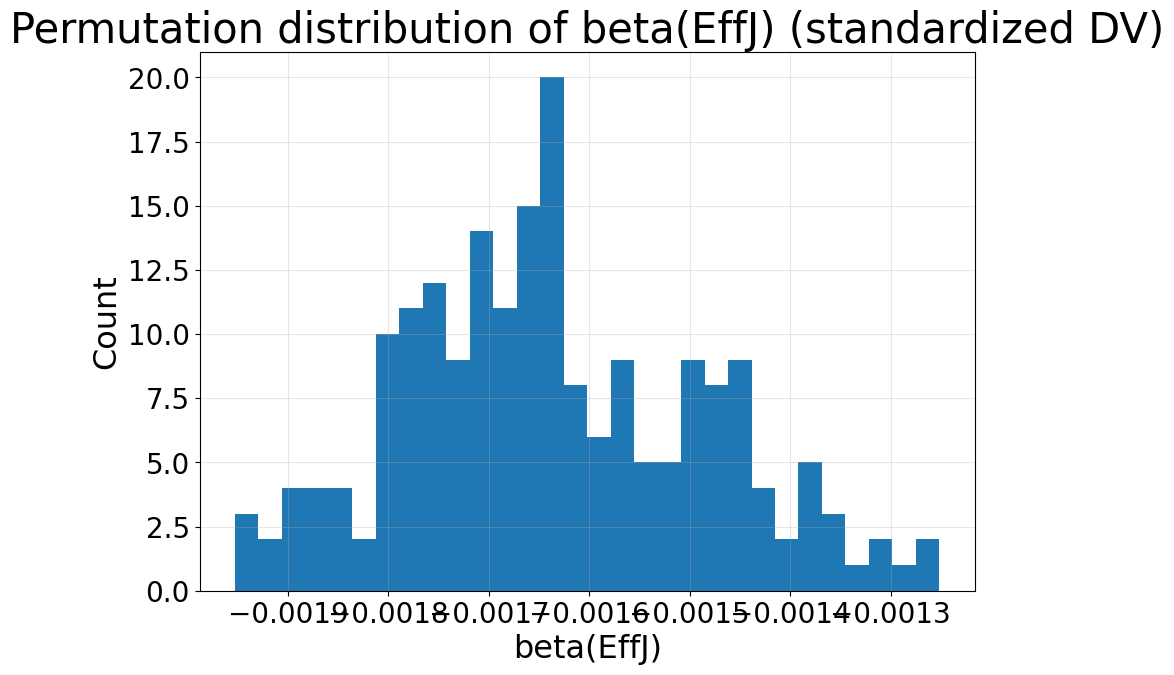

In [34]:

# (7) Permutation within degree bins -- standardized outcome (field-year level)
# Outcome unit: (citation_year, topic_cleaned) cell
# Standardization: within each citation_year, z-score the field DV (so effect is in SD units)

# Base aggregation (observed)
agg0 = (
    df.groupby(["citation_year", "topic_cleaned"])["pagerank"]
      .agg(sum_pagerank="sum", mean_pagerank="mean", n="count")
      .reset_index()
)

# Merge EffJ aligned by year (EffJ computed on publication_year; here we align to citation_year==publication_year)
agg0 = agg0.merge(
    effj[["topic_cleaned", "publication_year", "EffJ"]],
    left_on=["topic_cleaned", "citation_year"],
    right_on=["topic_cleaned", "publication_year"],
    how="left",
)

# Choose DV (pick ONE): "sum_pagerank" or "mean_pagerank"
DV_RAW = "sum_pagerank"

# Standardize DV within citation_year
agg0["DV_z"] = agg0.groupby("citation_year")[DV_RAW].transform(lambda s: (s - s.mean()) / s.std())

# Design matrix: intercept + EffJ + n + year dummies
Y_obs = agg0["DV_z"].to_numpy()
X = np.concatenate(
    [
        np.ones((len(agg0), 1)),
        agg0[["EffJ"]].to_numpy(),
        agg0[["n"]].to_numpy(),
        pd.get_dummies(agg0["citation_year"], drop_first=True).to_numpy(),
    ],
    axis=1,
)

beta_obs = np.linalg.lstsq(X, Y_obs, rcond=None)[0][1]
print("Observed beta(EffJ) on standardized DV:", beta_obs)

# Degree bins within year
df["deg_bin"] = df.groupby("citation_year")["in_degree"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)

pr = df["pagerank"].to_numpy()
year = df["citation_year"].to_numpy()
deg_bin = df["deg_bin"].to_numpy()

gkey = pd.Series(year.astype(str) + "_" + pd.Series(deg_bin).astype("Int64").astype(str).to_numpy())
codes = pd.factorize(gkey, sort=False)[0]

order = np.argsort(codes, kind="mergesort")
codes_sorted = codes[order]
block_starts = np.r_[0, np.where(np.diff(codes_sorted) != 0)[0] + 1]
block_ends = np.r_[block_starts[1:], len(order)]

# Group code for (citation_year, field)
field_key = df["topic_cleaned"].astype(str).to_numpy()
gy_key = (year.astype(str) + "||" + field_key)
gy_codes, gy_uniques = pd.factorize(gy_key, sort=False)
n_groups = gy_uniques.size

u_year = np.array([int(x.split("||")[0]) for x in gy_uniques])
u_field = np.array([x.split("||", 1)[1] for x in gy_uniques])

group_n = np.bincount(gy_codes, minlength=n_groups).astype(float)

# Fixed keys for merging EffJ + year dummies
keys = pd.DataFrame({"citation_year": u_year, "topic_cleaned": u_field})
keys["n"] = group_n
keys = keys.merge(
    effj[["topic_cleaned", "publication_year", "EffJ"]],
    left_on=["topic_cleaned", "citation_year"],
    right_on=["topic_cleaned", "publication_year"],
    how="left",
)

X_perm = np.concatenate(
    [
        np.ones((len(keys), 1)),
        keys[["EffJ"]].to_numpy(),
        keys[["n"]].to_numpy(),
        pd.get_dummies(keys["citation_year"], drop_first=True).to_numpy(),
    ],
    axis=1,
)

n_perm = 200
rng = np.random.default_rng(0)
betas = np.empty(n_perm, dtype=float)

for b in range(n_perm):
    pr_perm = pr.copy()
    for s, e in zip(block_starts, block_ends):
        idx = order[s:e]
        if idx.size <= 1:
            continue
        pr_perm[idx] = pr_perm[idx][rng.permutation(idx.size)]

    # Aggregate permuted DV at (year, field)
    sum_perm = np.bincount(gy_codes, weights=pr_perm, minlength=n_groups).astype(float)

    # Standardize within year (on permuted distribution)
    tmp = pd.DataFrame({"citation_year": u_year, "DV_raw": sum_perm})
    tmp["DV_z"] = tmp.groupby("citation_year")["DV_raw"].transform(lambda s: (s - s.mean()) / s.std())
    Yp = tmp["DV_z"].to_numpy()

    betas[b] = np.linalg.lstsq(X_perm, Yp, rcond=None)[0][1]

p_two_sided = np.mean(np.abs(betas) >= np.abs(beta_obs))
print("Permutation p (two-sided):", p_two_sided)

plt.figure(figsize=(10, 7))
plt.hist(betas, bins=30)
plt.title("Permutation distribution of beta(EffJ) (standardized DV)", fontsize=30)
plt.xlabel("beta(EffJ)", fontsize=23)
plt.ylabel("Count", fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.3)
plt.show()


Matched ATT (high EffJ - low EffJ) on pagerank_z: 0.01580327786186791
Bootstrap 95% CI: (np.float64(0.00920489222622673), np.float64(0.021997446378056222))


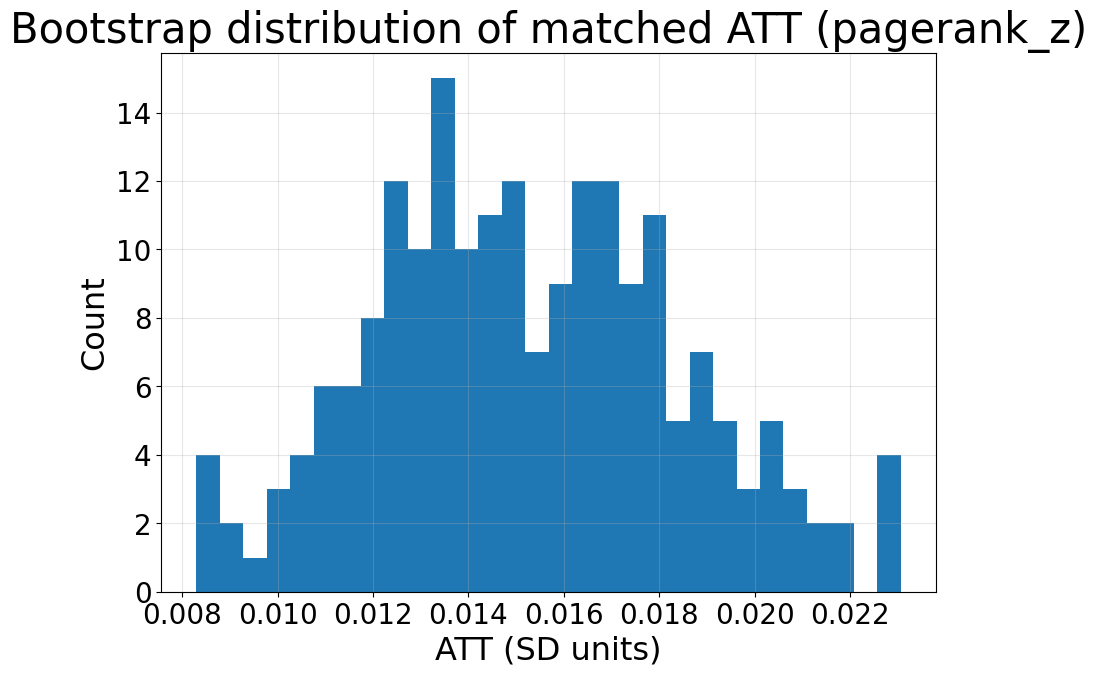

In [36]:
# %%
# (8) Matching / pairing -- standardized outcome
# Outcome unit: article-level pagerank_z (standardized within citation_year)

# Attach EffJ(field, publication_year) to each row
df_m = df.merge(
    effj[["topic_cleaned", "publication_year", "EffJ"]],
    on=["topic_cleaned", "publication_year"],
    how="left",
)

# Standardize pagerank within citation_year
df_m["pagerank_z"] = df_m.groupby("citation_year")["pagerank"].transform(lambda s: (s - s.mean()) / s.std())

# Define treated/control by EffJ terciles within publication_year
q_hi = df_m.groupby("publication_year")["EffJ"].transform(lambda s: s.quantile(2/3))
q_lo = df_m.groupby("publication_year")["EffJ"].transform(lambda s: s.quantile(1/3))
df_m["T"] = (df_m["EffJ"] >= q_hi).astype(int)
df_m["C"] = (df_m["EffJ"] <= q_lo).astype(int)
df_m = df_m[(df_m["T"] == 1) | (df_m["C"] == 1)].copy()
df_m["T"] = (df_m["T"] == 1).astype(int)

# Strata: citation_year + SJR_z decile + in_degree decile
df_m["SJR_z_decile"] = df_m.groupby("citation_year")["SJR_z"].transform(lambda s: pd.qcut(s, 10, labels=False, duplicates="drop"))
df_m["in_degree_decile"] = df_m.groupby("citation_year")["in_degree"].transform(lambda s: pd.qcut(s, 10, labels=False, duplicates="drop"))

# Stratum diffs
rows = []
for (y, a, b), d in df_m.groupby(["citation_year", "SJR_z_decile", "in_degree_decile"], sort=False):
    t = d.loc[d["T"] == 1, "pagerank_z"]
    c = d.loc[d["T"] == 0, "pagerank_z"]
    m = min(len(t), len(c))
    if m <= 0:
        continue
    rows.append((y, a, b, t.mean(), c.mean(), m))

strata_df = pd.DataFrame(rows, columns=["citation_year", "SJR_z_decile", "in_degree_decile", "mean_T", "mean_C", "m"])
strata_df["diff"] = strata_df["mean_T"] - strata_df["mean_C"]

ATT_point = (strata_df["diff"] * strata_df["m"]).sum() / strata_df["m"].sum()
print("Matched ATT (high EffJ - low EffJ) on pagerank_z:", ATT_point)

# Bootstrap CI (resample strata rows)
B = 200
rng = np.random.default_rng(0)
w = strata_df["m"].to_numpy()
d = strata_df["diff"].to_numpy()
n_strata = len(strata_df)

att_boot = np.empty(B, dtype=float)
for i in range(B):
    idx = rng.integers(0, n_strata, size=n_strata)
    att_boot[i] = np.sum(d[idx] * w[idx]) / np.sum(w[idx])

ci = (np.quantile(att_boot, 0.025), np.quantile(att_boot, 0.975))
print("Bootstrap 95% CI:", ci)

plt.figure(figsize=(10, 7))
plt.hist(att_boot, bins=30)
plt.title("Bootstrap distribution of matched ATT (pagerank_z)", fontsize=30)
plt.xlabel("ATT (SD units)", fontsize=23)
plt.ylabel("Count", fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.3)
plt.show()


In [45]:
def compute_eff_number_from_counts(counts):
    counts = np.asarray(counts, float)
    p = counts / counts.sum()
    return 1 / np.sum(p * p)

def permute_within_groups(values, group_codes, rng):
    out = values.copy()
    for g in np.unique(group_codes):
        idx = np.where(group_codes == g)[0]
        if len(idx) > 1:
            out[idx] = out[rng.permutation(idx)]
    return out

def zscore_within_year(df, col):
    g = df.groupby("citation_year")[col]
    df[col + "_z"] = (df[col] - g.transform("mean")) / g.transform("std")
    return df


In [46]:
df_unique = df.sort_values("citation_year").drop_duplicates("id", keep="first")

vc = df_unique.groupby(["topic_cleaned", "publication_year"])["journal_issn"].value_counts()

rows = []
for (f, y), s in vc.groupby(level=[0, 1]):
    rows.append((f, y, compute_eff_number_from_counts(s.values)))

effj_pub = pd.DataFrame(rows, columns=["topic_cleaned", "publication_year", "EffJ"])


In [47]:
eff_pre = (
    effj_pub.query("2015 <= publication_year <= 2019")
    .groupby("topic_cleaned")["EffJ"]
    .mean()
    .reset_index(name="EffJ_pre")
)

df = df.merge(eff_pre, on="topic_cleaned", how="left")


In [48]:
agg = (
    df.groupby(["citation_year", "topic_cleaned"])["pagerank"]
    .agg(sum_pagerank="sum", mean_pagerank="mean", n="count")
    .reset_index()
)

agg = zscore_within_year(agg, "sum_pagerank")
agg["log_n"] = np.log(agg["n"])
agg = agg.merge(eff_pre, on="topic_cleaned", how="left")


In [49]:
model = smf.ols(
    "sum_pagerank_z ~ EffJ_pre + C(citation_year) + log_n",
    data=agg
).fit(cov_type="cluster", cov_kwds={"groups": agg["topic_cleaned"]})

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         sum_pagerank_z   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     94.97
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           2.04e-12
Time:                        18:43:17   Log-Likelihood:                -31.656
No. Observations:                 170   AIC:                             87.31
Df Residuals:                     158   BIC:                             124.9
Df Model:                          11                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [51]:
from tqdm import trange

rng = np.random.default_rng(0)

d = df[["citation_year", "topic_cleaned", "in_degree", "SJR_z", "pagerank"]].copy()

d["deg_bin"] = d.groupby("citation_year")["in_degree"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)

d["sjr_bin"] = d.groupby("citation_year")["SJR_z"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)

gkey = (
    d["citation_year"].astype(str)
    + "_d" + d["deg_bin"].astype("Int64").astype(str)
    + "_s" + d["sjr_bin"].astype("Int64").astype(str)
)

group_codes, _ = pd.factorize(gkey)

beta_obs = model.params["EffJ_pre"]

B = 500
betas = np.empty(B)

for i in trange(B, desc="Permutation"):
    d["pagerank_perm"] = permute_within_groups(d["pagerank"].to_numpy(), group_codes, rng)

    agg_p = (
        d.groupby(["citation_year", "topic_cleaned"])["pagerank_perm"]
        .agg(sum_pagerank="sum", n="count")
        .reset_index()
    )

    agg_p = zscore_within_year(agg_p, "sum_pagerank")
    agg_p["log_n"] = np.log(agg_p["n"])
    agg_p = agg_p.merge(eff_pre, on="topic_cleaned", how="left")

    m = smf.ols(
        "sum_pagerank_z ~ EffJ_pre + C(citation_year) + log_n",
        data=agg_p
    ).fit(cov_type="cluster", cov_kwds={"groups": agg_p["topic_cleaned"]})

    betas[i] = m.params["EffJ_pre"]

p_perm = np.mean(np.abs(betas) >= np.abs(beta_obs))

print("Observed β:", beta_obs)
print("Permutation p:", p_perm)


Permutation: 100%|██████████| 500/500 [10:53<00:00,  1.31s/it]

Observed β: -0.00794899468992006
Permutation p: 1.0


In [52]:
d_match = df[
    ["citation_year", "publication_year", "topic_cleaned", "in_degree", "SJR_z", "pagerank", "EffJ_pre"]
].copy()

# Outcome: z-score PageRank within snapshot year
g = d_match.groupby("citation_year")["pagerank"]
d_match["pagerank_z"] = (d_match["pagerank"] - g.transform("mean")) / g.transform("std")

# Strata bins: within citation_year
d_match["deg_dec"] = d_match.groupby("citation_year")["in_degree"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)
d_match["SJR_dec"] = d_match.groupby("citation_year")["SJR_z"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)

# Treatment: top 67% vs bottom 33% within publication_year
q_hi = d_match.groupby("publication_year")["EffJ_pre"].transform(lambda s: s.quantile(0.67))
q_lo = d_match.groupby("publication_year")["EffJ_pre"].transform(lambda s: s.quantile(0.33))

d_match["treated"] = (d_match["EffJ_pre"] >= q_hi).astype(int)
d_match["control"] = (d_match["EffJ_pre"] <= q_lo).astype(int)

# Keep treated/control only
d_match = d_match[(d_match["treated"] == 1) | (d_match["control"] == 1)].copy()
d_match["T"] = d_match["treated"].astype(int)

d_match[["T", "treated", "control"]].value_counts()


T  treated  control
0  0        1          2092115
1  1        0          1979091
Name: count, dtype: int64

In [53]:
rng = np.random.default_rng(0)

diffs = []
weights = []

for _, s in d_match.groupby(["citation_year", "SJR_dec", "deg_dec"], sort=False):
    t = s[s["T"] == 1]
    c = s[s["T"] == 0]
    m = min(len(t), len(c))
    if m <= 0:
        continue

    t_s = t.sample(n=m, replace=False, random_state=int(rng.integers(1e9)))
    c_s = c.sample(n=m, replace=False, random_state=int(rng.integers(1e9)))

    diffs.append(t_s["pagerank_z"].mean() - c_s["pagerank_z"].mean())
    weights.append(m)

weights = np.asarray(weights, float)
diffs = np.asarray(diffs, float)

ATT_point = np.sum(diffs * weights) / np.sum(weights)
ATT_point


np.float64(0.009544549813380758)

In [56]:
from tqdm import trange
import numpy as np
import pandas as pd

rng = np.random.default_rng(0)

d_bs = d_match.copy()
d_bs["_cluster_id"] = d_bs[["topic_cleaned", "publication_year"]].astype(str).agg("||".join, axis=1)

# Precompute: cluster -> row indices (big speedup)
cluster_to_idx = d_bs.groupby("_cluster_id").indices
clusters = np.array(list(cluster_to_idx.keys()))

B = 500
att_boot = np.empty(B)

for b in trange(B, desc="Cluster bootstrap"):
    samp = rng.choice(clusters, size=len(clusters), replace=True)

    # Build index array without concatenating many dataframes
    idx = np.concatenate([cluster_to_idx[cid] for cid in samp])
    db = d_bs.iloc[idx]

    diffs = []
    weights = []

    for _, s in db.groupby(["citation_year", "SJR_dec", "deg_dec"], sort=False):
        t = s[s["T"] == 1]
        c = s[s["T"] == 0]
        m = min(len(t), len(c))
        if m <= 0:
            continue

        # Keep your original random matching
        t_s = t.sample(n=m, replace=False, random_state=int(rng.integers(1e9)))
        c_s = c.sample(n=m, replace=False, random_state=int(rng.integers(1e9)))

        diffs.append(t_s["pagerank_z"].mean() - c_s["pagerank_z"].mean())
        weights.append(m)

    weights = np.asarray(weights, float)
    diffs = np.asarray(diffs, float)
    att_boot[b] = np.sum(diffs * weights) / np.sum(weights)

ci_95 = (np.quantile(att_boot, 0.025), np.quantile(att_boot, 0.975))
print("ATT point:", ATT_point)
print("95% CI:", ci_95)


Cluster bootstrap: 100%|██████████| 500/500 [07:29<00:00,  1.11it/s]

ATT point: 0.009544549813380758
95% CI: (np.float64(-0.021089950735639962), np.float64(0.03919214120456104))


Observed beta: -0.00794899468992006
Perm beta mean: -0.008504633193824275
Perm beta std: 0.00014620582883406892
Perm beta quantiles: [-0.00880174 -0.00872746 -0.00850756 -0.00827148 -0.00813495]
Two-sided p: 1.0


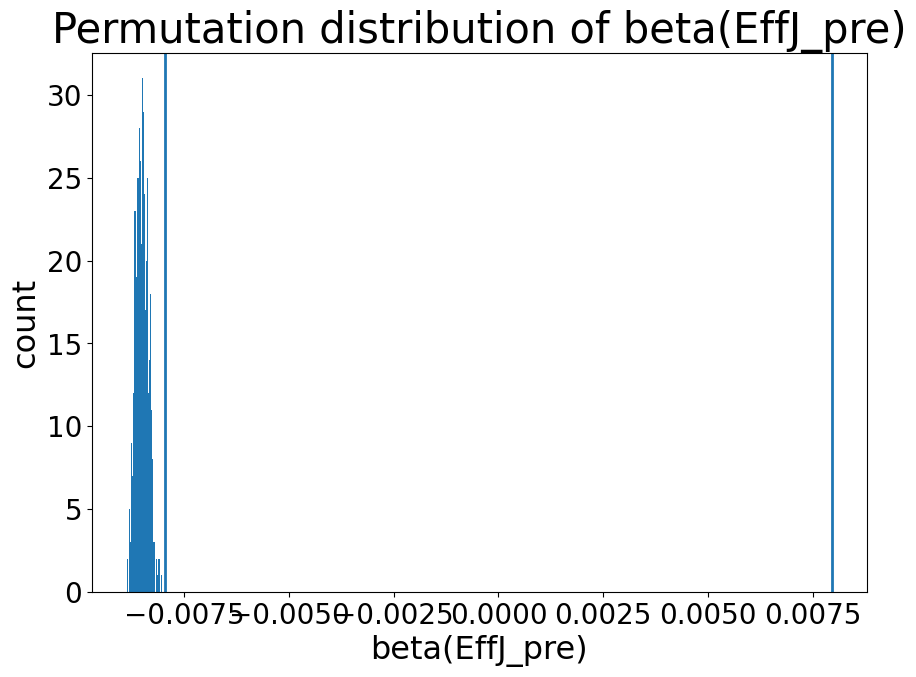

In [63]:
import numpy as np
import matplotlib.pyplot as plt

perm_tight = {
    "beta_obs": beta_obs,
    "beta_perm": betas,
    "p_two_sided": p_perm,
}


betas = perm_tight["beta_perm"]
beta_obs = perm_tight["beta_obs"]

print("Observed beta:", beta_obs)
print("Perm beta mean:", np.mean(betas))
print("Perm beta std:", np.std(betas))
print("Perm beta quantiles:", np.quantile(betas, [0.01, 0.05, 0.5, 0.95, 0.99]))
print("Two-sided p:", perm_tight["p_two_sided"])

plt.figure(figsize=(10,7))
plt.hist(betas, bins=40)
plt.axvline(beta_obs, linewidth=2)
plt.axvline(-beta_obs, linewidth=2)
plt.title("Permutation distribution of beta(EffJ_pre)", fontsize=30)
plt.xlabel("beta(EffJ_pre)", fontsize=23)
plt.ylabel("count", fontsize=23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [59]:
import numpy as np
import statsmodels.formula.api as smf

def permute_effj_pre_inference(field_year_df, eff_col="EffJ_pre", dv_col="sum_pagerank_z",
                               cluster_col="topic_cleaned", n_perm=2000, seed=0):
    """
    Fisher-style randomization inference:
      - keep DV and controls fixed
      - permute EffJ_pre across fields (label shuffle)
      - refit: DV ~ EffJ_pre + year FE + log_n
    """
    rng = np.random.default_rng(seed)
    d = field_year_df.copy()

    # Fit observed
    m_obs = smf.ols(f"{dv_col} ~ {eff_col} + C(citation_year) + log_n", data=d).fit(
        cov_type="cluster", cov_kwds={"groups": d[cluster_col]}
    )
    beta_obs = m_obs.params[eff_col]

    # Prepare permutation: shuffle by field (keeps all years for a field together)
    fields = d[cluster_col].unique()
    eff_by_field = d.groupby(cluster_col)[eff_col].first()

    betas = np.empty(n_perm, dtype=float)
    for i in range(n_perm):
        perm_fields = rng.permutation(fields)
        mapping = dict(zip(fields, eff_by_field.loc[perm_fields].values))
        d_perm = d.copy()
        d_perm[eff_col] = d_perm[cluster_col].map(mapping)

        m = smf.ols(f"{dv_col} ~ {eff_col} + C(citation_year) + log_n", data=d_perm).fit(
            cov_type="cluster", cov_kwds={"groups": d_perm[cluster_col]}
        )
        betas[i] = m.params[eff_col]

    # Use (k+1)/(n+1) style p to avoid exact 0/1
    p_two = (1 + np.sum(np.abs(betas) >= np.abs(beta_obs))) / (n_perm + 1)

    return {"beta_obs": beta_obs, "beta_perm": betas, "p_two_sided": p_two, "model_obs": m_obs}


# ---- example usage ----
# field-year df should be what you used in OLS: one row per (citation_year, topic_cleaned)
# Must contain: sum_pagerank_z, EffJ_pre, log_n, citation_year, topic_cleaned
ri_effj = permute_effj_pre_inference(
    field_year_df=agg,         # use the same df you ran OLS on (after merging EffJ_pre + log_n)
    eff_col="EffJ_pre",
    dv_col="sum_pagerank_z",
    cluster_col="topic_cleaned",
    n_perm=2000,
    seed=0,
)

print("Obs beta:", ri_effj["beta_obs"])
print("RI p(two-sided):", ri_effj["p_two_sided"])


Obs beta: -0.00794899468992006
RI p(two-sided): 0.005997001499250375


In [61]:
from tqdm import trange
import numpy as np

rng = np.random.default_rng(0)

att_obs = ATT_point

gkey = (
    d_match["citation_year"].astype(str)
    + "_d" + d_match["deg_dec"].astype("Int64").astype(str)
    + "_s" + d_match["SJR_dec"].astype("Int64").astype(str)
)
group_codes, _ = pd.factorize(gkey, sort=False)

n_perm = 1000
att_perm = np.empty(n_perm, float)

y = d_match["pagerank_z"].to_numpy()

for i in trange(n_perm, desc="Matching placebo permutation"):
    y_perm = permute_within_groups(y, group_codes, rng)
    d_tmp = d_match.copy()
    d_tmp["_y_perm"] = y_perm

    diffs = []
    weights = []

    for _, s in d_tmp.groupby(["citation_year", "SJR_dec", "deg_dec"], sort=False):
        t = s[s["T"] == 1]
        c = s[s["T"] == 0]
        m = min(len(t), len(c))
        if m <= 0:
            continue

        t_s = t.sample(n=m, replace=False, random_state=int(rng.integers(1e9)))
        c_s = c.sample(n=m, replace=False, random_state=int(rng.integers(1e9)))

        diffs.append(t_s["_y_perm"].mean() - c_s["_y_perm"].mean())
        weights.append(m)

    weights = np.asarray(weights, float)
    diffs = np.asarray(diffs, float)
    att_perm[i] = np.sum(diffs * weights) / np.sum(weights)

p_two = np.mean(np.abs(att_perm) >= np.abs(att_obs))

print("ATT_obs:", att_obs)
print("Placebo p(two-sided):", p_two)


Matching placebo permutation: 100%|██████████| 1000/1000 [23:11<00:00,  1.39s/it]

ATT_obs: 0.009544549813380758
Placebo p(two-sided): 0.0


In [64]:
import numpy as np
import pandas as pd

def p_value_plus_one(null_stats, obs_stat):
    null_stats = np.asarray(null_stats, dtype=float)
    k = np.sum(np.abs(null_stats) >= np.abs(obs_stat))
    return (k + 1) / (len(null_stats) + 1)

def permute_within_groups(values, group_codes, rng):
    perm = values.copy()
    for g in np.unique(group_codes):
        idx = np.where(group_codes == g)[0]
        if len(idx) > 1:
            perm[idx] = perm[rng.permutation(idx)]
    return perm

def cem_att_exact(d, outcome_col, treat_col="T", strata_cols=("citation_year","SJR_dec","deg_dec")):
    diffs = []
    weights = []

    for _, s in d.groupby(list(strata_cols), sort=False):
        t = s[s[treat_col] == 1]
        c = s[s[treat_col] == 0]
        nt, nc = len(t), len(c)
        m = min(nt, nc)
        if m <= 0:
            continue
        diffs.append(t[outcome_col].mean() - c[outcome_col].mean())
        weights.append(m)

    weights = np.asarray(weights, dtype=float)
    diffs = np.asarray(diffs, dtype=float)
    return np.sum(diffs * weights) / np.sum(weights)


In [65]:
from tqdm import trange

rng = np.random.default_rng(0)

d = df[["citation_year", "topic_cleaned", "in_degree", "SJR_z", "pagerank"]].copy()

d["deg_bin"] = d.groupby("citation_year")["in_degree"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)

d["sjr_bin"] = d.groupby("citation_year")["SJR_z"].transform(
    lambda s: pd.qcut(s, 10, labels=False, duplicates="drop")
)

gkey = (
    d["citation_year"].astype(str)
    + "_d" + d["deg_bin"].astype("Int64").astype(str)
    + "_s" + d["sjr_bin"].astype("Int64").astype(str)
)

group_codes, _ = pd.factorize(gkey, sort=False)

beta_obs = model.params["EffJ_pre"]

B = 500
betas = np.empty(B, float)

for i in trange(B, desc="Permutation slope test"):
    d["pagerank_perm"] = permute_within_groups(d["pagerank"].to_numpy(), group_codes, rng)

    agg_p = (
        d.groupby(["citation_year", "topic_cleaned"])["pagerank_perm"]
        .agg(sum_pagerank="sum", n="count")
        .reset_index()
    )

    g = agg_p.groupby("citation_year")["sum_pagerank"]
    agg_p["sum_pagerank_z"] = (agg_p["sum_pagerank"] - g.transform("mean")) / g.transform("std")

    agg_p["log_n"] = np.log(agg_p["n"])
    agg_p = agg_p.merge(eff_pre, on="topic_cleaned", how="left")

    m = smf.ols(
        "sum_pagerank_z ~ EffJ_pre + C(citation_year) + log_n",
        data=agg_p
    ).fit(cov_type="cluster", cov_kwds={"groups": agg_p["topic_cleaned"]})

    betas[i] = m.params["EffJ_pre"]

p_perm = p_value_plus_one(betas, beta_obs)

print("Observed β:", beta_obs)
print("Permutation p(two-sided, +1):", p_perm)


Permutation slope test: 100%|██████████| 500/500 [10:48<00:00,  1.30s/it]

Observed β: -0.00794899468992006
Permutation p(two-sided, +1): 1.0


In [66]:
ATT_point = cem_att_exact(
    d_match,
    outcome_col="pagerank_z",
    treat_col="T",
    strata_cols=("citation_year","SJR_dec","deg_dec"),
)

print("ATT_point (deterministic CEM):", ATT_point)


ATT_point (deterministic CEM): 0.009817121889959477


In [68]:
from tqdm import trange
import numpy as np

rng = np.random.default_rng(0)

d_bs = d_match.copy()
d_bs["_cluster_id"] = d_bs[["topic_cleaned", "publication_year"]].astype(str).agg("||".join, axis=1)

# Precompute indices per cluster (one-time cost)
cluster_to_idx = {cid: g.index.to_numpy() for cid, g in d_bs.groupby("_cluster_id", sort=False)}
uniq = np.array(list(cluster_to_idx.keys()), dtype=object)

B = 500

att_point = cem_att_exact(
    d_bs,
    outcome_col="pagerank_z",
    treat_col="T",
    strata_cols=("citation_year","SJR_dec","deg_dec"),
)

att_boot = np.empty(B, float)

for b in trange(B, desc="Cluster bootstrap (fast take)"):
    samp = rng.choice(uniq, size=len(uniq), replace=True)

    # Build bootstrap sample indices quickly
    idx = np.concatenate([cluster_to_idx[cid] for cid in samp])

    db = d_bs.loc[idx]  # keep original index OK
    att_boot[b] = cem_att_exact(
        db,
        outcome_col="pagerank_z",
        treat_col="T",
        strata_cols=("citation_year","SJR_dec","deg_dec"),
    )

ci_95 = (np.quantile(att_boot, 0.025), np.quantile(att_boot, 0.975))

print("ATT_point:", att_point)
print("CI_95:", ci_95)


Cluster bootstrap (fast take): 100%|██████████| 500/500 [05:57<00:00,  1.40it/s]

ATT_point: 0.009817121889959477
CI_95: (np.float64(-0.020790178515930853), np.float64(0.039797357463710416))


In [69]:
from tqdm import trange

rng = np.random.default_rng(0)

att_obs = cem_att_exact(
    d_match,
    outcome_col="pagerank_z",
    treat_col="T",
    strata_cols=("citation_year","SJR_dec","deg_dec"),
)

gkey = (
    d_match["citation_year"].astype("int64").astype(str)
    + "_d" + d_match["deg_dec"].astype("Int64").astype(str)
    + "_s" + d_match["SJR_dec"].astype("Int64").astype(str)
)
group_codes, _ = pd.factorize(gkey, sort=False)

n_perm = 1000
att_perm = np.empty(n_perm, float)

y = d_match["pagerank_z"].to_numpy()

for i in trange(n_perm, desc="Matching placebo permutation"):
    y_perm = permute_within_groups(y, group_codes, rng)

    d_tmp = d_match.copy()
    d_tmp["_y_perm"] = y_perm

    att_perm[i] = cem_att_exact(
        d_tmp,
        outcome_col="_y_perm",
        treat_col="T",
        strata_cols=("citation_year","SJR_dec","deg_dec"),
    )

p_two = p_value_plus_one(att_perm, att_obs)

print("ATT_obs:", att_obs)
print("Placebo p(two-sided, +1):", p_two)


Matching placebo permutation: 100%|██████████| 1000/1000 [20:00<00:00,  1.20s/it]

ATT_obs: 0.009817121889959477
Placebo p(two-sided, +1): 0.000999000999000999


## Appendix: Confounding Factors

In [45]:
import numpy as np
import pandas as pd
from linearmodels.panel import PanelOLS

BIG = "topic_cleaned"
SUB = "prim_topic"
W = 5

df2 = df.copy()

# Outcome at article-year level
df2["y_raw"] = np.log1p(df2["pagerank"])

# SJR z-score within citation_year (control only)
df2["SJR_z"] = df2.groupby("citation_year")["SJR"].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)

# -------------------------
# (1) Build rolling-window EffJ at (SUB, citation_year)
# -------------------------
in_window = (
    (df2["publication_year"] >= df2["citation_year"] - (W - 1)) &
    (df2["publication_year"] <= df2["citation_year"])
)

w = df2.loc[in_window, ["citation_year", SUB, "journal_issn"]].copy()

gj = (
    w.groupby(["citation_year", SUB, "journal_issn"])
     .size()
     .rename("n")
     .reset_index()
)

gj["tot"] = gj.groupby(["citation_year", SUB])["n"].transform("sum")
gj["p"] = gj["n"] / gj["tot"]

eff = (
    (gj["p"] ** 2)
    .groupby([gj["citation_year"], gj[SUB]])
    .sum()
    .rename("HHI")
    .reset_index()
)
eff["EffJ"] = 1.0 / eff["HHI"]

N = (
    gj.groupby(["citation_year", SUB])["n"]
      .sum()
      .rename("N_roll")
      .reset_index()
)
N["log_N"] = np.log1p(N["N_roll"])

eff = eff.merge(N[["citation_year", SUB, "log_N"]], on=["citation_year", SUB], how="left")

# -------------------------
# (2) Aggregate outcome + controls at (SUB, citation_year), keep BIG field
# -------------------------
sub_y = (
    df2.groupby([SUB, "citation_year"])
       .agg(
           y=("y_raw", "mean"),
           SJR_z=("SJR_z", "mean"),
           big_field=(BIG, "first"),
           n_obs=("id", "size"),
       )
       .reset_index()
)

# Keep only sufficiently large subfield-year cells
sub_y = sub_y[sub_y["n_obs"] >= 10].copy()

# Merge rolling EffJ + size control
sub_y = sub_y.merge(
    eff[["citation_year", SUB, "EffJ", "log_N"]],
    on=["citation_year", SUB],
    how="left"
)

# bigfield×year FE key
sub_y["bigfield_year"] = sub_y["big_field"].astype(str) + "___" + sub_y["citation_year"].astype(str)

# -------------------------
# (3) Replace Y with within (bigfield×year) z-score
# -------------------------
sub_y["y_z"] = sub_y.groupby("bigfield_year")["y"].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)

# Panel index
panel = sub_y.set_index([SUB, "citation_year"]).sort_index()

# other_effects needs aligned index
other = pd.DataFrame({"bigfield_year": panel["bigfield_year"]}, index=panel.index)

# -------------------------
# (4) Model: subfield FE + bigfield×year FE
#     Use formula for native interaction (no TimeEffects; would be 3rd effect)
# -------------------------
formula = "y_z ~ 1 + np.log(EffJ) * SJR_z + log_N + EntityEffects"

mod = PanelOLS.from_formula(
    formula,
    data=panel,
    other_effects=other,
    drop_absorbed=True
)

res = mod.fit(cov_type="clustered", cluster_entity=True)
print(res.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    y_z   R-squared:                        0.0220
Estimator:                   PanelOLS   R-squared (Between):              0.1882
No. Observations:               10762   R-squared (Within):               0.0158
Date:                Fri, Jan 09 2026   R-squared (Overall):              0.1411
Time:                        14:53:36   Log-likelihood                   -6277.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      53.128
Entities:                        1141   P-value                           0.0000
Avg Obs:                       9.4321   Distribution:                  F(4,9448)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             10.676
                            

In [47]:
import numpy as np

b_sjr = res.params["SJR_z"]
b_int = res.params["np.log(EffJ):SJR_z"]

q = panel["EffJ"].quantile([0.1, 0.5, 0.9]).values
for val in q:
    me = b_sjr + b_int * np.log(val)
    print(val, np.log(val), me)


5.975225472976215 1.7876218331685518 0.38534984418139795
18.576045160211446 2.9218728560578477 0.5540755720352044
41.35341920551397 3.7221551074226817 0.6731217114039441


In [48]:
panel2 = panel.copy()
panel2["y_z"] = panel2.groupby("bigfield_year")["y"].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)

panel2["dy_z"] = panel2.groupby(level=0)["y_z"].diff()
other = pd.DataFrame({"bigfield_year": panel2["bigfield_year"]}, index=panel2.index)

formula = "dy_z ~ 1 + np.log(EffJ) * SJR_z + log_N + EntityEffects"

mod = PanelOLS.from_formula(
    formula,
    data=panel2,
    other_effects=other,
    drop_absorbed=True
)

res = mod.fit(cov_type="clustered", cluster_entity=True)
print(res.summary)


/Users/lauzhenyi/Library/Python/3.11/lib/python/site-packages/linearmodels/panel/model.py:1258: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:                   dy_z   R-squared:                        0.0109
Estimator:                   PanelOLS   R-squared (Between):             -2.6074
No. Observations:                9621   R-squared (Within):              -0.0602
Date:                Fri, Jan 09 2026   R-squared (Overall):             -0.3303
Time:                        14:57:28   Log-likelihood                   -3165.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      22.891
Entities:                        1133   P-value                           0.0000
Avg Obs:                       8.4916   Distribution:                  F(4,8332)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             10.662
                            

In [49]:
panel5 = panel.copy()

# z-score within BIG field (not year), so scale is stable across years
panel5["y_z_big"] = panel5.groupby("big_field")["y"].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)

panel5["dy_z_big"] = panel5.groupby(level=0)["y_z_big"].diff()

other = pd.DataFrame({"bigfield_year": panel5["bigfield_year"]}, index=panel5.index)

formula = "dy_z_big ~ 1 + np.log(EffJ) * SJR_z + log_N + EntityEffects"

mod = PanelOLS.from_formula(
    formula,
    data=panel5,
    other_effects=other,
    drop_absorbed=True
)

res = mod.fit(cov_type="clustered", cluster_entity=True)
print(res.summary)


/Users/lauzhenyi/Library/Python/3.11/lib/python/site-packages/linearmodels/panel/model.py:1258: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               dy_z_big   R-squared:                        0.0261
Estimator:                   PanelOLS   R-squared (Between):             -1.7553
No. Observations:                9621   R-squared (Within):               0.1149
Date:                Fri, Jan 09 2026   R-squared (Overall):             -0.2894
Time:                        14:59:43   Log-likelihood                    1522.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      55.810
Entities:                        1133   P-value                           0.0000
Avg Obs:                       8.4916   Distribution:                  F(4,8332)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             16.223
                            

In [50]:
import numpy as np

b_sjr = res.params["SJR_z"]
b_int = res.params["np.log(EffJ):SJR_z"]

q = panel["EffJ"].quantile([0.1, 0.5, 0.9]).values
for val in q:
    me = b_sjr + b_int * np.log(val)
    print("EffJ=", val, "logEffJ=", np.log(val), "d(dy)/d(SJR_z)=", me)


EffJ= 5.975225472976215 logEffJ= 1.7876218331685518 d(dy)/d(SJR_z)= 0.17946186366375655
EffJ= 18.576045160211446 logEffJ= 2.9218728560578477 d(dy)/d(SJR_z)= 0.10940261270201684
EffJ= 41.35341920551397 logEffJ= 3.7221551074226817 d(dy)/d(SJR_z)= 0.059971601438060324


In [51]:
import pandas as pd
from linearmodels.panel import PanelOLS

panel6 = panel.copy()
panel6["y_z_big"] = panel6.groupby("big_field")["y"].transform(lambda x: (x - x.mean()) / x.std(ddof=0))
panel6["dy_z_big"] = panel6.groupby(level=0)["y_z_big"].diff()

panel6["EffJ_q"] = pd.qcut(np.log(panel6["EffJ"]), q=5, labels=False)

q = pd.get_dummies(panel6["EffJ_q"], prefix="q", drop_first=True)
for c in q.columns:
    panel6[f"SJR_x_{c}"] = panel6["SJR_z"] * q[c]

other = pd.DataFrame({"bigfield_year": panel6["bigfield_year"]}, index=panel6.index)

X = pd.concat(
    [panel6[["SJR_z", "log_N"]], q, panel6[[f"SJR_x_{c}" for c in q.columns]]],
    axis=1
)

mod = PanelOLS(
    panel6["dy_z_big"],
    X,
    entity_effects=True,
    other_effects=other,
    drop_absorbed=True
)

res_bin = mod.fit(cov_type="clustered", cluster_entity=True)
print(res_bin.summary)


/Users/lauzhenyi/Library/Python/3.11/lib/python/site-packages/linearmodels/panel/model.py:1258: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               dy_z_big   R-squared:                        0.0303
Estimator:                   PanelOLS   R-squared (Between):             -10.570
No. Observations:                9621   R-squared (Within):               0.1212
Date:                Fri, Jan 09 2026   R-squared (Overall):             -6.3698
Time:                        15:01:00   Log-likelihood                    1543.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      26.014
Entities:                        1133   P-value                           0.0000
Avg Obs:                       8.4916   Distribution:                 F(10,8326)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             8.6816
                            